# rose
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
##
##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
##
## lets bring in the data

from google.colab import files
uploaded = files.upload()

Saving Rose.csv to Rose.csv


## 1) Lets read the raw data as a univariate time series dataframe and plot it

In [3]:
##
## lets read the data using pandas and also set the date and time parameter correctly

rose1 = pd.read_csv('Rose.csv', parse_dates = True, index_col = 0)
rose1.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [4]:
##
##

rose1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
##
##

rose1.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

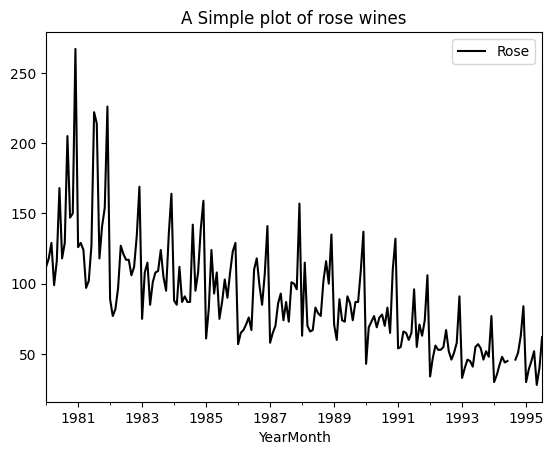

In [6]:
##
## lets do a simple plot


rose1.plot(color = 'black')
plt.title('A Simple plot of rose wines')
plt.show()

## 2) EDA and Decomposition

- The data starts from January 1980, this seems to be a monthly seris.
- The data ends July 1995, so 15 years and 7 months(187 instances)
- Data does have two null values - date time are 1994 July and August
- We do have some duplicates in the parameter - rose 90 instances


In [7]:
##
##

rose1.head()


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [8]:
##
##

rose1.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [9]:
##
##

rose1.isnull().sum()

Rose    2
dtype: int64

In [10]:
##
##

rose1[rose1['Rose'].isnull()]


Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [11]:
##
##

print(rose1[rose1.index.month == 7])
print(rose1[rose1.index.month == 8])
print(rose1[rose1.index.year == 1994])

             Rose
YearMonth        
1980-07-01  118.0
1981-07-01  222.0
1982-07-01  117.0
1983-07-01  109.0
1984-07-01   87.0
1985-07-01   87.0
1986-07-01  110.0
1987-07-01   87.0
1988-07-01   79.0
1989-07-01   86.0
1990-07-01   78.0
1991-07-01   96.0
1992-07-01   67.0
1993-07-01   57.0
1994-07-01    NaN
1995-07-01   62.0
             Rose
YearMonth        
1980-08-01  129.0
1981-08-01  214.0
1982-08-01  117.0
1983-08-01  124.0
1984-08-01  142.0
1985-08-01  103.0
1986-08-01  118.0
1987-08-01   73.0
1988-08-01   77.0
1989-08-01   74.0
1990-08-01   70.0
1991-08-01   55.0
1992-08-01   52.0
1993-08-01   54.0
1994-08-01    NaN
            Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0


In [12]:
##
##

print(rose1[rose1.index.year == 1993])
print(rose1[rose1.index.year == 1995])


            Rose
YearMonth       
1993-01-01  33.0
1993-02-01  40.0
1993-03-01  46.0
1993-04-01  45.0
1993-05-01  41.0
1993-06-01  55.0
1993-07-01  57.0
1993-08-01  54.0
1993-09-01  46.0
1993-10-01  52.0
1993-11-01  48.0
1993-12-01  77.0
            Rose
YearMonth       
1995-01-01  30.0
1995-02-01  39.0
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


In [13]:
##
##

rose1.duplicated().sum()

90

In [14]:
##
##

rose1[rose1.duplicated()]

Rose
YearMonth        
1980-07-01  118.0
1980-08-01  129.0
1981-02-01  129.0
1981-09-01  118.0
1982-04-01   97.0
...           ...
1994-11-01   63.0
1995-01-01   30.0
1995-03-01   45.0
1995-04-01   52.0
1995-06-01   40.0

[90 rows x 1 columns]

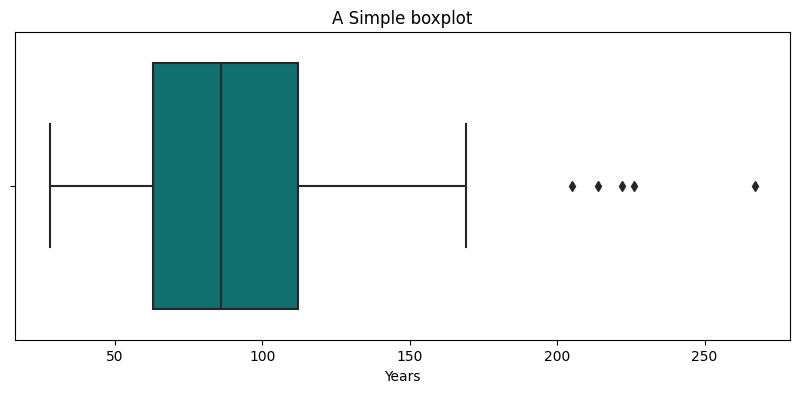

In [15]:
##
## a normal boxplot

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = rose1, x = rose1['Rose'], color = 'teal', ax = ax)
plt.title('A Simple boxplot')
plt.xlabel('Years')
plt.show()

## from the boxplot we can see that we have some outliers in the data.
## The mean is at less than 100 units.
## Most of the values fall between 1 and 170ish maybe.

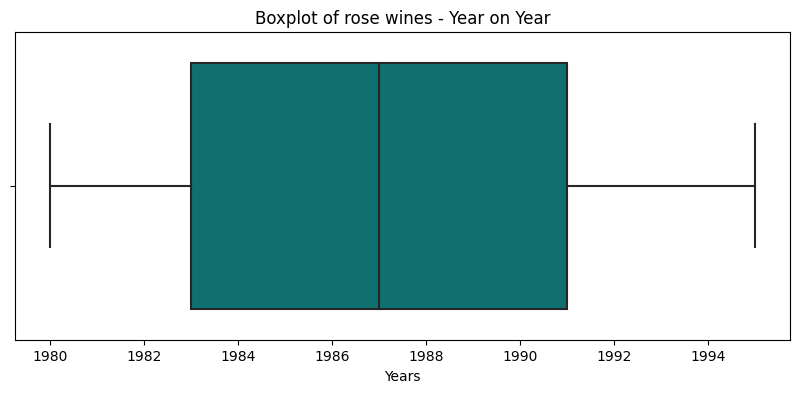

In [16]:
##
## Lets create a boxplot - year on year

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = rose1, x = rose1.index.year, ax = ax, color = 'teal')
plt.title('Boxplot of rose wines - Year on Year')
plt.xlabel('Years')
plt.show()


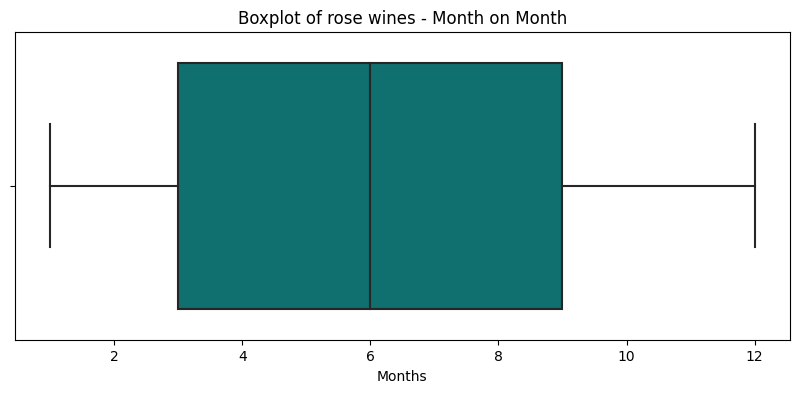

In [17]:
##
## Lets create a boxplot - month on month

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = rose1, x = rose1.index.month, ax = ax, color = 'teal')
plt.title('Boxplot of rose wines - Month on Month')
plt.xlabel('Months')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


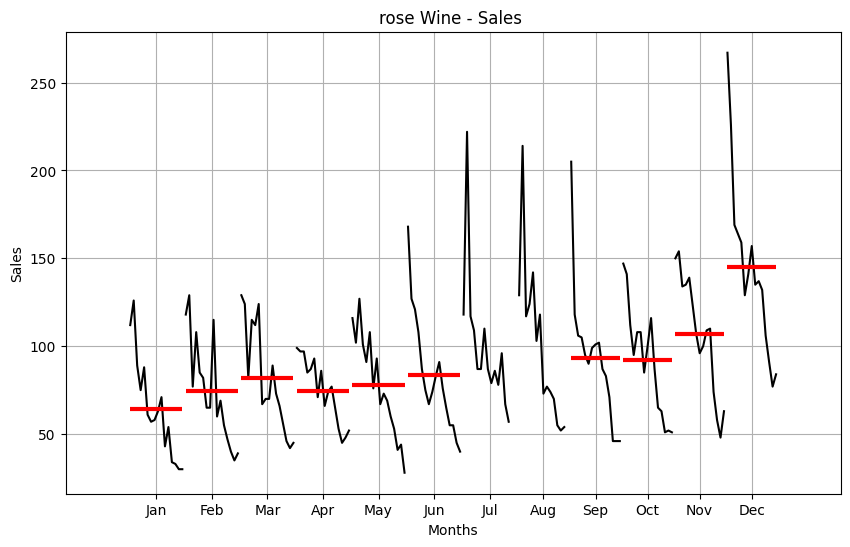

In [18]:
##
##

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (10, 6))

month_plot(rose1, ylabel = 'Sales', ax = ax)
plt.grid()
plt.title("rose Wine - Sales ")
plt.xlabel('Months')
plt.show()


## the plot below has an issue, since we have two values that are null in the dataset the means for them alone are not decided *_*
## hence we do not see any red line on those months.
## The larget variance is held by the month of december and the shortest is held by April
## displaying percentage differences would help
## we can see the months all go downwards.


## see similar plot below and use that for project report. or you can use both and compare.

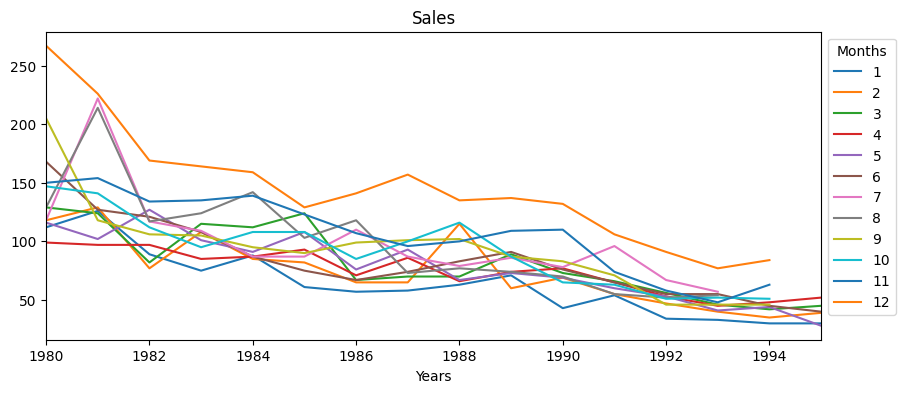

In [19]:
##
## lets create a pivot table and then plot it

MOM_sales = pd.pivot_table(rose1, values = 'Rose', columns = rose1.index.month, index = rose1.index.year)

fig, ax = plt.subplots(figsize = (10, 4))
MOM_sales.plot(ax = ax)
plt.title("Sales")
plt.xlim(1980, 1995)
plt.xlabel("Years")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = 'Months')
plt.show()


## this is mirroring the month plot we had above, but we can see the variations more clearly.
## it is important to note that for certains months we have only data uptil 1994. hence the gap in some of the values.

In [20]:
##
## lets impute the null values using historical forwards and backwards fill. we will be using previous or succeeding yeards July or august data *_*
## essentially a lag of 12 months.
## for July 1994 we will use backwards fill, using 1995 July sales value
## for august 1994 we will use forwards fill, using 1993 August sales value.
## we have used this approach over others since we only have two missing out of 187 instances.


rose1.loc[rose1.index == '1994-07-01'] = rose1[rose1.index == '1995-07-01'].values
rose1.loc[rose1.index == '1994-08-01'] = rose1[rose1.index == '1993-08-01'].values

In [21]:
##
##

rose1[rose1['Rose'].isnull()]


Empty DataFrame
Columns: [Rose]
Index: []

In [22]:
##
##

rose1.describe()

Rose
count  187.000000
mean    90.048128
std     39.109343
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

In [23]:
##
##

print(rose1[rose1.index.month == 1].mean())
print(rose1[rose1.index.month == 12].mean())

Rose    64.0
dtype: float64
Rose    144.933333
dtype: float64


In [24]:
##
##

print(rose1[rose1.index.month == 12])

             Rose
YearMonth        
1980-12-01  267.0
1981-12-01  226.0
1982-12-01  169.0
1983-12-01  164.0
1984-12-01  159.0
1985-12-01  129.0
1986-12-01  141.0
1987-12-01  157.0
1988-12-01  135.0
1989-12-01  137.0
1990-12-01  132.0
1991-12-01  106.0
1992-12-01   91.0
1993-12-01   77.0
1994-12-01   84.0


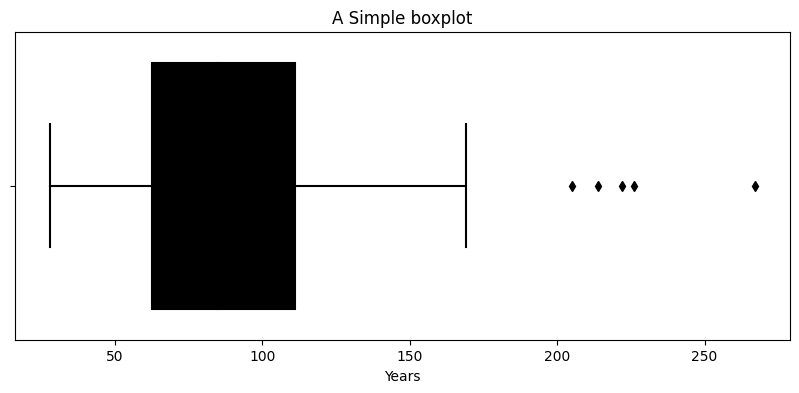

In [25]:
##
## a normal boxplot

fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(data = rose1, x = rose1['Rose'], color = 'black', ax = ax)
plt.title('A Simple boxplot')
plt.xlabel('Years')
plt.show()

## from the boxplot we can see that we have some outliers in the data.
## The mean is at less than 100 units.
## Most of the values fall between 1 and 170ish maybe.

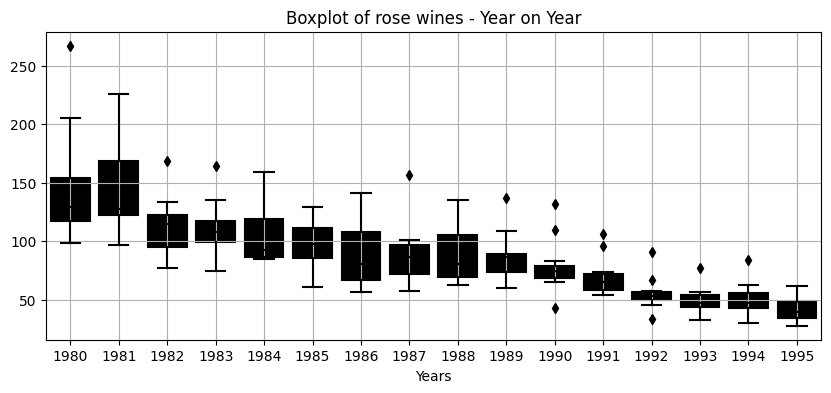

In [26]:
##
## Lets create a boxplot - year on year

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = rose1.index.year,y = rose1.values[:,0],ax=ax, color = 'black')
plt.title('Boxplot of rose wines - Year on Year')
plt.xlabel('Years')
plt.grid()
plt.show();


## we have 10 years with outliers.

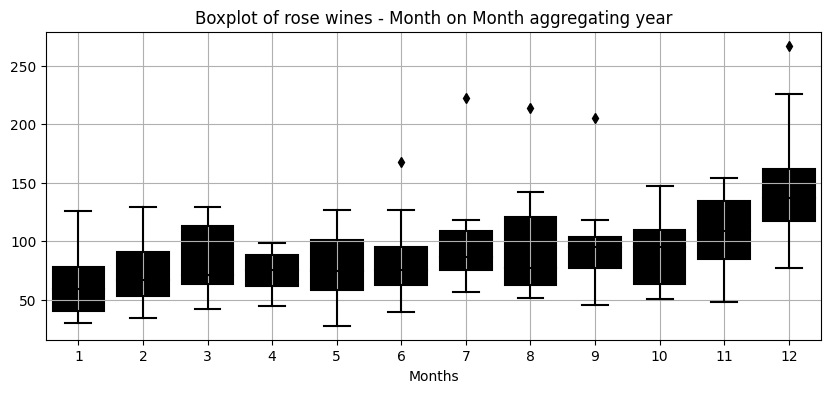

In [27]:
##
## Lets create a boxplot - Month on Month aggregating year

fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x = rose1.index.month,y = rose1.values[:,0],ax=ax, color = 'black')
plt.title('Boxplot of rose wines - Month on Month aggregating year')
plt.xlabel('Months')
plt.grid()
plt.show();

## We do have some outliers in the months from June to September and then December
## The month of december is way ahead of everyone in terms of sales
## Starting we can see a greaduale rise in terms of sales over the whoel year



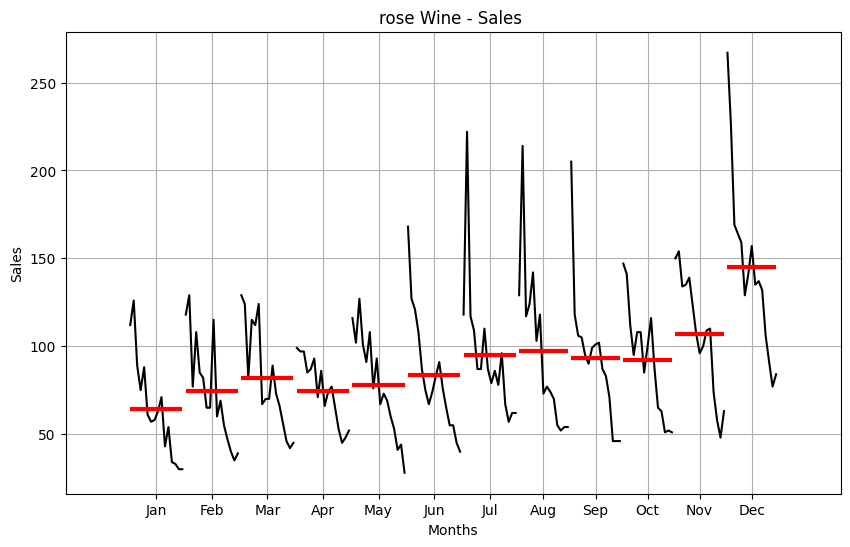

In [28]:
##
##

from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (10, 6))

month_plot(rose1, ylabel = 'Sales', ax = ax)
plt.grid()
plt.title("rose Wine - Sales ")
plt.xlabel('Months')
plt.show()


## after imputing the null values we are seeing the mean red line
## use this in the report.

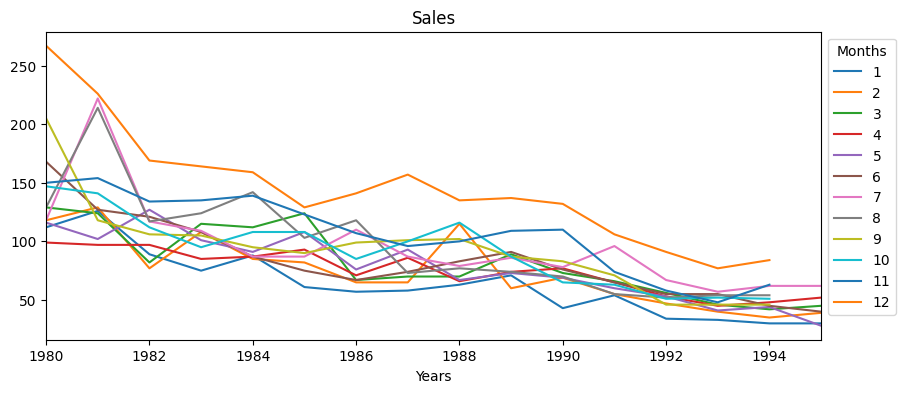

In [29]:
##
## lets create a pivot table and then plot it

MOM_sales = pd.pivot_table(rose1, values = 'Rose', columns = rose1.index.month, index = rose1.index.year)

fig, ax = plt.subplots(figsize = (10, 4))
MOM_sales.plot(ax = ax)
plt.title("Sales")
plt.xlim(1980, 1995)
plt.xlabel("Years")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = 'Months')
plt.show()

In [30]:
##
## lets decompose the dataset on both additive and multiplicative models

from statsmodels.tsa.seasonal import seasonal_decompose


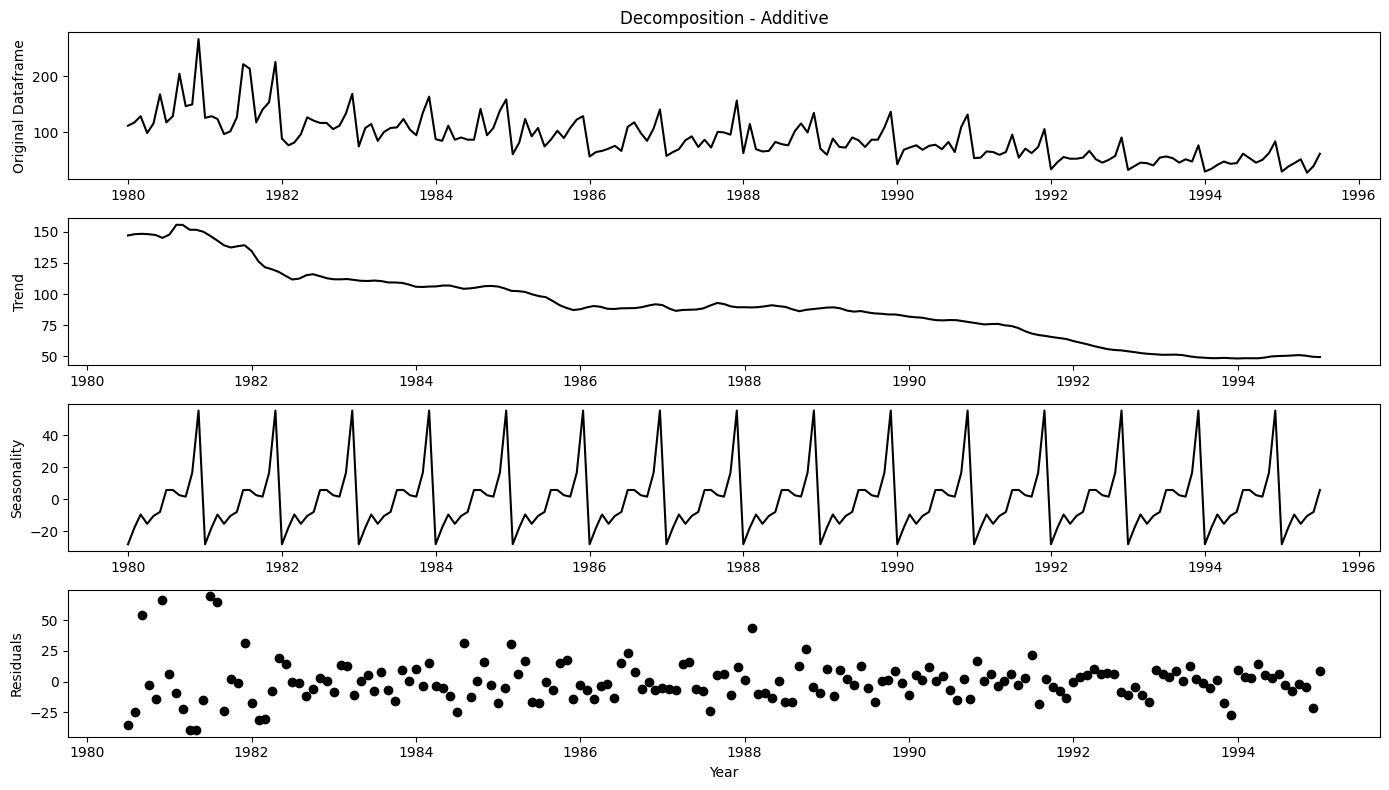

In [31]:
##
## Additive Decomposition

add_decompose = seasonal_decompose(rose1, model = 'additive')
add_decompose_residuals = add_decompose.resid.dropna()

plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(rose1['Rose'], color = 'black')
plt.title("Decomposition - Additive")
plt.ylabel('Original Dataframe')

plt.subplot(412)
plt.plot(add_decompose.trend, color = 'black')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(add_decompose.seasonal, color = 'black')
plt.ylabel('Seasonality')

plt.subplot(414)
plt.scatter(add_decompose_residuals.index, add_decompose_residuals, color='black')
plt.xlabel('Year')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

## The residuals are somewhat scattered but we can also slightly see a pattern. But overall it fits better
## Seasonality is consitent to we have seen, but the variance in the values ranges from -20 to 55ish, trend is slightyl dominating
## Trend shows a gradual decrease

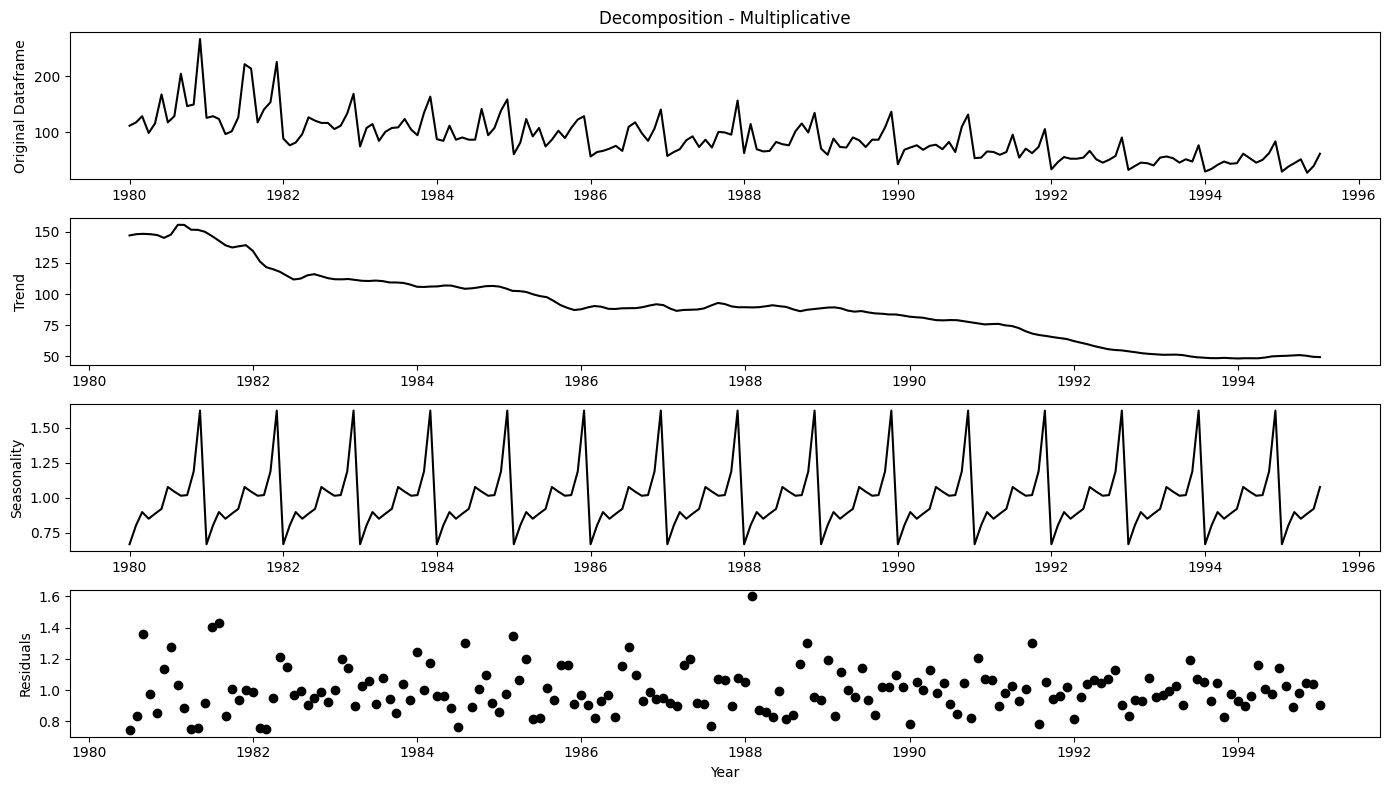

In [32]:
##
## Multiplicative Decomposition

mul_decompose = seasonal_decompose(rose1, model = 'multiplicative')
mul_decompose_residuals = mul_decompose.resid.dropna()

# Plotting the decomposed components for both additive and multiplicative models
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(rose1['Rose'], color = 'black')
plt.title('Decomposition - Multiplicative')
plt.ylabel('Original Dataframe')

plt.subplot(412)
plt.plot(mul_decompose.trend, color = 'black')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(mul_decompose.seasonal, color = 'black')
plt.ylabel('Seasonality')

plt.subplot(414)
plt.scatter(mul_decompose_residuals.index, mul_decompose_residuals, color='black')
plt.xlabel('Year')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


## from the looks of it, additive seems to hold better.
## the residual points are somewhat in a line showing a pattern.

## 3) Split the data into training and test. The test data should start in 1991

In [33]:
##
## lets split the data into test and training dataframes

rose1_train = rose1[rose1.index < '1991']
rose1_test = rose1[rose1.index >= '1991']

print(rose1_train.head())
print(rose1_test.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


In [34]:
##
##

print(rose1_train.shape)
print(rose1_test.shape)

(132, 1)
(55, 1)


## 4) Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1) Linear Regression

In [35]:
##
## lets use regression on the sparling wines sales values and see how the model performs


train_index = [i+1 for i in range(len(rose1_train))]
test_index = [i+133 for i in range(len(rose1_test))]

print('Train_index', '\n', train_index)
print('Test_index', '\n', test_index)


Train_index 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test_index 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [36]:
##
## Lets create a separate copy for Linear Regression train and test

LR_train = rose1_train.copy()
LR_test = rose1_test.copy()


In [37]:
##
## Lets add the new time index to train and test

LR_train['Time_index'] = train_index
LR_test['Time_index'] = test_index

print(LR_train.tail())
print(LR_test.head())


             Rose  Time_index
YearMonth                    
1990-08-01   70.0         128
1990-09-01   83.0         129
1990-10-01   65.0         130
1990-11-01  110.0         131
1990-12-01  132.0         132
            Rose  Time_index
YearMonth                   
1991-01-01  54.0         133
1991-02-01  55.0         134
1991-03-01  66.0         135
1991-04-01  65.0         136
1991-05-01  60.0         137


In [38]:
##
## Lets build the linear regression model


from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(LR_train[['Time_index']], LR_train['Rose'].values)

LinearRegression()

In [39]:
##
## Now lets predict the test values

LR_pred = linreg.predict(LR_test[['Time_index']])

LR_test['Predictions'] = LR_pred


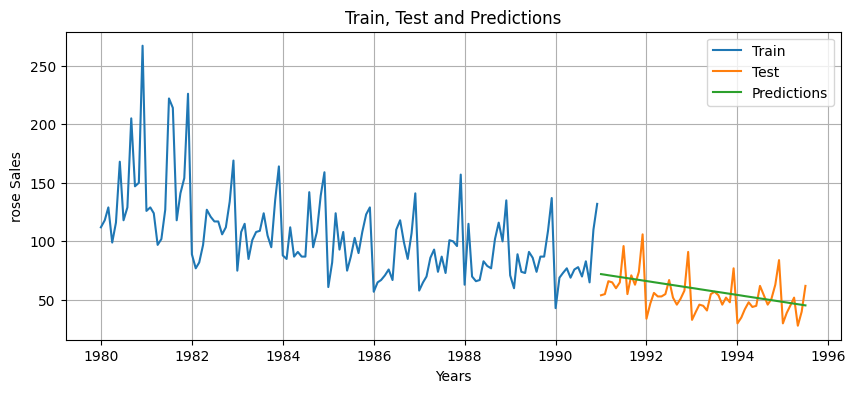

In [40]:
##
## Lets now plot the dataset

plt.figure(figsize = (10, 4))
plt.plot(rose1_train['Rose'], label = 'Train')
plt.plot(rose1_test['Rose'], label = 'Test')
plt.plot(LR_test['Predictions'], label = 'Predictions')
plt.title("Train, Test and Predictions")
plt.grid()
plt.xlabel('Years')
plt.ylabel('rose Sales')
plt.legend(loc = 'best')
plt.show()

In [41]:
##
## lets evalueate the model

from sklearn import metrics

## Test data root mean square error

rmse_linreg_test = metrics.mean_squared_error(rose1_test['Rose'], LR_test['Predictions'],
                                              squared = False).round(3)

print('Linear Regression RMSE = ', rmse_linreg_test)



Linear Regression RMSE =  15.306


In [42]:
##
## Now lets create a new DF having Description and RMSE values

Results = pd.DataFrame({'Model': 'Linear Regression', 'Root Mean Square Error': [rmse_linreg_test]})
Results.head()

Model  Root Mean Square Error
0  Linear Regression                  15.306

### Model 2) Moving Average

In [43]:
##
## For starters we have to average the entire data
## hence copying the dataframe as a whole

momean_rose1 = rose1.copy()
momean_rose1.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [44]:
##
## Now lets start to trail the dataframe by 2, 4, 6, 9, 12, 15

momean_rose1['Trail_2'] = momean_rose1['Rose'].rolling(2).mean()
momean_rose1['Trail_4'] = momean_rose1['Rose'].rolling(4).mean()
momean_rose1['Trail_6'] = momean_rose1['Rose'].rolling(6).mean()
momean_rose1['Trail_9'] = momean_rose1['Rose'].rolling(9).mean()
momean_rose1['Trail_12'] = momean_rose1['Rose'].rolling(12).mean()
momean_rose1['Trail_15'] = momean_rose1['Rose'].rolling(15).mean()

momean_rose1.head()

Rose  Trail_2  Trail_4  Trail_6  Trail_9  Trail_12  Trail_15
YearMonth                                                                
1980-01-01  112.0      NaN      NaN      NaN      NaN       NaN       NaN
1980-02-01  118.0    115.0      NaN      NaN      NaN       NaN       NaN
1980-03-01  129.0    123.5      NaN      NaN      NaN       NaN       NaN
1980-04-01   99.0    114.0    114.5      NaN      NaN       NaN       NaN
1980-05-01  116.0    107.5    115.5      NaN      NaN       NaN       NaN

In [45]:
##
##

momean_rose1.head(20)

Rose  Trail_2  Trail_4     Trail_6     Trail_9    Trail_12  \
YearMonth                                                                 
1980-01-01  112.0      NaN      NaN         NaN         NaN         NaN   
1980-02-01  118.0    115.0      NaN         NaN         NaN         NaN   
1980-03-01  129.0    123.5      NaN         NaN         NaN         NaN   
1980-04-01   99.0    114.0   114.50         NaN         NaN         NaN   
1980-05-01  116.0    107.5   115.50         NaN         NaN         NaN   
1980-06-01  168.0    142.0   128.00  123.666667         NaN         NaN   
1980-07-01  118.0    143.0   125.25  124.666667         NaN         NaN   
1980-08-01  129.0    123.5   132.75  126.500000         NaN         NaN   
1980-09-01  205.0    167.0   155.00  139.166667  132.666667         NaN   
1980-10-01  147.0    176.0   149.75  147.166667  136.555556         NaN   
1980-11-01  150.0    148.5   157.75  152.833333  140.111111         NaN   
1980-12-01  267.0    208.5   192.25  169.333333  155.444444  146.500000   
1981-01-01  126.0    196.5   172.50  170.666667  158.444444  147.666667   
1981-02-01  129.0    127.5   168.00  170.666667  159.888889  148.583333   
1981-03-01  124.0    126.5   161.50  157.166667  155.000000  148.166667   
1981-04-01   97.0    110.5   119.00  148.833333  152.666667  148.000000   
1981-05-01  102.0     99.5   113.00  140.833333  149.666667  146.833333   
1981-06-01  127.0    114.5   112.50  117.500000  141.000000  143.416667   
1981-07-01  222.0    174.5   137.00  133.500000  149.333333  152.083333   
1981-08-01  214.0    218.0   166.25  147.666667  156.444444  159.166667   

              Trail_15  
YearMonth               
1980-01-01         NaN  
1980-02-01         NaN  
1980-03-01         NaN  
1980-04-01         NaN  
1980-05-01         NaN  
1980-06-01         NaN  
1980-07-01         NaN  
1980-08-01         NaN  
1980-09-01         NaN  
1980-10-01         NaN  
1980-11-01         NaN  
1980-12-01         NaN  
1981-01-01         NaN  
1981-02-01         NaN  
1981-03-01  142.466667  
1981-04-01  141.466667  
1981-05-01  140.400000  
1981-06-01  140.266667  
1981-07-01  148.466667  
1981-08-01  155.000000

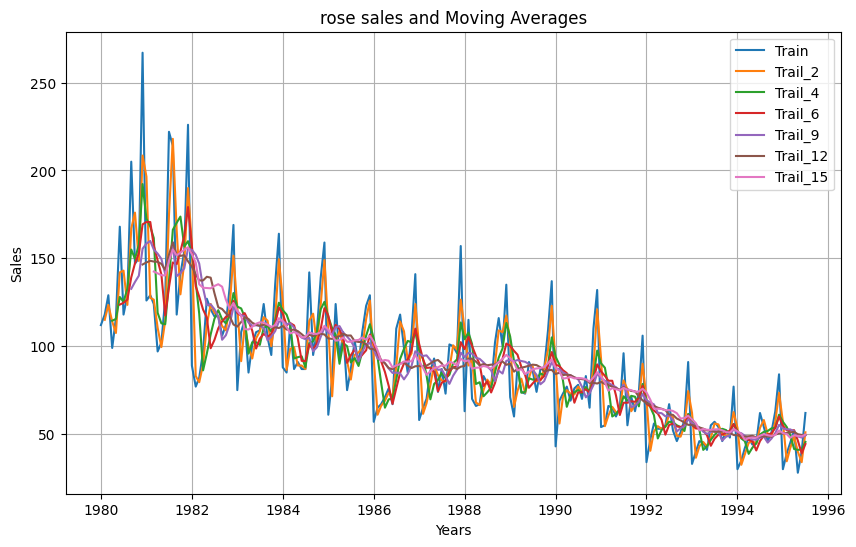

In [46]:
##
## lets do a plot


plt.figure(figsize = (10, 6))
plt.plot(momean_rose1['Rose'], label = 'Train')
plt.plot(momean_rose1['Trail_2'], label = 'Trail_2')
plt.plot(momean_rose1['Trail_4'], label = 'Trail_4')
plt.plot(momean_rose1['Trail_6'], label = 'Trail_6')
plt.plot(momean_rose1['Trail_9'], label = 'Trail_9')
plt.plot(momean_rose1['Trail_12'], label = 'Trail_12')
plt.plot(momean_rose1['Trail_15'], label = 'Trail_15')

plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales and Moving Averages')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [47]:
##
## Now lets prepare the train and test dataframes

momean_rose1_train = momean_rose1[momean_rose1.index < '1991']
momean_rose1_test = momean_rose1[momean_rose1.index >= '1991']

print(momean_rose1_train.shape)
print(momean_rose1_test.shape)

(132, 7)
(55, 7)


In [48]:
##
##

print(momean_rose1_train.tail())
print(momean_rose1_test.head())

             Rose  Trail_2  Trail_4    Trail_6    Trail_9   Trail_12  \
YearMonth                                                              
1990-08-01   70.0     74.0    73.25  73.833333  76.888889  81.250000   
1990-09-01   83.0     76.5    76.75  75.500000  70.888889  80.916667   
1990-10-01   65.0     74.0    74.00  73.500000  73.333333  79.083333   
1990-11-01  110.0     87.5    82.00  80.333333  77.888889  79.166667   
1990-12-01  132.0    121.0    97.50  89.666667  84.444444  78.750000   

             Trail_15  
YearMonth              
1990-08-01  81.733333  
1990-09-01  81.200000  
1990-10-01  79.800000  
1990-11-01  82.200000  
1990-12-01  85.200000  
            Rose  Trail_2  Trail_4    Trail_6    Trail_9   Trail_12   Trail_15
YearMonth                                                                     
1991-01-01  54.0     93.0    90.25  85.666667  81.888889  79.666667  83.000000
1991-02-01  55.0     54.5    87.75  83.166667  80.333333  78.500000  79.400000
1991-03-01 

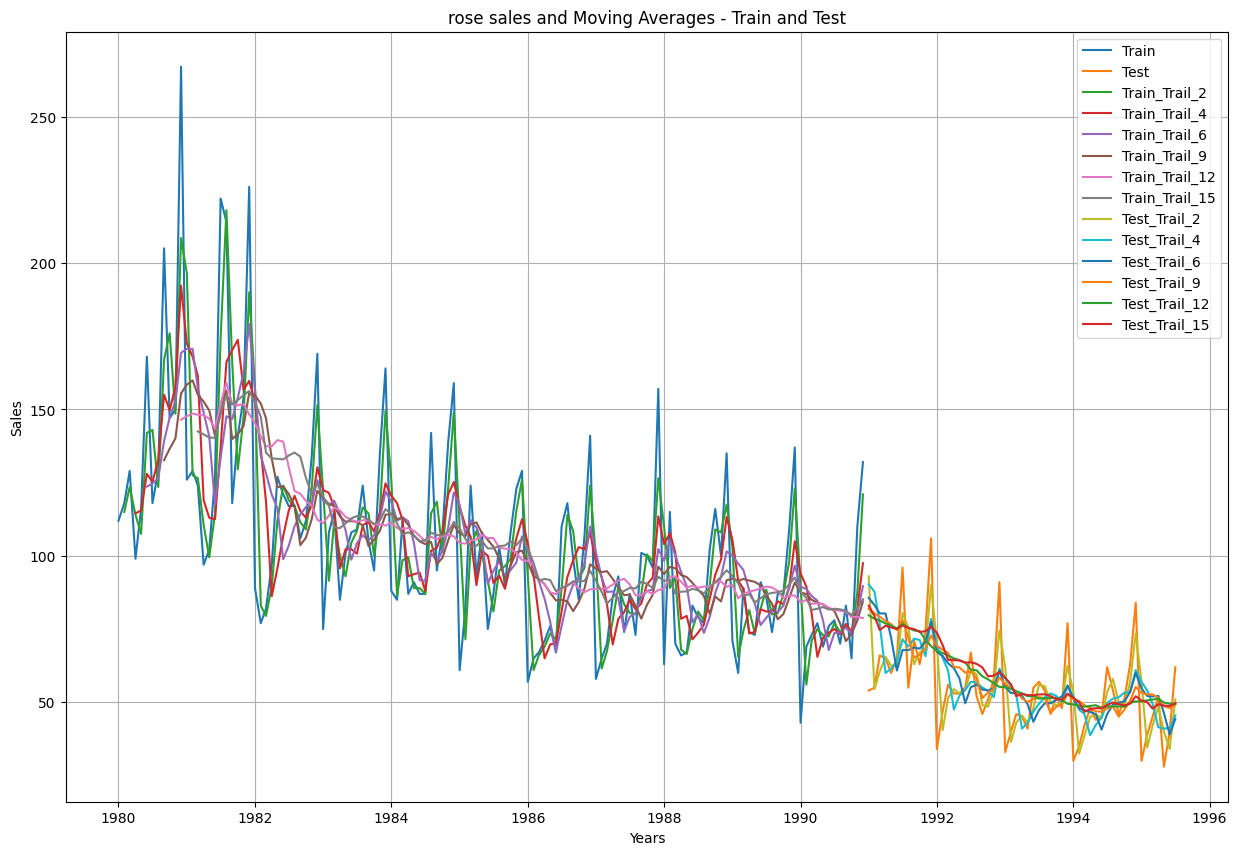

In [49]:
##
## now lets plot the test and train data


plt.figure(figsize = (15, 10))
plt.plot(momean_rose1_train['Rose'], label = 'Train')
plt.plot(momean_rose1_test['Rose'], label = 'Test')

plt.plot(momean_rose1_train['Trail_2'], label = 'Train_Trail_2')
plt.plot(momean_rose1_train['Trail_4'], label = 'Train_Trail_4')
plt.plot(momean_rose1_train['Trail_6'], label = 'Train_Trail_6')
plt.plot(momean_rose1_train['Trail_9'], label = 'Train_Trail_9')
plt.plot(momean_rose1_train['Trail_12'], label = 'Train_Trail_12')
plt.plot(momean_rose1_train['Trail_15'], label = 'Train_Trail_15')

plt.plot(momean_rose1_test['Trail_2'], label = 'Test_Trail_2')
plt.plot(momean_rose1_test['Trail_4'], label = 'Test_Trail_4')
plt.plot(momean_rose1_test['Trail_6'], label = 'Test_Trail_6')
plt.plot(momean_rose1_test['Trail_9'], label = 'Test_Trail_9')
plt.plot(momean_rose1_test['Trail_12'], label = 'Test_Trail_12')
plt.plot(momean_rose1_test['Trail_15'], label = 'Test_Trail_15')

plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales and Moving Averages - Train and Test')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [50]:
##
## now that we have the predictions lets see how they fare up
## lets focus on MAPE

## Mape for trail 2
mape_momean_rose1_trail_2 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_2']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 2 is :", mape_momean_rose1_trail_2)

## Mape for trail 4
mape_momean_rose1_trail_4 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_4']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 4 is :", mape_momean_rose1_trail_4)

## Mape for trail 6
mape_momean_rose1_trail_6 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_6']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 6 is :", mape_momean_rose1_trail_6)

## Mape for trail 9
mape_momean_rose1_trail_9 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_9']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 9 is :", mape_momean_rose1_trail_9)

## Mape for trail 12
mape_momean_rose1_trail_12 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_12']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 12 is :", mape_momean_rose1_trail_12)

## Mape for trail 15
mape_momean_rose1_trail_15 = np.mean(np.abs((momean_rose1_test['Rose'] - momean_rose1_test['Trail_15']) / momean_rose1_test['Rose'])) * 100
print("MAPE for Trail 15 is :", mape_momean_rose1_trail_15)


MAPE for Trail 2 is : 16.218633333121385
MAPE for Trail 4 is : 21.76895195088244
MAPE for Trail 6 is : 22.726540402427624
MAPE for Trail 9 is : 23.238028462617123
MAPE for Trail 12 is : 24.216461127811055
MAPE for Trail 15 is : 24.32374268697902


In [51]:
##
## now lets find the root mean square error


## RMSE for trail 2
rmse_momean_rose1_trail_2 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_2'],
                                              squared = False).round(3)
print('Root mean square error for trail 2', rmse_momean_rose1_trail_2)

## RMSE for trail 4
rmse_momean_rose1_trail_4 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_4'],
                                              squared = False).round(3)
print('Root mean square error for trail 4', rmse_momean_rose1_trail_4)

## RMSE for trail 6
rmse_momean_rose1_trail_6 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_6'],
                                              squared = False).round(3)
print('Root mean square error for trail 6', rmse_momean_rose1_trail_6)

## RMSE for trail 9
rmse_momean_rose1_trail_9 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_9'],
                                              squared = False).round(3)
print('Root mean square error for trail 9', rmse_momean_rose1_trail_9)

## RMSE for trail 12
rmse_momean_rose1_trail_12 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_12'],
                                              squared = False).round(3)
print('Root mean square error for trail 12', rmse_momean_rose1_trail_12)

## RMSE for trail 15
rmse_momean_rose1_trail_15 = metrics.mean_squared_error(momean_rose1_test['Rose'], momean_rose1_test['Trail_15'],
                                              squared = False).round(3)
print('Root mean square error for trail 15', rmse_momean_rose1_trail_15)


## surprisingly 15 is better than 6, 9, and 12

Root mean square error for trail 2 11.611
Root mean square error for trail 4 14.536
Root mean square error for trail 6 14.578
Root mean square error for trail 9 14.83
Root mean square error for trail 12 15.375
Root mean square error for trail 15 15.287


In [52]:
##
## Results dataframe

Results_momean = pd.DataFrame({'Model': ['Moving_Average_Trailing_by_2_points',
                                         'Moving_Average_Trailing_by_4_points',
                                         'Moving_Average_Trailing_by_6_points',
                                         'Moving_Average_Trailing_by_9_points',
                                         'Moving_Average_Trailing_by_12_points',
                                         'Moving_Average_Trailing_by_15_points'],
                               'Root Mean Square Error': [rmse_momean_rose1_trail_2,
                                                          rmse_momean_rose1_trail_4,
                                                          rmse_momean_rose1_trail_6,
                                                          rmse_momean_rose1_trail_9,
                                                          rmse_momean_rose1_trail_12,
                                                          rmse_momean_rose1_trail_15]})
Results_momean.head()

Model  Root Mean Square Error
0   Moving_Average_Trailing_by_2_points                  11.611
1   Moving_Average_Trailing_by_4_points                  14.536
2   Moving_Average_Trailing_by_6_points                  14.578
3   Moving_Average_Trailing_by_9_points                  14.830
4  Moving_Average_Trailing_by_12_points                  15.375

In [53]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_momean])
Results.head()

Model  Root Mean Square Error
0                    Linear Regression                  15.306
0  Moving_Average_Trailing_by_2_points                  11.611
1  Moving_Average_Trailing_by_4_points                  14.536
2  Moving_Average_Trailing_by_6_points                  14.578
3  Moving_Average_Trailing_by_9_points                  14.830

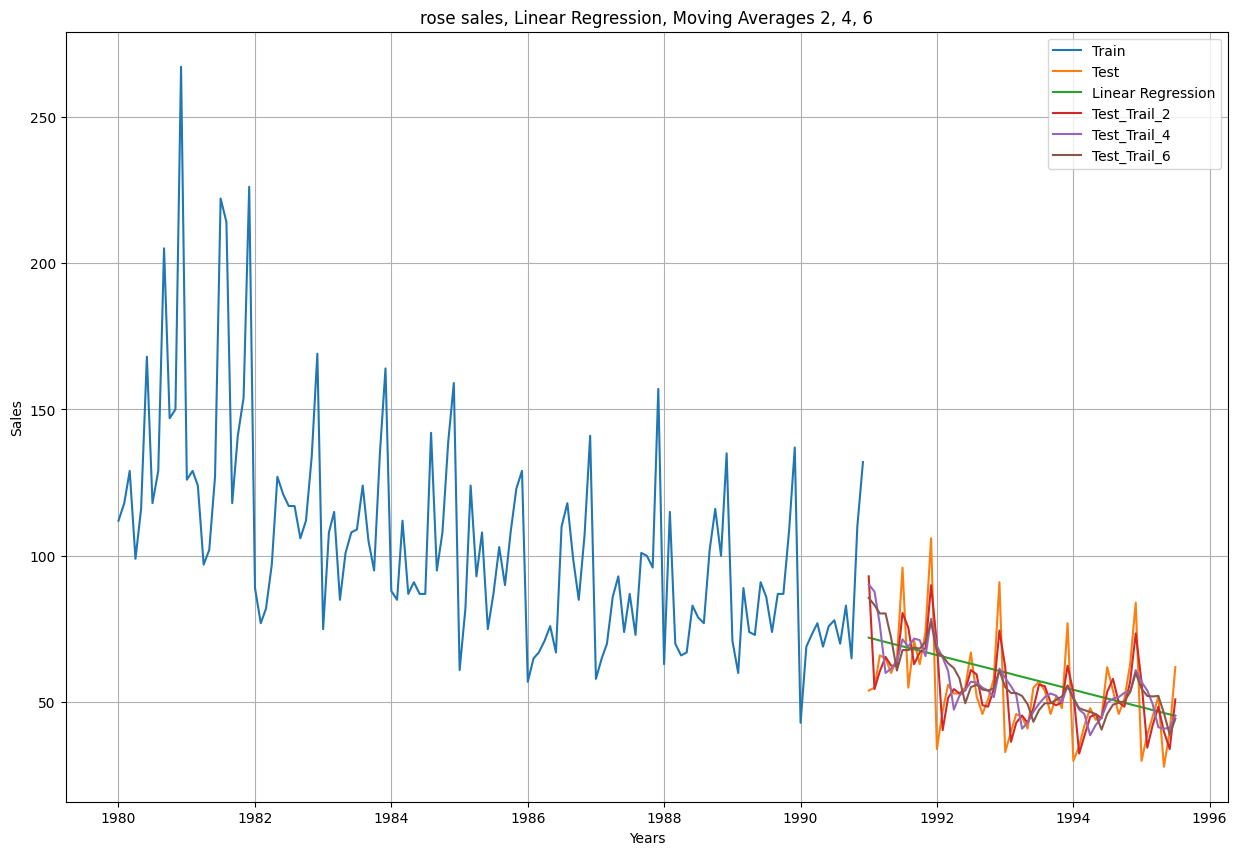

In [54]:
##
## before going lets just plot train, test, linreg, trail 2, 4 and 6
## infer the model below


plt.figure(figsize = (15, 10))
plt.plot(rose1_train['Rose'], label = 'Train')
plt.plot(rose1_test['Rose'], label = 'Test')

plt.plot(LR_test['Predictions'], label = 'Linear Regression')
plt.plot(momean_rose1_test['Trail_2'], label = 'Test_Trail_2')
plt.plot(momean_rose1_test['Trail_4'], label = 'Test_Trail_4')
plt.plot(momean_rose1_test['Trail_6'], label = 'Test_Trail_6')

plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Linear Regression, Moving Averages 2, 4, 6')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()




### Model 3) Simple Exponential Smoothing



In [55]:
##
## lets import the package

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [56]:
##
## Copy the train and test dataframes

SES_rose1_train = rose1_train.copy()
SES_rose1_test = rose1_test.copy()

print(SES_rose1_train.shape)
print(SES_rose1_test.shape)

(132, 1)
(55, 1)


In [57]:
##
##

print(SES_rose1_train.tail())
print(SES_rose1_test.head())

             Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0
            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


In [58]:
##
## Lets instantiate the model and see how the model performs

SES = SimpleExpSmoothing(SES_rose1_train['Rose'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
##
##

SES_Autofit = SES.fit(optimized = True)


In [60]:
##
## Now lets see the parameters

SES_Autofit.params


## Our level is below 0.0

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [61]:
##
## lets predict

SES_rose1_test['Predictions'] = SES_Autofit.forecast(steps = len(SES_rose1_test))
SES_rose1_test.head()

Rose  Predictions
YearMonth                    
1991-01-01  54.0    87.983765
1991-02-01  55.0    87.983765
1991-03-01  66.0    87.983765
1991-04-01  65.0    87.983765
1991-05-01  60.0    87.983765

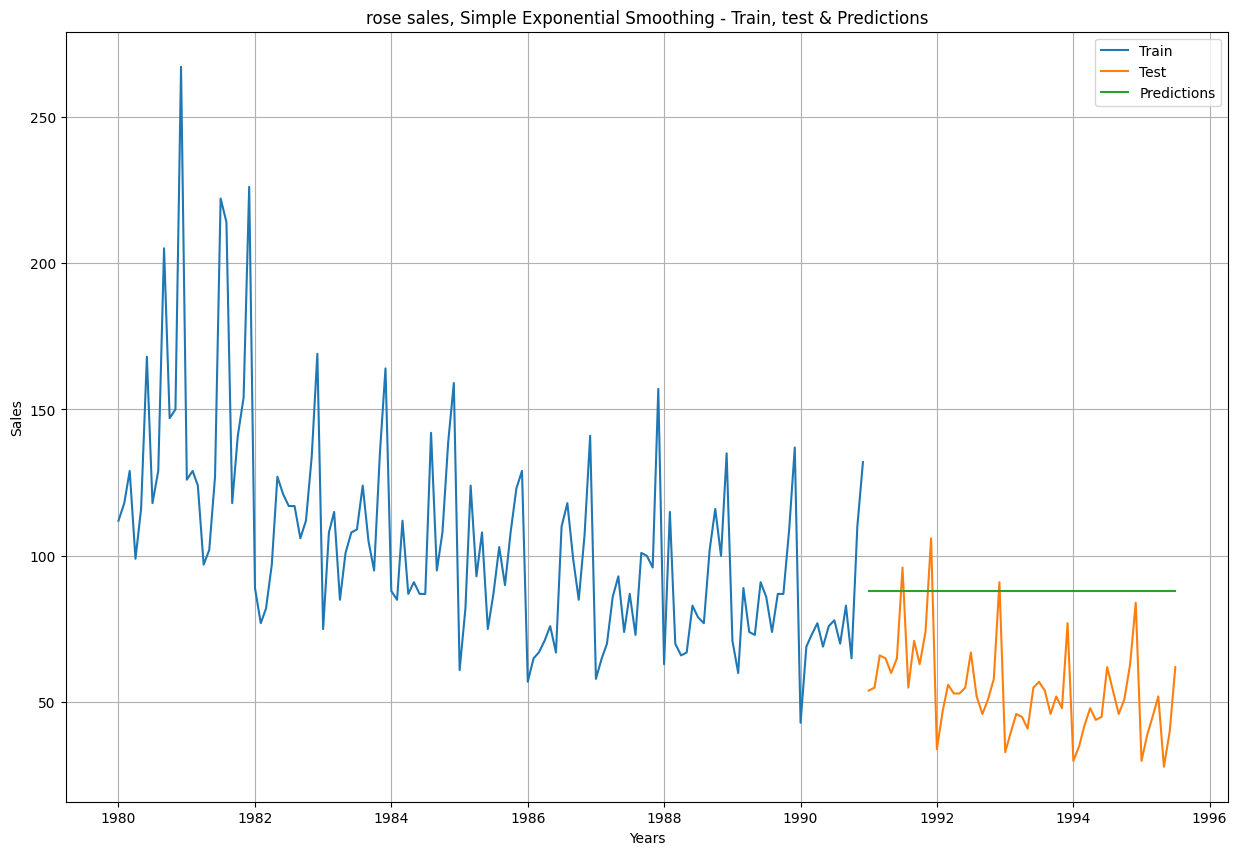

In [62]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(SES_rose1_train['Rose'], label = 'Train')
plt.plot(SES_rose1_test['Rose'], label = 'Test')

plt.plot(SES_rose1_test['Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Simple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

Model Evaluation for alpha as 0.12 in Simple Exponential Smoothing

In [63]:
##
## now lets find the root mean square error


rmse_SES_rose1_test = metrics.mean_squared_error(SES_rose1_test['Rose'], SES_rose1_test['Predictions'],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.12', rmse_SES_rose1_test)

Root mean square error for SES, where alpha is 0.12 37.159


In [64]:
##
## Results dataframe

Results_SES = pd.DataFrame({'Model': 'Simple_Exponentail_Smoothing_Alpha_0.12', 'Root Mean Square Error': [rmse_SES_rose1_test]})
Results_SES.head()

Model  Root Mean Square Error
0  Simple_Exponentail_Smoothing_Alpha_0.12                  37.159

In [65]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_SES])
Results.head(10)

Model  Root Mean Square Error
0                        Linear Regression                  15.306
0      Moving_Average_Trailing_by_2_points                  11.611
1      Moving_Average_Trailing_by_4_points                  14.536
2      Moving_Average_Trailing_by_6_points                  14.578
3      Moving_Average_Trailing_by_9_points                  14.830
4     Moving_Average_Trailing_by_12_points                  15.375
5     Moving_Average_Trailing_by_15_points                  15.287
0  Simple_Exponentail_Smoothing_Alpha_0.12                  37.159

Now let us setup different alpha values and see how the model performs.

Higher alpha values will give more weights to recent observations and vice versa.

In [66]:
##
## Lets setup containers

SES_results_2 = pd.DataFrame({'Alpha_values': [], 'Train_RMSE': [], 'Test_RMSE': []})
SES_results_2


Empty DataFrame
Columns: [Alpha_values, Train_RMSE, Test_RMSE]
Index: []

In [67]:
##
## the for loop below

for i in np.arange(0.3, 1, 0.1):
    SES_alpha_i = SES.fit(smoothing_level = i, optimized = False, use_brute = True)
    SES_rose1_train['Predictions_2', i] = SES_alpha_i.fittedvalues
    SES_rose1_test['Predictions_2', i] = SES_alpha_i.forecast(steps = int(len(SES_rose1_test)))
    rmse_SES_rose1_train_i = metrics.mean_squared_error(SES_rose1_train['Rose'], SES_rose1_train['Predictions_2', i],
                                              squared = False).round(3)
    rmse_SES_rose1_test_i = metrics.mean_squared_error(SES_rose1_test['Rose'], SES_rose1_test['Predictions_2', i],
                                              squared = False).round(3)
    SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_rose1_train_i,
                                          'Test_RMSE': rmse_SES_rose1_test_i}, ignore_index = True)



<ipython-input-67-0eb0e49aa51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_rose1_train_i,
<ipython-input-67-0eb0e49aa51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_rose1_train_i,
<ipython-input-67-0eb0e49aa51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.append({'Alpha_values': i, 'Train_RMSE': rmse_SES_rose1_train_i,
<ipython-input-67-0eb0e49aa51d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SES_results_2 = SES_results_2.a

In [68]:
##
## now lets evaluate the model

SES_results_2.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Train_RMSE  Test_RMSE
0           0.3      32.470     47.060
1           0.4      33.035     53.319
2           0.5      33.683     59.191
3           0.6      34.441     64.518
4           0.7      35.323     69.244
5           0.8      36.335     73.320
6           0.9      37.483     76.684

In [69]:
##
##

SES_rose1_test.head()

Rose  Predictions  (Predictions_2, 0.3)  (Predictions_2, 0.4)  \
YearMonth                                                                   
1991-01-01  54.0    87.983765             98.669021            105.260413   
1991-02-01  55.0    87.983765             98.669021            105.260413   
1991-03-01  66.0    87.983765             98.669021            105.260413   
1991-04-01  65.0    87.983765             98.669021            105.260413   
1991-05-01  60.0    87.983765             98.669021            105.260413   

            (Predictions_2, 0.5)  (Predictions_2, 0.6000000000000001)  \
YearMonth                                                               
1991-01-01             111.37647                            116.88547   
1991-02-01             111.37647                            116.88547   
1991-03-01             111.37647                            116.88547   
1991-04-01             111.37647                            116.88547   
1991-05-01             111.37647                            116.88547   

            (Predictions_2, 0.7000000000000002)  \
YearMonth                                         
1991-01-01                           121.747572   
1991-02-01                           121.747572   
1991-03-01                           121.747572   
1991-04-01                           121.747572   
1991-05-01                           121.747572   

            (Predictions_2, 0.8000000000000003)  \
YearMonth                                         
1991-01-01                            125.92556   
1991-02-01                            125.92556   
1991-03-01                            125.92556   
1991-04-01                            125.92556   
1991-05-01                            125.92556   

            (Predictions_2, 0.9000000000000001)  
YearMonth                                        
1991-01-01                           129.366777  
1991-02-01                           129.366777  
1991-03-01                           129.366777  
1991-04-01                           129.366777  
1991-05-01                           129.366777

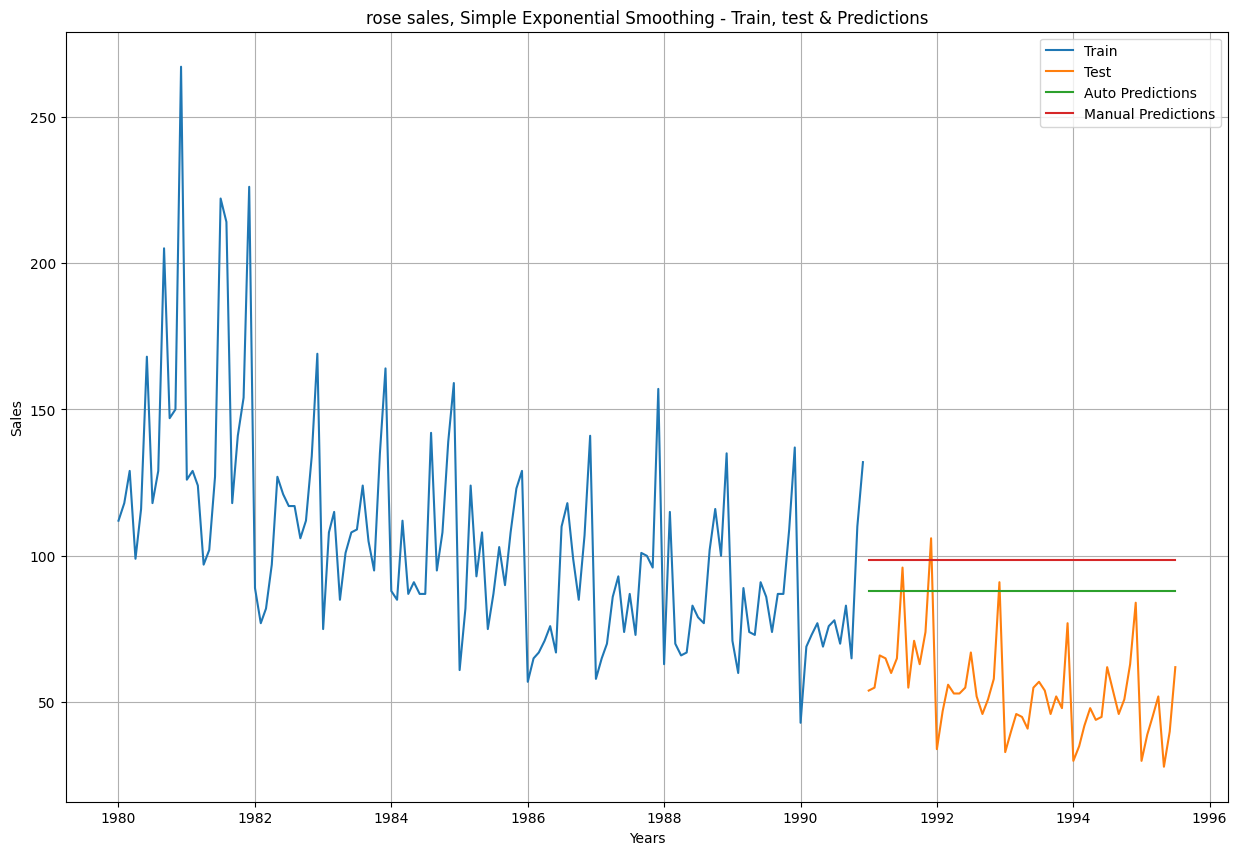

In [70]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(SES_rose1_train['Rose'], label = 'Train')
plt.plot(SES_rose1_test['Rose'], label = 'Test')

plt.plot(SES_rose1_test['Predictions'], label = 'Auto Predictions')
plt.plot(SES_rose1_test['Predictions_2', 0.3], label = 'Manual Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Simple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [71]:
##
## now lets find the root mean square error


rmse_SES_rose1_test_2 = metrics.mean_squared_error(SES_rose1_test['Rose'], SES_rose1_test['Predictions_2', 0.3],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.3', rmse_SES_rose1_test_2)

Root mean square error for SES, where alpha is 0.3 47.06


In [72]:
##
## Results dataframe

Results_SES_2 = pd.DataFrame({'Model': 'Simple_Exponentail_Smoothing_Alpha_0.3', 'Root Mean Square Error': [rmse_SES_rose1_test_2]})
Results_SES_2.head()

Model  Root Mean Square Error
0  Simple_Exponentail_Smoothing_Alpha_0.3                   47.06

In [73]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_SES_2])
Results.head(10)

Model  Root Mean Square Error
0                        Linear Regression                  15.306
0      Moving_Average_Trailing_by_2_points                  11.611
1      Moving_Average_Trailing_by_4_points                  14.536
2      Moving_Average_Trailing_by_6_points                  14.578
3      Moving_Average_Trailing_by_9_points                  14.830
4     Moving_Average_Trailing_by_12_points                  15.375
5     Moving_Average_Trailing_by_15_points                  15.287
0  Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0   Simple_Exponentail_Smoothing_Alpha_0.3                  47.060

### Model 4) Double Exponential Smoothing

In [74]:
##
##

DES_rose1_train = rose1_train.copy()
DES_rose1_test = rose1_test.copy()

In [75]:
##
##

DES = Holt(DES_rose1_train['Rose'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [76]:
##
##

DES_Autofit = DES.fit(optimized = True)


In [77]:
##
## Now lets see the parameters

DES_Autofit.params


{'smoothing_level': 0.16213321015010723,
 'smoothing_trend': 0.13152155372234675,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
##
## lets predict

DES_rose1_test['Auto_Predictions'] = DES_Autofit.forecast(steps = len(DES_rose1_test))
DES_rose1_test.head()

Rose  Auto_Predictions
YearMonth                         
1991-01-01  54.0         87.249993
1991-02-01  55.0         88.152722
1991-03-01  66.0         89.055451
1991-04-01  65.0         89.958180
1991-05-01  60.0         90.860910

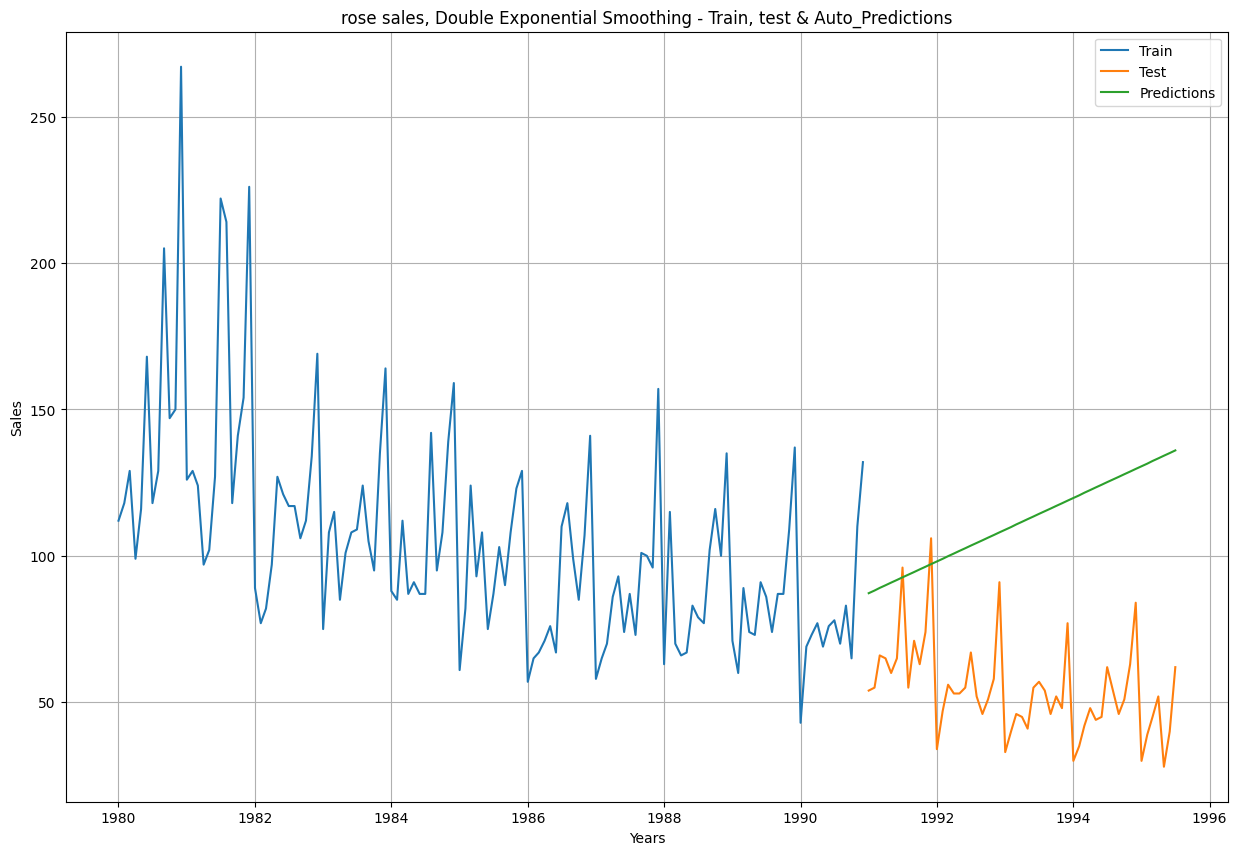

In [79]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(DES_rose1_train['Rose'], label = 'Train')
plt.plot(DES_rose1_test['Rose'], label = 'Test')

plt.plot(DES_rose1_test['Auto_Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Double Exponential Smoothing - Train, test & Auto_Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [80]:
##
## now lets find the root mean square error


rmse_DES_rose1_test = metrics.mean_squared_error(DES_rose1_test['Rose'], DES_rose1_test['Auto_Predictions'],
                                              squared = False).round(3)
print('Root mean square error for SES, where alpha is 0.16 and beta is 0.13', rmse_DES_rose1_test)

Root mean square error for SES, where alpha is 0.16 and beta is 0.13 62.514


In [81]:
##
## Results dataframe

Results_DES = pd.DataFrame({'Model': 'Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13', 'Root Mean Square Error': [rmse_DES_rose1_test]})
Results_DES.head()

Model  Root Mean Square Error
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514

In [82]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_DES])
Results.head(10)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514

In [83]:
##
## Lets setup containers

DES_results = pd.DataFrame({'Alpha_values': [], 'Beta_Values': [], 'Train_RMSE': [], 'Test_RMSE': []})
DES_results


Empty DataFrame
Columns: [Alpha_values, Beta_Values, Train_RMSE, Test_RMSE]
Index: []

In [84]:
##
## the for loop below

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        DES_alpha_i_j = DES.fit(smoothing_level = i, smoothing_trend = j, optimized = False, use_brute = True)
        DES_rose1_train['Predictions', i, j] = DES_alpha_i_j.fittedvalues
        DES_rose1_test['Predictions', i, j] = DES_alpha_i_j.forecast(steps = int(len(DES_rose1_test)))
        rmse_DES_rose1_train = metrics.mean_squared_error(DES_rose1_train['Rose'], DES_rose1_train['Predictions', i, j],
                                                  squared = False).round(3)
        rmse_DES_rose1_test = metrics.mean_squared_error(DES_rose1_test['Rose'], DES_rose1_test['Predictions', i, j],
                                                  squared = False).round(3)
        DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_rose1_train,
                                              'Test_RMSE': rmse_DES_rose1_test}, ignore_index = True)



<ipython-input-84-4dbef31b323d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_rose1_train,
<ipython-input-84-4dbef31b323d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_rose1_train,
<ipython-input-84-4dbef31b323d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DES_results = DES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Train_RMSE': rmse_DES_rose1_train,
<ipython-input-84-4dbef31b323d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [85]:
##
## now lets evaluate the model

DES_results.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Beta_Values  Train_RMSE  Test_RMSE
0            0.3          0.3      35.945    264.975
8            0.4          0.3      36.749    338.712
1            0.3          0.4      37.393    358.153
16           0.5          0.3      37.433    393.677
24           0.6          0.3      38.349    438.700
..           ...          ...         ...        ...
46           0.8          0.9      51.757   1051.860
38           0.7          0.9      48.540   1061.243
47           0.8          1.0      53.844   1094.507
31           0.6          1.0      47.191   1101.480
39           0.7          1.0      50.267   1124.581

[64 rows x 4 columns]

In [86]:
##
##

DES_rose1_test.head()

Rose  Auto_Predictions  (Predictions, 0.3, 0.3)  \
YearMonth                                                     
1991-01-01  54.0         87.249993               105.207496   
1991-02-01  55.0         88.152722               112.131636   
1991-03-01  66.0         89.055451               119.055776   
1991-04-01  65.0         89.958180               125.979916   
1991-05-01  60.0         90.860910               132.904055   

            (Predictions, 0.3, 0.4)  (Predictions, 0.3, 0.5)  \
YearMonth                                                      
1991-01-01               109.329492               113.982720   
1991-02-01               119.121137               126.620083   
1991-03-01               128.912782               139.257446   
1991-04-01               138.704427               151.894809   
1991-05-01               148.496072               164.532172   

            (Predictions, 0.3, 0.6000000000000001)  \
YearMonth                                            
1991-01-01                              118.930390   
1991-02-01                              134.150764   
1991-03-01                              149.371139   
1991-04-01                              164.591513   
1991-05-01                              179.811887   

            (Predictions, 0.3, 0.7000000000000002)  \
YearMonth                                            
1991-01-01                              123.501771   
1991-02-01                              140.660389   
1991-03-01                              157.819006   
1991-04-01                              174.977624   
1991-05-01                              192.136241   

            (Predictions, 0.3, 0.8000000000000003)  \
YearMonth                                            
1991-01-01                              126.698654   
1991-02-01                              144.889439   
1991-03-01                              163.080224   
1991-04-01                              181.271009   
1991-05-01                              199.461794   

            (Predictions, 0.3, 0.9000000000000001)  \
YearMonth                                            
1991-01-01                              128.036454   
1991-02-01                              146.564548   
1991-03-01                              165.092641   
1991-04-01                              183.620735   
1991-05-01                              202.148829   

            (Predictions, 0.3, 1.0000000000000002)  ...  \
YearMonth                                           ...   
1991-01-01                              127.981699  ...   
1991-02-01                              146.721408  ...   
1991-03-01                              165.461116  ...   
1991-04-01                              184.200825  ...   
1991-05-01                              202.940533  ...   

            (Predictions, 0.9000000000000001, 0.9000000000000001)  \
YearMonth                                                           
1991-01-01                                         160.812452       
1991-02-01                                         189.139651       
1991-03-01                                         217.466849       
1991-04-01                                         245.794047       
1991-05-01                                         274.121246       

            (Predictions, 0.9000000000000001, 1.0000000000000002)  \
YearMonth                                                           
1991-01-01                                         161.432269       
1991-02-01                                         189.943483       
1991-03-01                                         218.454697       
1991-04-01                                         246.965912       
1991-05-01                                         275.477126       

            (Predictions, 1.0000000000000002, 0.3)  \
YearMonth                                            
1991-01-01                              146.284705   
1991-02-01                              160.569410   
1991-03

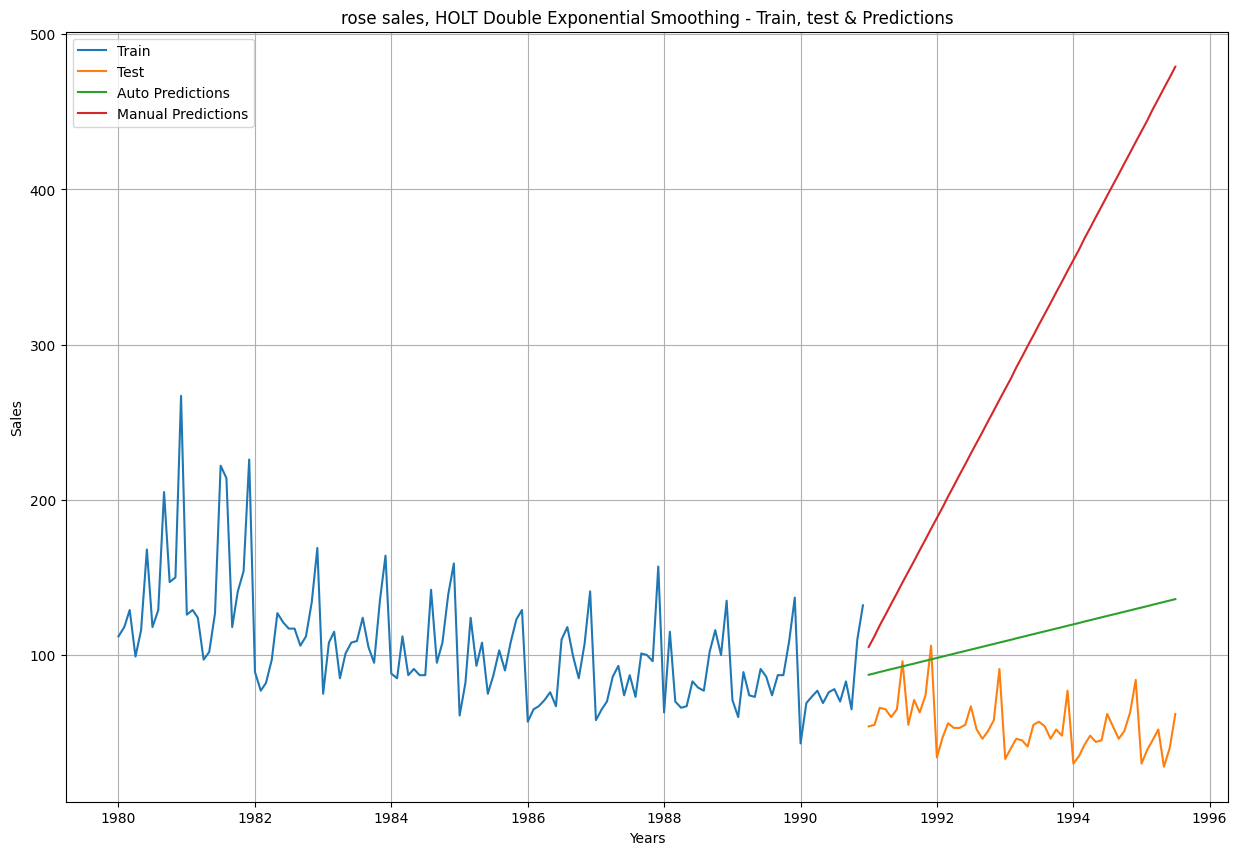

In [87]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(DES_rose1_train['Rose'], label = 'Train')
plt.plot(DES_rose1_test['Rose'], label = 'Test')

plt.plot(DES_rose1_test['Auto_Predictions'], label = 'Auto Predictions')
plt.plot(DES_rose1_test['Predictions', 0.3, 0.3], label = 'Manual Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, HOLT Double Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [88]:
##
## now lets find the root mean square error


rmse_DES_rose1_test = metrics.mean_squared_error(DES_rose1_test['Rose'], DES_rose1_test['Predictions', 0.3, 0.3],
                                              squared = False).round(3)
print('Root mean square error for DES, where alpha is 0.3 and Beta is 0.3', rmse_DES_rose1_test)

Root mean square error for DES, where alpha is 0.3 and Beta is 0.3 264.975


In [89]:
##
## Results dataframe

Results_DES = pd.DataFrame({'Model': 'Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3', 'Root Mean Square Error': [rmse_DES_rose1_test]})
Results_DES.head()

Model  Root Mean Square Error
0  Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975

In [90]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_DES])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975

### Model 5) Triple Exponential Smoothing (Holt - Winter's Model)

In [91]:
##
##

TES_rose1_train = rose1_train.copy()
TES_rose1_test = rose1_test.copy()

In [92]:
##
##

TES_rose1_train.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [93]:
##
##

TES = ExponentialSmoothing(TES_rose1_train['Rose'], trend = 'additive', seasonal = 'multiplicative', freq = 'MS')


In [94]:
##
##

TES_Autofit = TES.fit()

In [95]:
##
##

TES_Autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
##
##

TES_rose1_test['Auto_Predictions'] = TES_Autofit.forecast(steps = int(len(TES_rose1_test)))
TES_rose1_test.head()

Rose  Auto_Predictions
YearMonth                         
1991-01-01  54.0         55.942246
1991-02-01  55.0         63.240624
1991-03-01  66.0         68.899674
1991-04-01  65.0         60.007486
1991-05-01  60.0         67.257150

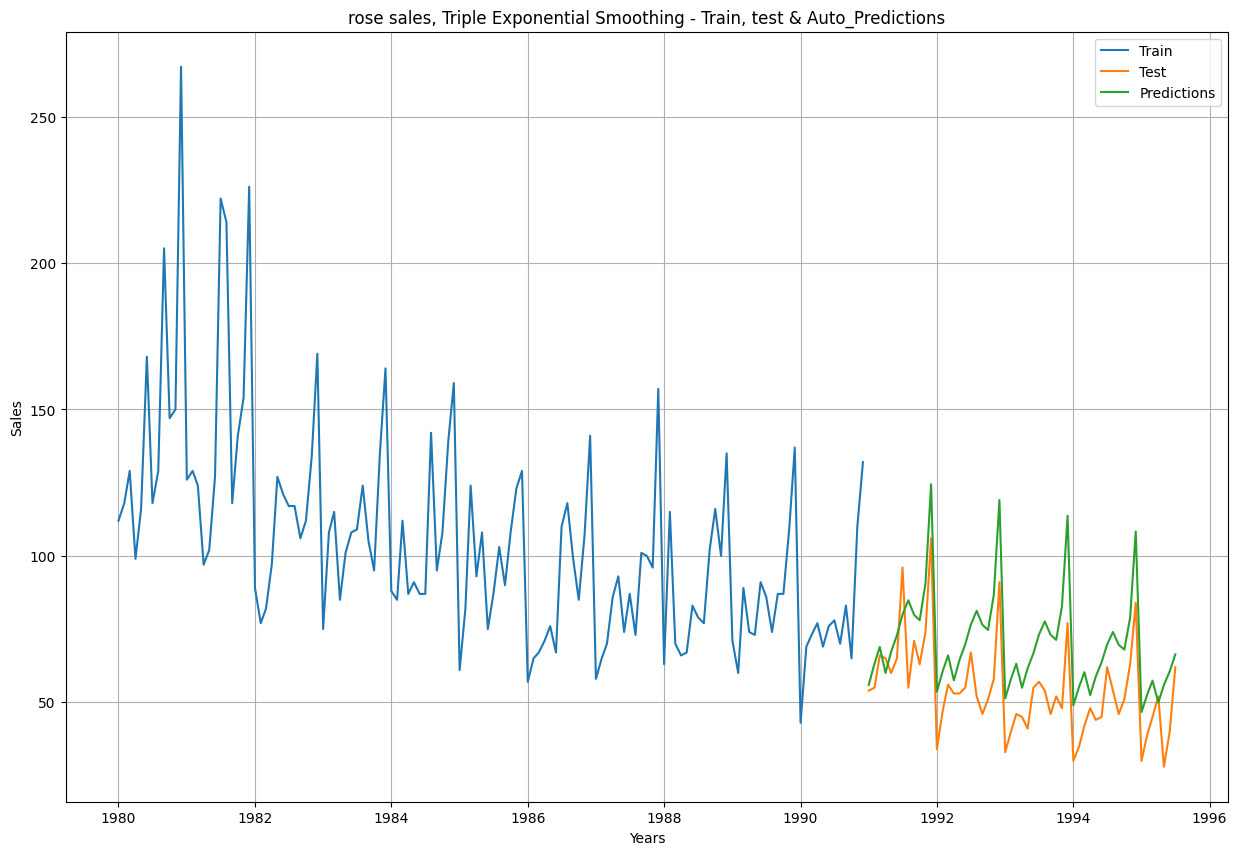

In [97]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(TES_rose1_train['Rose'], label = 'Train')
plt.plot(TES_rose1_test['Rose'], label = 'Test')

plt.plot(TES_rose1_test['Auto_Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Triple Exponential Smoothing - Train, test & Auto_Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [98]:
##
## now lets find the root mean square error


rmse_TES_rose1_test = metrics.mean_squared_error(TES_rose1_test['Rose'], TES_rose1_test['Auto_Predictions'],
                                              squared = False).round(3)
print('Root mean square error for TES, where alpha is 0.07, beta is 0.03 and gamma is 0.0008', rmse_TES_rose1_test)

Root mean square error for TES, where alpha is 0.07, beta is 0.03 and gamma is 0.0008 18.661


In [99]:
##
## Results dataframe

Results_TES = pd.DataFrame({'Model': 'Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0.03_Gamma_0.0008', 'Root Mean Square Error': [rmse_TES_rose1_test]})
Results_TES.head()

Model  Root Mean Square Error
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...                  18.661

In [100]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_TES])
Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...                  18.661

In [101]:
##
## Lets setup containers

TES_results = pd.DataFrame({'Alpha_values': [], 'Beta_Values': [], 'Gamma_values': [], 'Train_RMSE': [], 'Test_RMSE': []})
TES_results


Empty DataFrame
Columns: [Alpha_values, Beta_Values, Gamma_values, Train_RMSE, Test_RMSE]
Index: []

In [102]:
##
## the for loop below

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        for k in np.arange(0.3, 1.1, 0.1):
            TES_alpha_i_j_k = TES.fit(smoothing_level = i, smoothing_trend = j, smoothing_seasonal = k, optimized = False, use_brute = True)
            TES_rose1_train['Predictions', i, j, k] = TES_alpha_i_j_k.fittedvalues
            TES_rose1_test['Predictions', i, j, k] = TES_alpha_i_j_k.forecast(steps = int(len(TES_rose1_test)))
            rmse_TES_rose1_train = metrics.mean_squared_error(TES_rose1_train['Rose'], TES_rose1_train['Predictions', i, j, k],
                                                      squared = False).round(3)
            rmse_TES_rose1_test = metrics.mean_squared_error(TES_rose1_test['Rose'], TES_rose1_test['Predictions', i, j, k],
                                                      squared = False).round(3)
            TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_rose1_train,
                                                  'Test_RMSE': rmse_TES_rose1_test}, ignore_index = True)



<ipython-input-102-97885ccf1101>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_rose1_train,
<ipython-input-102-97885ccf1101>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_rose1_train,
<ipython-input-102-97885ccf1101>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TES_results = TES_results.append({'Alpha_values': i, 'Beta_Values': j, 'Gamma_values': k, 'Train_RMSE': rmse_TES_rose1_train,
<ipython-input-102-97885ccf1101>:14: FutureWarning: The frame.append method is deprecated and will be remo

In [103]:
##
## now lets evaluate the model

TES_results.sort_values(by = ['Test_RMSE'], ascending = True)


Alpha_values  Beta_Values  Gamma_values  Train_RMSE     Test_RMSE
1             0.3          0.3           0.4      24.588  1.056500e+01
9             0.3          0.4           0.4      25.599  1.088700e+01
80            0.4          0.5           0.3      26.918  1.407800e+01
24            0.3          0.6           0.3      25.815  1.537600e+01
194           0.6          0.3           0.5      31.758  1.727800e+01
..            ...          ...           ...         ...           ...
189           0.5          1.0           0.8     588.520  1.774671e+05
229           0.6          0.7           0.8     200.709  2.555515e+05
496           1.0          0.9           0.3    4978.411  2.976504e+05
494           1.0          0.8           0.9    6456.217  3.847831e+05
485           1.0          0.7           0.8  113551.775  3.139036e+07

[512 rows x 5 columns]

In [104]:
##
##

TES_rose1_test.head()

Rose  Auto_Predictions  (Predictions, 0.3, 0.3, 0.3)  \
YearMonth                                                          
1991-01-01  54.0         55.942246                     49.454423   
1991-02-01  55.0         63.240624                     64.896737   
1991-03-01  66.0         68.899674                     68.889044   
1991-04-01  65.0         60.007486                     65.651447   
1991-05-01  60.0         67.257150                     63.685560   

            (Predictions, 0.3, 0.3, 0.4)  (Predictions, 0.3, 0.3, 0.5)  \
YearMonth                                                                
1991-01-01                     47.310941                     44.757108   
1991-02-01                     63.344092                     60.668483   
1991-03-01                     66.572836                     62.235348   
1991-04-01                     63.326701                     57.982989   
1991-05-01                     59.295143                     51.589672   

            (Predictions, 0.3, 0.3, 0.6000000000000001)  \
YearMonth                                                 
1991-01-01                                    42.296878   
1991-02-01                                    57.762475   
1991-03-01                                    56.072365   
1991-04-01                                    50.151473   
1991-05-01                                    41.011259   

            (Predictions, 0.3, 0.3, 0.7000000000000002)  \
YearMonth                                                 
1991-01-01                                    40.810947   
1991-02-01                                    55.954059   
1991-03-01                                    48.767600   
1991-04-01                                    40.820694   
1991-05-01                                    29.078391   

            (Predictions, 0.3, 0.3, 0.8000000000000003)  \
YearMonth                                                 
1991-01-01                                    41.241245   
1991-02-01                                    56.089084   
1991-03-01                                    40.162827   
1991-04-01                                    29.740586   
1991-05-01                                    16.481205   

            (Predictions, 0.3, 0.3, 0.9000000000000001)  \
YearMonth                                                 
1991-01-01                                    44.772233   
1991-02-01                                    56.598871   
1991-03-01                                    27.112726   
1991-04-01                                    13.360166   
1991-05-01                                     1.457944   

            (Predictions, 0.3, 0.3, 1.0000000000000002)  ...  \
YearMonth                                                ...   
1991-01-01                                    57.066144  ...   
1991-02-01                                    45.407327  ...   
1991-03-01                                     0.732077  ...   
1991-04-01                                   -16.495604  ...   
1991-05-01                                   -20.320968  ...   

            (Predictions, 1.0000000000000002, 0.9000000000000001, 0.9000000000000001)  \
YearMonth                                                                               
1991-01-01                                         519.555179                           
1991-02-01                                        -278.772251                           
1991-03-01                                         631.383081                           
1991-04-01                                         -37.493045                           
1991-05-01                                        -499.190671                           

            (Predictions, 1.0000000000000002, 0.9000000000000001, 1.0000000000000002)  \
YearMonth                                                                               
1991-01-01                                        -190.298865                           
1991-02-01          

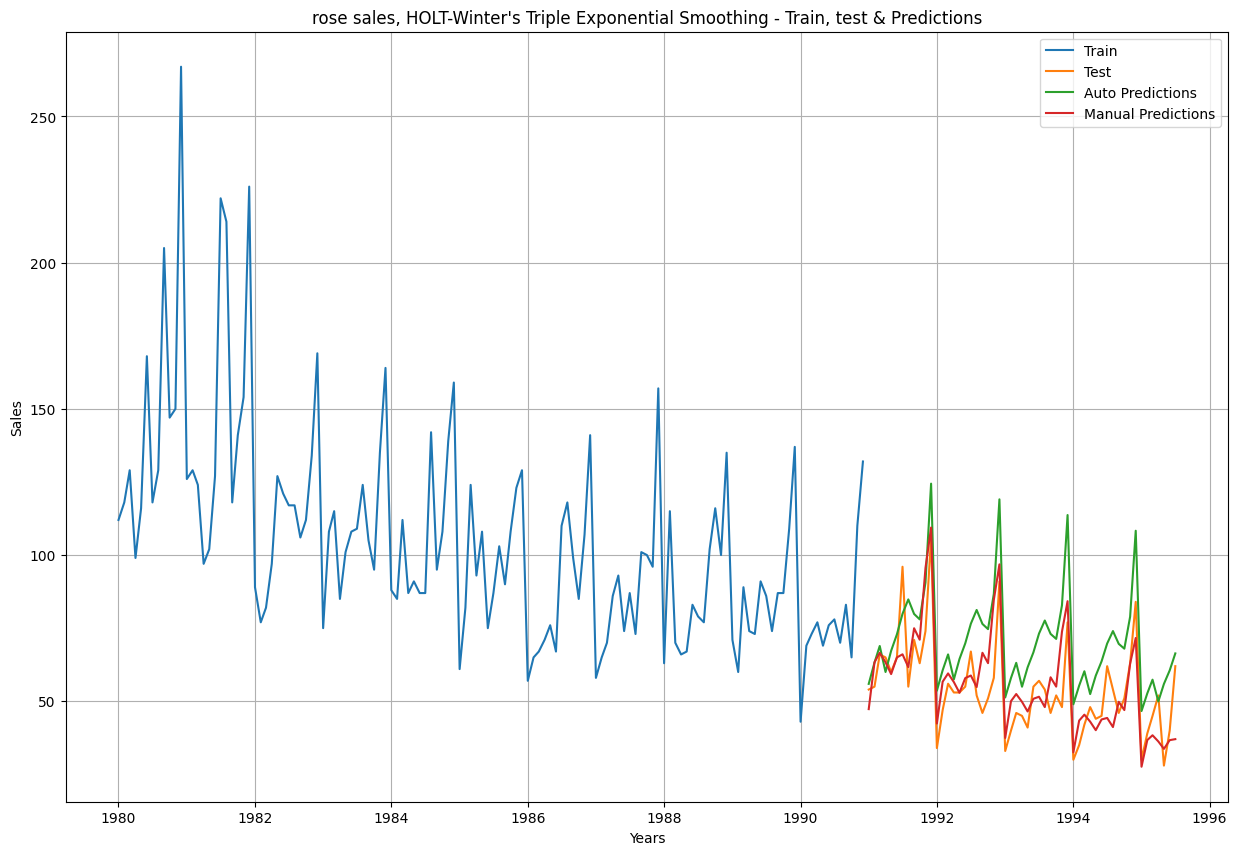

In [105]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(TES_rose1_train['Rose'], label = 'Train')
plt.plot(TES_rose1_test['Rose'], label = 'Test')

plt.plot(TES_rose1_test['Auto_Predictions'], label = 'Auto Predictions')
plt.plot(TES_rose1_test['Predictions', 0.3, 0.3, 0.4], label = 'Manual Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, HOLT-Winter\'s Triple Exponential Smoothing - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

In [106]:
##
## now lets find the root mean square error


rmse_TES_rose1_test = metrics.mean_squared_error(TES_rose1_test['Rose'], TES_rose1_test['Predictions', 0.3, 0.3, 0.4],
                                              squared = False).round(3)
print('Root mean square error for TES, where alpha is 0.3 and Beta is 0.3 and gamma is 0.4', rmse_TES_rose1_test)

Root mean square error for TES, where alpha is 0.3 and Beta is 0.3 and gamma is 0.4 10.565


In [107]:
##
## Results dataframe

Results_TES = pd.DataFrame({'Model': 'Triple_Exponential_Smoothing_Alpha_0.3_Beta_0.3_Gamma_0.4', 'Root Mean Square Error': [rmse_TES_rose1_test]})
Results_TES.head()

Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                  10.565

In [108]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_TES])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975

In [109]:
Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...                  18.661
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                  10.565

### Naive forecasting



In [110]:
##
##

Naive_rose1_train = rose1_train.copy()
Naive_rose1_test = rose1_test.copy()

In [111]:
##
##

Naive_rose1_test['Predictions'] = np.asarray(Naive_rose1_train['Rose'])[len(np.asarray(Naive_rose1_train['Rose'])) - 1]
Naive_rose1_test.head()

Rose  Predictions
YearMonth                    
1991-01-01  54.0        132.0
1991-02-01  55.0        132.0
1991-03-01  66.0        132.0
1991-04-01  65.0        132.0
1991-05-01  60.0        132.0

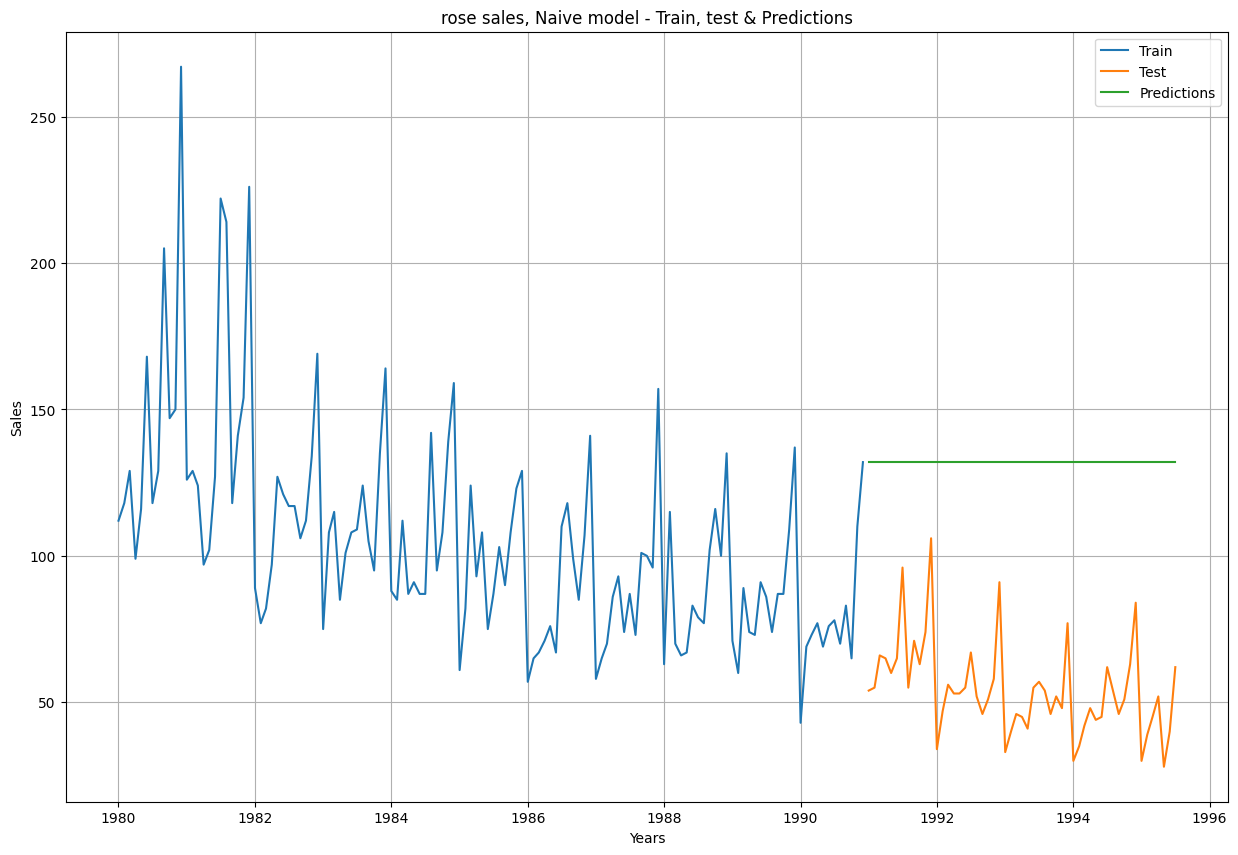

In [112]:
##
## now lets plot the train and test values

plt.figure(figsize = (15, 10))
plt.plot(Naive_rose1_train['Rose'], label = 'Train')
plt.plot(Naive_rose1_test['Rose'], label = 'Test')

plt.plot(Naive_rose1_test['Predictions'], label = 'Predictions')


plt.legend(loc = 'best')
plt.grid()
plt.title('rose sales, Naive model - Train, test & Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()


In [113]:
##
## now lets find the root mean square error


rmse_Naive_rose1_test = metrics.mean_squared_error(Naive_rose1_test['Rose'], Naive_rose1_test['Predictions'],
                                              squared = False).round(3)
print('Root mean square error for Naive Model', rmse_Naive_rose1_test)

Root mean square error for Naive Model 79.264


In [114]:
##
## Results dataframe

Results_Naive = pd.DataFrame({'Model': 'Naive_Model', 'Root Mean Square Error': [rmse_Naive_rose1_test]})
Results_Naive.head()

Model  Root Mean Square Error
0  Naive_Model                  79.264

In [115]:
##
## Lets add the values to the original results dataframe

Results = pd.concat([Results, Results_Naive])
Results.head(11)

Model  Root Mean Square Error
0                                  Linear Regression                  15.306
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
4               Moving_Average_Trailing_by_12_points                  15.375
5               Moving_Average_Trailing_by_15_points                  15.287
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975

### Sorted RMSE values

In [116]:
##
##

print('Sorted by RMSE values on the test dataframe', '\n',)
Results.sort_values(by = ['Root Mean Square Error'])

Sorted by RMSE values on the test dataframe 



Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....                  10.565
0                Moving_Average_Trailing_by_2_points                  11.611
1                Moving_Average_Trailing_by_4_points                  14.536
2                Moving_Average_Trailing_by_6_points                  14.578
3                Moving_Average_Trailing_by_9_points                  14.830
5               Moving_Average_Trailing_by_15_points                  15.287
0                                  Linear Regression                  15.306
4               Moving_Average_Trailing_by_12_points                  15.375
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...                  18.661
0            Simple_Exponentail_Smoothing_Alpha_0.12                  37.159
0             Simple_Exponentail_Smoothing_Alpha_0.3                  47.060
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13                  62.514
0                                        Naive_Model                  79.264
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3                 264.975

## 5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

- Null Hypothesis H0
: Time Series is non-stationary.

- Alternate Hypothesis Ha
: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .



In [117]:
##
## lets check for stationarity

## we have a package to test the stationarity of a dataset

from statsmodels.tsa.stattools import adfuller


In [118]:
##
##

def test_for_stationarity_plot(time_series, slider):

    ## lets set the rolling statistics
    rolling_mean = time_series.rolling(window = int(slider)).mean()
    rolling_std = time_series.rolling(window = int(slider)).std()

    ## lets plot
    original = plt.plot(time_series, color = 'red', label = 'Original')
    mean = plt.plot(rolling_mean, color = 'blue', label = 'Rolling Mean')
    std = plt.plot(rolling_std, color = 'green', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title('Original, Rolling Mean and Standard Deviation')
    plt.show(block = False)







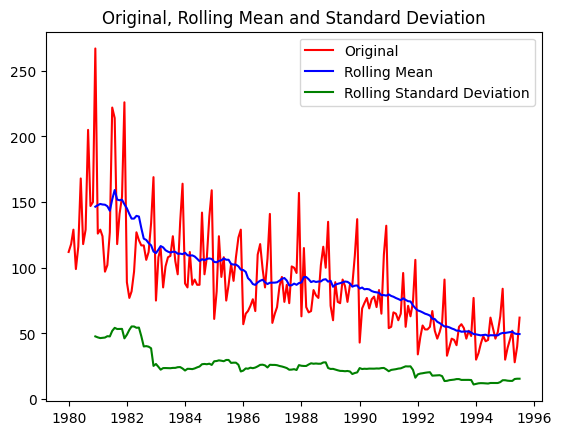

In [119]:
##
## Now lets call run the function for a window of 12

test_for_stationarity_plot(rose1['Rose'], '12')




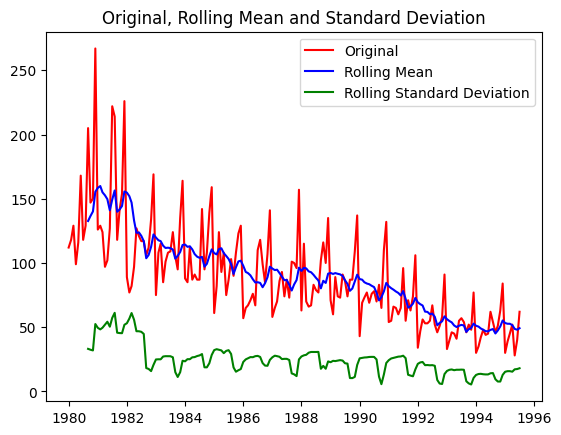

In [120]:
##
## Now lets call run the function for a window of 9

test_for_stationarity_plot(rose1['Rose'], '9')



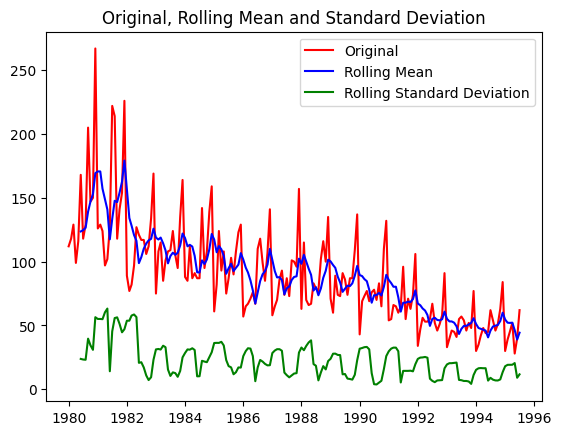

In [121]:
##
## Now lets call run the function for a window of 6

test_for_stationarity_plot(rose1['Rose'], '6')




In [122]:
##
##


def ADFuller_test_of_stationarity(time_series):
    ## perfomr the dicky-fuller test
    print('Results of ADFuller test - ')
    timeseries_test = adfuller(time_series, autolag = 'AIC')
    timeseries_output = pd.Series(timeseries_test[0:4], index = ['Test Statistic',
                                                                 'p-value',
                                                                 '# Lags used',
                                                                 'Number of Observations'])
    for key, value in timeseries_test[4].items():
        timeseries_output['Critical Value (%s)'%key] = value
    print(timeseries_output, '\n')



In [123]:
##
## now running the stationarity test to get the p-value


ADFuller_test_of_stationarity(rose1['Rose'])


## The p-value os greater than 0.05, hence we have failed to reject the null hypothesis *_*
## which means that the time series is non-stationary at 5% significance

## this mean we have find the order of difference where the time_series becomes stationary


Results of ADFuller test - 
Test Statistic             -1.890405
p-value                     0.336588
# Lags used                13.000000
Number of Observations    173.000000
Critical Value (1%)        -3.468726
Critical Value (5%)        -2.878396
Critical Value (10%)       -2.575756
dtype: float64 



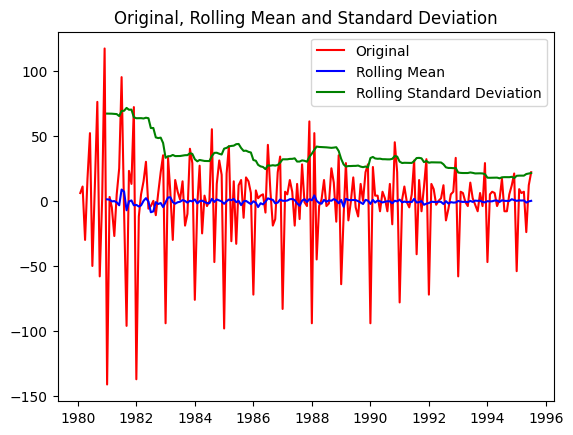

Results of ADFuller test - 
Test Statistic           -8.027962e+00
p-value                   1.993642e-12
# Lags used               1.200000e+01
Number of Observations    1.730000e+02
Critical Value (1%)      -3.468726e+00
Critical Value (5%)      -2.878396e+00
Critical Value (10%)     -2.575756e+00
dtype: float64 



In [124]:
##
## Lets us take a difference of order of 1 and again perform ad_fuller test

test_for_stationarity_plot(rose1['Rose'].diff().dropna(), '12')
ADFuller_test_of_stationarity(rose1['Rose'].diff().dropna())


## Now the time_series p-value has sunk below 0.05, which means we are successfull in rejecting the null hypothesis.
## At difference of order 1, the time_series dataframe is stationary


## 6)Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Checking if the train dataframe is stationary or not, ACF and PACF

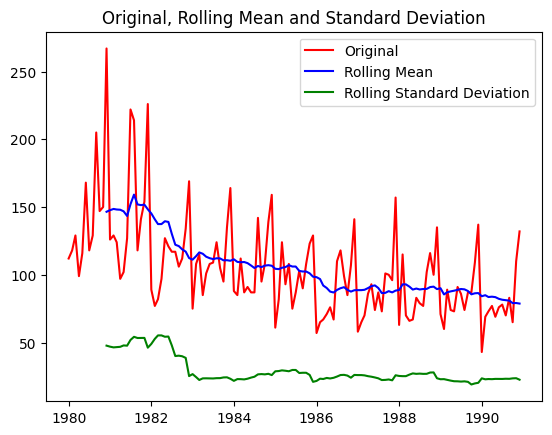

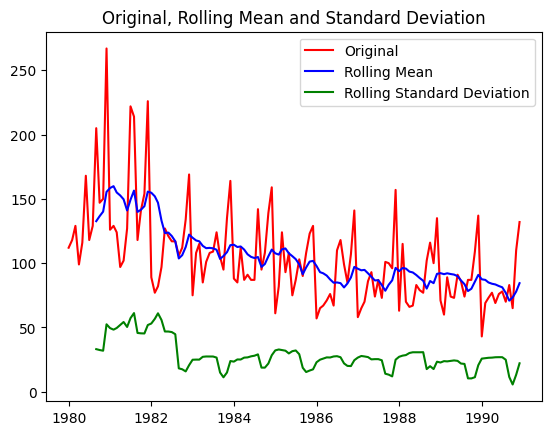

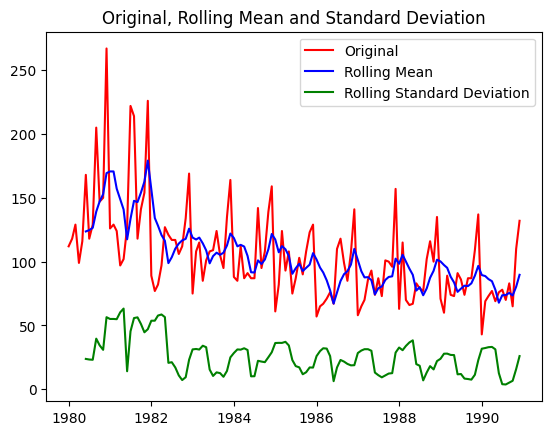

Results of ADFuller test - 
Test Statistic             -2.164250
p-value                     0.219476
# Lags used                13.000000
Number of Observations    118.000000
Critical Value (1%)        -3.487022
Critical Value (5%)        -2.886363
Critical Value (10%)       -2.580009
dtype: float64 



In [125]:
##
## checking the stationarity of the train dataframe

test_for_stationarity_plot(rose1_train['Rose'], '12')
test_for_stationarity_plot(rose1_train['Rose'], '9')
test_for_stationarity_plot(rose1_train['Rose'], '6')
ADFuller_test_of_stationarity(rose1_train['Rose'])


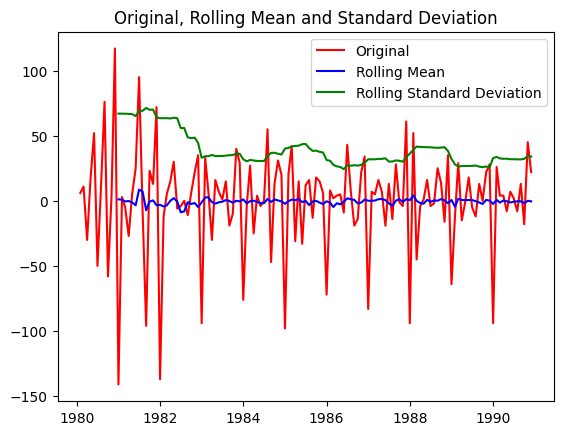

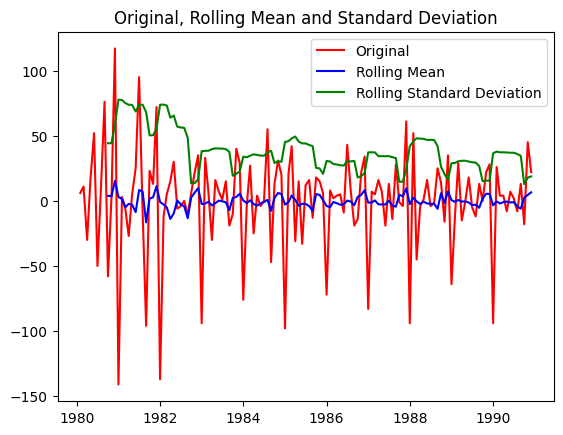

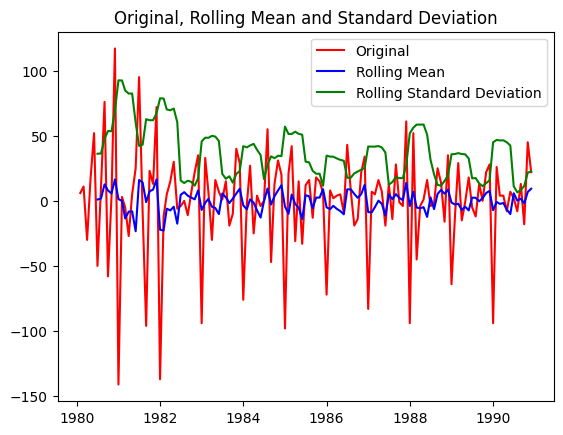

Results of ADFuller test - 
Test Statistic           -6.592372e+00
p-value                   7.061944e-09
# Lags used               1.200000e+01
Number of Observations    1.180000e+02
Critical Value (1%)      -3.487022e+00
Critical Value (5%)      -2.886363e+00
Critical Value (10%)     -2.580009e+00
dtype: float64 



In [126]:
##
## checking the stationarity of the train dataframe by taking differenciation of order 1

test_for_stationarity_plot(rose1_train['Rose'].diff().dropna(), '12')
test_for_stationarity_plot(rose1_train['Rose'].diff().dropna(), '9')
test_for_stationarity_plot(rose1_train['Rose'].diff().dropna(), '6')
ADFuller_test_of_stationarity(rose1_train['Rose'].diff().dropna())


## we can see that after taking a difference of order 1, stationarity has been achieved
## We are checking stationarity only for train dataframe, as ARIMA is built based on that.


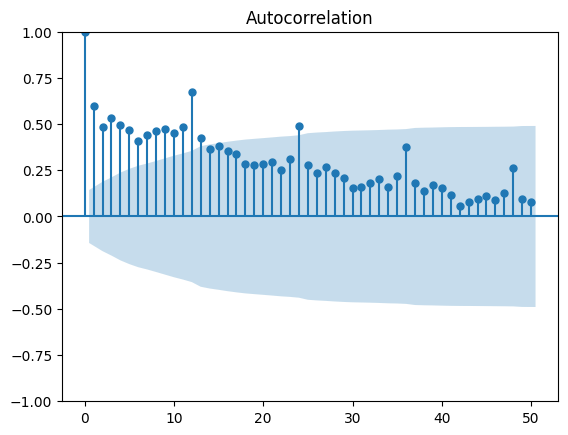

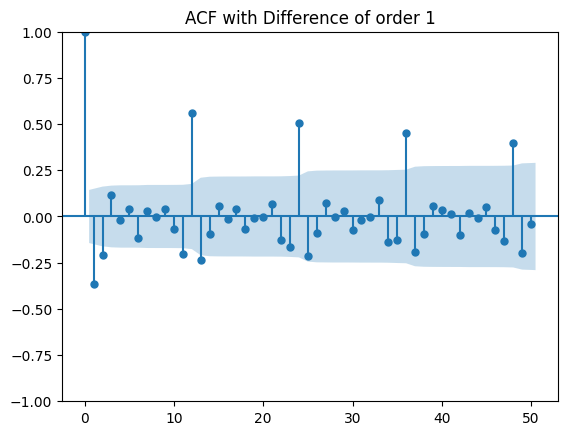

In [127]:
##
##

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(rose1['Rose'], lags = 50)
plot_acf(rose1['Rose'].diff().dropna(), lags = 50, title = 'ACF with Difference of order 1')
plt.show()

## Seasonality is definiately there in the dataframe


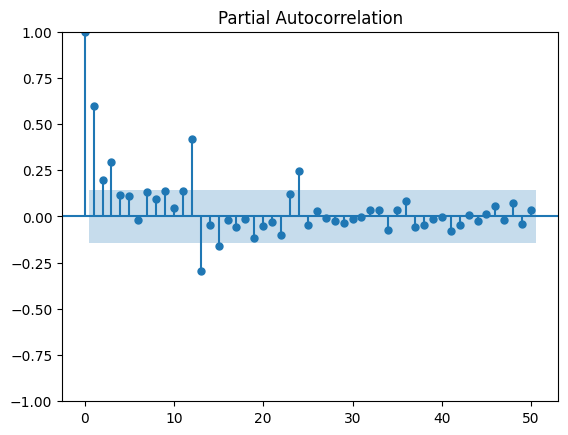

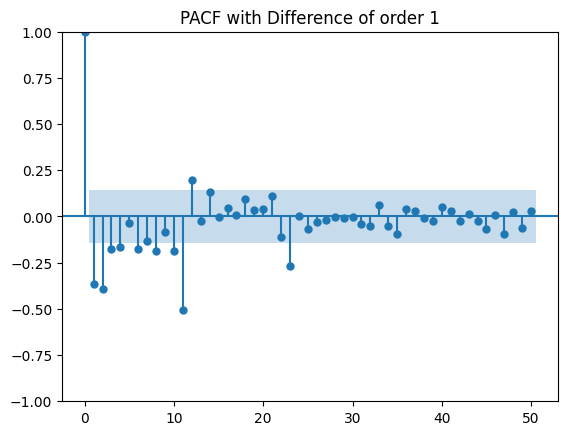

In [128]:
##
## pacf plot

plot_pacf(rose1['Rose'], lags = 50)
plot_pacf(rose1['Rose'].diff().dropna(), lags = 50, title = 'PACF with Difference of order 1')
plt.show()


## with the below plots, what we confirmed below seems to be a miss. seasonality does not seem to be *_*
## as clearly present
## but from the deocmposition we did at the start, we know there is seasonality with a value of 12



### Model: ARIMA

In [129]:
##
## The following loop helps us to get a combination of p and q, we are keeping d as 1 *_*
## since it took us a difference of order 1 to get the time series stationary


import itertools

p = q = range(0, 5)
d = range(1, 2)
pdq = list(itertools.product(p, d, q))

print('Some Parameter combinations - ')

for i in range(1, len(pdq)):
    print('Model: {}'.format(pdq[i]))



Some Parameter combinations - 
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [130]:
##
## lets create the hosting dataframe

arima_aic = pd.DataFrame(columns = ['Parameter', 'Akaike_Value'])
arima_aic

Empty DataFrame
Columns: [Parameter, Akaike_Value]
Index: []

In [131]:
##
## Now lets build the model based on the pdq variations we have

from statsmodels.tsa.arima.model import ARIMA


for parameter in pdq:
    arima_model = ARIMA(rose1_train['Rose'].values, order = parameter).fit()
    print('ARIMA{} - AIC : {}'.format(parameter, arima_model.aic))
    arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)



ARIMA(0, 1, 0) - AIC : 1333.1546729124348
ARIMA(0, 1, 1) - AIC : 1282.309831974832
ARIMA(0, 1, 2) - AIC : 1279.6715288535784


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(0, 1, 3) - AIC : 1280.545376173466
ARIMA(0, 1, 4) - AIC : 1281.676698214394
ARIMA(1, 1, 0) - AIC : 1317.350310538146


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Para

ARIMA(1, 1, 1) - AIC : 1280.5742295380046
ARIMA(1, 1, 2) - AIC : 1279.8707234231929


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(1, 1, 3) - AIC : 1281.8707223309984


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': p

ARIMA(1, 1, 4) - AIC : 1279.6052647265947
ARIMA(2, 1, 0) - AIC : 1298.6110341604945
ARIMA(2, 1, 1) - AIC : 1281.5078621868563


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(2, 1, 2) - AIC : 1281.870722226456


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

ARIMA(2, 1, 3) - AIC : 1274.6951271827177


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(2, 1, 4) - AIC : 1278.7698350738203
ARIMA(3, 1, 0) - AIC : 1297.481091727167


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(3, 1, 1) - AIC : 1282.4192776271927


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC : 1283.7207405977094


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary star

ARIMA(3, 1, 3) - AIC : 1278.6580044819445
ARIMA(3, 1, 4) - AIC : 1287.7190768883322
ARIMA(4, 1, 0) - AIC : 1296.326656900457


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


ARIMA(4, 1, 1) - AIC : 1283.7931715123073


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) - AIC : 1285.7182485614308


<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore

ARIMA(4, 1, 3) - AIC : 1278.4514168025203
ARIMA(4, 1, 4) - AIC : 1282.3390524269898


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-131-f0fbe3be0b20>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arima_aic = arima_aic.append({'Parameter': parameter, 'Akaike_Value': arima_model.aic}, ignore_index = True)


In [132]:
##
## lets sort the values

arima_aic.sort_values(by = 'Akaike_Value', ascending = True)


Parameter  Akaike_Value
13  (2, 1, 3)   1274.695127
23  (4, 1, 3)   1278.451417
18  (3, 1, 3)   1278.658004
14  (2, 1, 4)   1278.769835
9   (1, 1, 4)   1279.605265
2   (0, 1, 2)   1279.671529
7   (1, 1, 2)   1279.870723
3   (0, 1, 3)   1280.545376
6   (1, 1, 1)   1280.574230
11  (2, 1, 1)   1281.507862
4   (0, 1, 4)   1281.676698
12  (2, 1, 2)   1281.870722
8   (1, 1, 3)   1281.870722
1   (0, 1, 1)   1282.309832
24  (4, 1, 4)   1282.339052
16  (3, 1, 1)   1282.419278
17  (3, 1, 2)   1283.720741
21  (4, 1, 1)   1283.793172
22  (4, 1, 2)   1285.718249
19  (3, 1, 4)   1287.719077
20  (4, 1, 0)   1296.326657
15  (3, 1, 0)   1297.481092
10  (2, 1, 0)   1298.611034
5   (1, 1, 0)   1317.350311
0   (0, 1, 0)   1333.154673

In [133]:
##
## now let us run the model using the pdq values that we have


auto_arima = ARIMA(rose1_train['Rose'], order = (2, 1, 3), freq = 'MS')

results_auto_arima = auto_arima.fit()

print(results_auto_arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 10 Dec 2023   AIC                           1274.695
Time:                        04:00:18   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
##
## Prediction on the test dataframe using model built


predicted_auto_arima = results_auto_arima.forecast(steps = len(rose1_test['Rose']))



In [135]:
##
## Now that we have the predictions, lets find the RMSE


from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(rose1_test['Rose'], predicted_auto_arima, squared = False)


In [136]:
##
##

rmse

36.38586244647739

In [137]:
##
## Now lets add the values to the results dataframe that we have setup

arima_temp = pd.DataFrame({'Root Mean Square Error': [rmse],
                           'Model': 'ARIMA_with_p_2_d_1_q_3'})

Results = pd.concat([Results, arima_temp])

In [138]:
##
##

Results.head(20)

Model  Root Mean Square Error
0                                  Linear Regression               15.306000
0                Moving_Average_Trailing_by_2_points               11.611000
1                Moving_Average_Trailing_by_4_points               14.536000
2                Moving_Average_Trailing_by_6_points               14.578000
3                Moving_Average_Trailing_by_9_points               14.830000
4               Moving_Average_Trailing_by_12_points               15.375000
5               Moving_Average_Trailing_by_15_points               15.287000
0            Simple_Exponentail_Smoothing_Alpha_0.12               37.159000
0             Simple_Exponentail_Smoothing_Alpha_0.3               47.060000
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13               62.514000
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3              264.975000
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...               18.661000
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....               10.565000
0                                        Naive_Model               79.264000
0                             ARIMA_with_p_2_d_1_q_3               36.385862

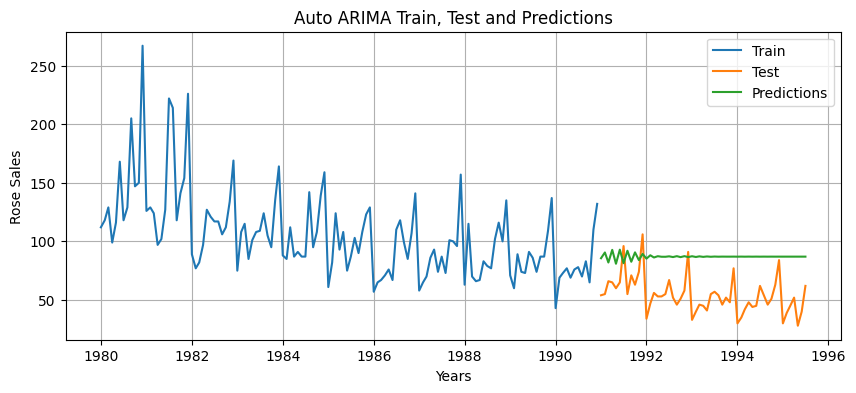

In [139]:
##
## Lets now plot the dataset

plt.figure(figsize = (10, 4))
plt.plot(rose1_train['Rose'], label = 'Train')
plt.plot(rose1_test['Rose'], label = 'Test')
plt.plot(predicted_auto_arima, label = 'Predictions')
plt.title("Auto ARIMA Train, Test and Predictions")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Rose Sales')
plt.legend(loc = 'best')
plt.show()

### Model: SARIMA


In [140]:
##
##

p = q = range(0, 5)
d = range(1, 2)
D = range(0, 2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]

print(' Some Parameter Combinations: ')

for i in range(1, len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))




 Some Parameter Combinations: 
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (0, 1, 4)(0, 0, 4, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 4)(0, 1, 4, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 4)(1, 0, 4, 12)
Model: (3, 1, 0)(1, 1, 0, 12)
Model: (3, 1, 1)(1, 1, 1, 12)
Model: (3, 1, 2)(1, 1, 2, 12)
Model: (3, 1, 3)(1, 1, 3, 12)
Model: (3, 1, 4)(1, 1, 4, 12)
Model: (4, 1, 0)(2, 0, 0, 12)
Model: (4, 1, 1)(2, 0, 1, 12)
Model: (4, 1, 2)(2, 0, 2, 12)
Model: (4, 1, 3)(2, 0, 3, 12)
Model: (4, 1, 4)(2, 0, 4, 12)


In [141]:
##
##

sarima_aic = pd.DataFrame(columns = ['Parameter', 'Seasonality', 'Akaike_Value'])
sarima_aic



Empty DataFrame
Columns: [Parameter, Seasonality, Akaike_Value]
Index: []

In [142]:
##
##


import statsmodels.api as sm


for parameter in pdq:
    for seasonality in model_pdq:
        sarima_model = sm.tsa.statespace.SARIMAX(rose1_train['Rose'].values,
                                                order = parameter,
                                                seasonal_order = seasonality,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)

        results_sarima = sarima_model.fit(maxiter = 1000)
        print('SARIMA{}X{} - AIC: {}'.format(parameter, seasonality, results_sarima.aic))
        sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)



SARIMA(0, 1, 0)X(0, 0, 0, 12) - AIC: 1323.9657875279158
SARIMA(0, 1, 0)X(0, 0, 1, 12) - AIC: 1145.4230827207298


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 0, 2, 12) - AIC: 976.4375296380895


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(0, 0, 3, 12) - AIC: 3537.579168905919
SARIMA(0, 1, 0)X(0, 0, 4, 12) - AIC: 763.9966104781599
SARIMA(0, 1, 0)X(0, 1, 0, 12) - AIC: 1171.2013438278946
SARIMA(0, 1, 0)X(0, 1, 1, 12) - AIC: 965.5057301641692


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 1, 2, 12) - AIC: 845.8687014776137


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(0, 1, 3, 12) - AIC: 3188.0041354097198


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(0, 1, 4, 12) - AIC: 634.6998047373161
SARIMA(0, 1, 0)X(1, 0, 0, 12) - AIC: 1139.921738995602


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 0, 1, 12) - AIC: 1116.0207869386172


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 0, 2, 12) - AIC: 969.691363575225


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(1, 0, 3, 12) - AIC: 4554.32909051064
SARIMA(0, 1, 0)X(1, 0, 4, 12) - AIC: 737.7650770870948
SARIMA(0, 1, 0)X(1, 1, 0, 12) - AIC: 982.3269589658804


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 1, 1, 12) - AIC: 975.3375383601606


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 1, 2, 12) - AIC: 847.7332182654541


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(1, 1, 3, 12) - AIC: 2406.184475428896


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(1, 1, 4, 12) - AIC: 632.3788032364229
SARIMA(0, 1, 0)X(2, 0, 0, 12) - AIC: 960.8812220353041


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 0, 1, 12) - AIC: 962.8794540697556


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 0, 2, 12) - AIC: 955.5735408945757


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)X(2, 0, 3, 12) - AIC: 4397.822817992214


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(2, 0, 4, 12) - AIC: 737.7193836950074


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 1, 0, 12) - AIC: 858.5132698374409


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 1, 1, 12) - AIC: 853.3390729150939


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(2, 1, 2, 12) - AIC: 842.6282244225843


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(2, 1, 3, 12) - AIC: 4264.84102142937
SARIMA(0, 1, 0)X(2, 1, 4, 12) - AIC: 628.1273232171887


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 0, 0, 12) - AIC: 850.7535403931095


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 0, 1, 12) - AIC: 851.7482702748039


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 0, 2, 12) - AIC: 850.53041361288


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 0)X(3, 0, 3, 12) - AIC: 3467.855628476979
SARIMA(0, 1, 0)X(3, 0, 4, 12) - AIC: 737.2233327487511
SARIMA(0, 1, 0)X(3, 1, 0, 12) - AIC: 752.3958122739799


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 1, 1, 12) - AIC: 748.3165246489234


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 1, 2, 12) - AIC: 748.9721713379025


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(3, 1, 3, 12) - AIC: 4724.842825680873


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(3, 1, 4, 12) - AIC: 629.8035480711955


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 0, 12) - AIC: 748.847472538606


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 1, 12) - AIC: 748.3817066901752


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 0, 2, 12) - AIC: 748.5912491654769


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)X(4, 0, 3, 12) - AIC: 3030.742468863504


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(4, 0, 4, 12) - AIC: 739.2186480113264


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 0, 12) - AIC: 642.2929811072656


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 1, 12) - AIC: 643.6597614091808


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 0)X(4, 1, 2, 12) - AIC: 645.6301972365613


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)X(4, 1, 3, 12) - AIC: 2617.66867426419


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)X(4, 1, 4, 12) - AIC: 631.7129639064117
SARIMA(0, 1, 1)X(0, 0, 0, 12) - AIC: 1263.5369097383966


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 0, 1, 12) - AIC: 1098.5554825918337


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 0, 2, 12) - AIC: 923.631404938385


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(0, 0, 3, 12) - AIC: 3915.4769311640416
SARIMA(0, 1, 1)X(0, 0, 4, 12) - AIC: 713.985949075116
SARIMA(0, 1, 1)X(0, 1, 0, 12) - AIC: 1113.766313356172


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 1, 1, 12) - AIC: 915.0730606717733


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(0, 1, 2, 12) - AIC: 790.9032809266818


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(0, 1, 3, 12) - AIC: 4164.745188656254


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(0, 1, 4, 12) - AIC: 587.5366224877727
SARIMA(0, 1, 1)X(1, 0, 0, 12) - AIC: 1095.793632491823


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 0, 1, 12) - AIC: 1054.7434330946953


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 0, 2, 12) - AIC: 918.8573483297299


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(1, 0, 3, 12) - AIC: 3917.4099549077478
SARIMA(0, 1, 1)X(1, 0, 4, 12) - AIC: 687.2905472436738


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 0, 12) - AIC: 944.2456655531192


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 1, 12) - AIC: 929.3362488520133


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(1, 1, 2, 12) - AIC: 792.7161670323147


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(1, 1, 3, 12) - AIC: 1702.419263870727
SARIMA(0, 1, 1)X(1, 1, 4, 12) - AIC: 584.449074524434


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 0, 12) - AIC: 914.5982866535833


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 1, 12) - AIC: 915.333243046168


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 0, 2, 12) - AIC: 901.1988272651953


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 1)X(2, 0, 3, 12) - AIC: 3887.5888930228098
SARIMA(0, 1, 1)X(2, 0, 4, 12) - AIC: 685.9304573346589


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 0, 12) - AIC: 810.3194350158656


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 1, 12) - AIC: 804.1555759467078


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 2, 12) - AIC: 782.153871539348


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(2, 1, 3, 12) - AIC: 1546.8923440241792


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(2, 1, 4, 12) - AIC: 578.9181732849061


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 0, 12) - AIC: 798.588976481104


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 1, 12) - AIC: 800.4844931540345


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 0, 2, 12) - AIC: 801.0595269469408


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(3, 0, 3, 12) - AIC: 3860.067599059419


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(3, 0, 4, 12) - AIC: 686.4447055102667


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 0, 12) - AIC: 708.0834237440222


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 1, 12) - AIC: 699.7496879098333


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(3, 1, 2, 12) - AIC: 702.8383486370044


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(3, 1, 3, 12) - AIC: 2391.1842302375107


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(3, 1, 4, 12) - AIC: 580.6770341695658


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 0, 12) - AIC: 703.2867140514401


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 1, 12) - AIC: 701.5547220265682


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 0, 2, 12) - AIC: 701.3315550558032


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(4, 0, 3, 12) - AIC: 3190.2849270059223


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(4, 0, 4, 12) - AIC: 687.478624531216


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 0, 12) - AIC: 607.1294889049221


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 1, 12) - AIC: 606.3920460559391


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 1)X(4, 1, 2, 12) - AIC: 603.8267200162368


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)X(4, 1, 3, 12) - AIC: 2566.404920196539


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 1)X(4, 1, 4, 12) - AIC: 580.2326856934886
SARIMA(0, 1, 2)X(0, 0, 0, 12) - AIC: 1251.6675430541054


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 0, 1, 12) - AIC: 1083.4866975264943


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 0, 2, 12) - AIC: 913.4938486617706


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(0, 0, 3, 12) - AIC: 2850.320670775925
SARIMA(0, 1, 2)X(0, 0, 4, 12) - AIC: 707.2564525582898


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 0, 12) - AIC: 1098.6598024286616


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 1, 12) - AIC: 904.5003488472335


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 2, 12) - AIC: 784.0140955703762


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(0, 1, 3, 12) - AIC: 94.07565057898837


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(0, 1, 4, 12) - AIC: 582.4263562555349
SARIMA(0, 1, 2)X(1, 0, 0, 12) - AIC: 1088.833284341428


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 1, 12) - AIC: 1045.5400933510634


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 0, 2, 12) - AIC: 904.8310913555999


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(1, 0, 3, 12) - AIC: 2515.8444098414825


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(1, 0, 4, 12) - AIC: 681.5125471365498


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 0, 12) - AIC: 941.5256923362692


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 1, 12) - AIC: 915.2731134090596


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 2, 12) - AIC: 785.8237144292616


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(1, 1, 3, 12) - AIC: 2276.9278095265095


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(1, 1, 4, 12) - AIC: 578.597238867451


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 0, 12) - AIC: 913.0105912257989


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 1, 12) - AIC: 914.1707545018613


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 0, 2, 12) - AIC: 887.9375085678423


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(2, 0, 3, 12) - AIC: 2566.153705086759
SARIMA(0, 1, 2)X(2, 0, 4, 12) - AIC: 680.7648221732951


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 0, 12) - AIC: 811.5489438178255


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 1, 12) - AIC: 805.115848872975


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(2, 1, 2, 12) - AIC: 774.9691197769987


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(2, 1, 3, 12) - AIC: 3572.7948340770517


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(2, 1, 4, 12) - AIC: 572.7873675123564


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 0, 12) - AIC: 800.1020189374697


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 1, 12) - AIC: 801.9941080533306


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 0, 2, 12) - AIC: 802.520652834362


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 2)X(3, 0, 3, 12) - AIC: 2257.9976293926097
SARIMA(0, 1, 2)X(3, 0, 4, 12) - AIC: 680.5976795306144


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 0, 12) - AIC: 709.6122118477363


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 1, 12) - AIC: 701.7009886979066


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(3, 1, 2, 12) - AIC: 703.394702816109


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(3, 1, 3, 12) - AIC: 2245.4189046139445


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(3, 1, 4, 12) - AIC: 574.6102796445336


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 0, 12) - AIC: 704.829824921826


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 1, 12) - AIC: 703.4973133295838


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 0, 2, 12) - AIC: 703.2885802826654


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(4, 0, 3, 12) - AIC: 2251.856379923863


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(4, 0, 4, 12) - AIC: 681.1566088150231


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 0, 12) - AIC: 609.0055273867536


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 1, 12) - AIC: 608.3621442888299


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 2)X(4, 1, 2, 12) - AIC: 605.7696857691202


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)X(4, 1, 3, 12) - AIC: 3047.920259441721


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 2)X(4, 1, 4, 12) - AIC: 574.4368564025319
SARIMA(0, 1, 3)X(0, 0, 0, 12) - AIC: 1243.9501216739145


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 0, 1, 12) - AIC: 1076.763264608386


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 0, 2, 12) - AIC: 905.6926533380739


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(0, 0, 3, 12) - AIC: 3915.436503583022


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(0, 0, 4, 12) - AIC: 701.9582921357178


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 0, 12) - AIC: 1088.3764710136443


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 1, 12) - AIC: 897.1317873892933


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(0, 1, 2, 12) - AIC: 778.4427567861429


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(0, 1, 3, 12) - AIC: 14.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(0, 1, 4, 12) - AIC: 576.2379789840634
SARIMA(0, 1, 3)X(1, 0, 0, 12) - AIC: 1089.2051361212302

<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 0, 1, 12) - AIC: 1034.8411212937144


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 0, 2, 12) - AIC: 896.8362523340321


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 3)X(1, 0, 3, 12) - AIC: 3850.4880937827556
SARIMA(0, 1, 3)X(1, 0, 4, 12) - AIC: 675.9164330216657


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 0, 12) - AIC: 943.5043088714341


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 1, 12) - AIC: 904.9319970114637


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(1, 1, 2, 12) - AIC: 780.2386079740693


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(1, 1, 3, 12) - AIC: 1758.6080576042182


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(1, 1, 4, 12) - AIC: 573.8314199205723


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 0, 12) - AIC: 914.9477108987086


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 1, 12) - AIC: 916.0630996907732


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 0, 2, 12) - AIC: 880.550978824887


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 3)X(2, 0, 3, 12) - AIC: 3620.5646694331112
SARIMA(0, 1, 3)X(2, 0, 4, 12) - AIC: 675.3610274716384


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 0, 12) - AIC: 813.4051893208974


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 1, 12) - AIC: 806.4667725240857


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(2, 1, 2, 12) - AIC: 767.2243746168948


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(2, 1, 3, 12) - AIC: 1471.1273209669962


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(2, 1, 4, 12) - AIC: 568.9910865348422


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 0, 12) - AIC: 802.0987124752912


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 1, 12) - AIC: 803.9928772335343


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 0, 2, 12) - AIC: 804.515072039203


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 3)X(3, 0, 3, 12) - AIC: 3839.9066376474098
SARIMA(0, 1, 3)X(3, 0, 4, 12) - AIC: 676.0153335454182


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 0, 12) - AIC: 711.721830091208


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 1, 12) - AIC: 703.6693182608201


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(3, 1, 2, 12) - AIC: 705.0326323019763


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(3, 1, 3, 12) - AIC: 2301.5940887363313


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(3, 1, 4, 12) - AIC: 570.9581925743843


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 0, 12) - AIC: 706.7844727862472


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 1, 12) - AIC: 705.4956443013302


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 0, 2, 12) - AIC: 705.2607188765062


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(4, 0, 3, 12) - AIC: 2682.772113414452


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(4, 0, 4, 12) - AIC: 676.579044562096


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 0, 12) - AIC: 611.001940980992


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 1, 12) - AIC: 609.8314834722402


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 3)X(4, 1, 2, 12) - AIC: 608.977484795709


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)X(4, 1, 3, 12) - AIC: 2687.085367327968


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 3)X(4, 1, 4, 12) - AIC: 571.406855084754
SARIMA(0, 1, 4)X(0, 0, 0, 12) - AIC: 1233.955759473207


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 0, 1, 12) - AIC: 1067.8229462947745


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 0, 2, 12) - AIC: 900.8881332077356


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(0, 0, 3, 12) - AIC: 4027.116924833412
SARIMA(0, 1, 4)X(0, 0, 4, 12) - AIC: 696.3779090910944


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 0, 12) - AIC: 1080.1314936223082


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 1, 12) - AIC: 888.6905350290236


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(0, 1, 2, 12) - AIC: 770.4038241362149


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(0, 1, 3, 12) - AIC: 16.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(0, 1, 4, 12) - AIC: 569.1345311875768


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 0, 12) - AIC: 1090.8499828267431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 1, 12) - AIC: 1028.5605704501204


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 0, 2, 12) - AIC: 891.761264960937


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(0, 1, 4)X(1, 0, 3, 12) - AIC: 5342.385891282432
SARIMA(0, 1, 4)X(1, 0, 4, 12) - AIC: 669.8987982111356


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 0, 12) - AIC: 942.999316682377


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 1, 12) - AIC: 896.7101770834258


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 2, 12) - AIC: 772.2128662833578


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(1, 1, 3, 12) - AIC: 1557.807341835402


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(1, 1, 4, 12) - AIC: 567.185959544487


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 0, 12) - AIC: 916.4295381256658


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 1, 12) - AIC: 917.4769919245117


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 0, 2, 12) - AIC: 874.1158048480705


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(2, 0, 3, 12) - AIC: 2276.3580744669243


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(2, 0, 4, 12) - AIC: 670.0406677017415


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 0, 12) - AIC: 814.5537658983488


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 1, 12) - AIC: 807.2926343996901


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(2, 1, 2, 12) - AIC: 760.6355269075838


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(2, 1, 3, 12) - AIC: 2489.332526992859


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(2, 1, 4, 12) - AIC: 562.7291767205514


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 0, 12) - AIC: 803.4505960586547


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 1, 12) - AIC: 805.2422759156775


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 0, 2, 12) - AIC: 805.0276972671957


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(3, 0, 3, 12) - AIC: 3501.5647738205707


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(3, 0, 4, 12) - AIC: 670.8004309784393


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 0, 12) - AIC: 712.9157776583716


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 1, 12) - AIC: 705.3760489073874


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(3, 1, 2, 12) - AIC: 706.918494162055


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(3, 1, 3, 12) - AIC: 2033.1221384843168


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(3, 1, 4, 12) - AIC: 564.513777232425


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 0, 12) - AIC: 708.1048497615396


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 1, 12) - AIC: 706.8569198099736


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 2, 12) - AIC: 706.6769199998561


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 0, 3, 12) - AIC: 3204.46859423143


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(4, 0, 4, 12) - AIC: 671.8600283097788


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 0, 12) - AIC: 612.9784325629163


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 1, 12) - AIC: 611.6575521785148


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(0, 1, 4)X(4, 1, 2, 12) - AIC: 609.7151170800868


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 4)X(4, 1, 3, 12) - AIC: 2715.8421241361293


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 4)X(4, 1, 4, 12) - AIC: 563.8492524104927
SARIMA(1, 1, 0)X(0, 0, 0, 12) - AIC: 1308.161871082466
SARIMA(1, 1, 0)X(0, 0, 1, 12) - AIC: 1135.2955447585693


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 0, 2, 12) - AIC: 963.9405391257691


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(0, 0, 3, 12) - AIC: 3743.5873078738964
SARIMA(1, 1, 0)X(0, 0, 4, 12) - AIC: 749.0899764513082
SARIMA(1, 1, 0)X(0, 1, 0, 12) - AIC: 1164.5103013842013


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 1, 1, 12) - AIC: 953.8813887547168


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 1, 2, 12) - AIC: 828.8398832821322


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(0, 1, 3, 12) - AIC: 3145.5394119663224


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(0, 1, 4, 12) - AIC: 620.3819000853139
SARIMA(1, 1, 0)X(1, 0, 0, 12) - AIC: 1124.886078680456


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 0, 1, 12) - AIC: 1105.4080055025265


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 0, 2, 12) - AIC: 958.500197294866


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(1, 0, 3, 12) - AIC: 3753.2355092713888
SARIMA(1, 1, 0)X(1, 0, 4, 12) - AIC: 719.6250128453669
SARIMA(1, 1, 0)X(1, 1, 0, 12) - AIC: 962.9698535736214


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 1, 1, 12) - AIC: 964.8516934823622


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(1, 1, 2, 12) - AIC: 830.3075804967035


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(1, 1, 3, 12) - AIC: 1830.568934155583
SARIMA(1, 1, 0)X(1, 1, 4, 12) - AIC: 618.6088931295578
SARIMA(1, 1, 0)X(2, 0, 0, 12) - AIC: 939.0984778663985


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 0, 1, 12) - AIC: 940.9087133661069


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 0, 2, 12) - AIC: 942.2973103070971


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(2, 0, 3, 12) - AIC: 3722.379630910266
SARIMA(1, 1, 0)X(2, 0, 4, 12) - AIC: 719.7060772832292


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 0, 12) - AIC: 826.9995808091105


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 1, 12) - AIC: 823.8261102780492


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(2, 1, 2, 12) - AIC: 825.043725310517


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(2, 1, 3, 12) - AIC: 1688.9929036733683


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(2, 1, 4, 12) - AIC: 608.2969415763364


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 0, 12) - AIC: 819.3931032272592


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 1, 12) - AIC: 821.1501371573515


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 0, 2, 12) - AIC: 819.1305086841526


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 0)X(3, 0, 3, 12) - AIC: 3685.3785363617494
SARIMA(1, 1, 0)X(3, 0, 4, 12) - AIC: 716.695098845055


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 0, 12) - AIC: 727.3669084126873


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 1, 12) - AIC: 728.9034690438822


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 2, 12) - AIC: 721.9926158532238


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(3, 1, 3, 12) - AIC: 2530.2690226783807


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(3, 1, 4, 12) - AIC: 610.2217943640173


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 0, 12) - AIC: 722.8829882612071


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 1, 12) - AIC: 719.8954160827595


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 0, 2, 12) - AIC: 720.3004359647807


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(4, 0, 3, 12) - AIC: 2971.65315176838


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(4, 0, 4, 12) - AIC: 718.2015278200757


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 0, 12) - AIC: 618.0184599845488


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 1, 12) - AIC: 618.7590792977804


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 0)X(4, 1, 2, 12) - AIC: 620.7412164447247


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)X(4, 1, 3, 12) - AIC: 2574.2965184495697


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 0)X(4, 1, 4, 12) - AIC: 612.2213018104172
SARIMA(1, 1, 1)X(0, 0, 0, 12) - AIC: 1262.1840064255503


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 1, 12) - AIC: 1094.3172708640795


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 2, 12) - AIC: 923.0862224063874


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 0, 3, 12) - AIC: 4021.1038985283726


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(0, 0, 4, 12) - AIC: 715.3374505796255
SARIMA(1, 1, 1)X(0, 1, 0, 12) - AIC: 1110.620946440067


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 1, 1, 12) - AIC: 914.0453844988174


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 1, 2, 12) - AIC: 792.3411370856628


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(0, 1, 3, 12) - AIC: 12.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(0, 1, 4, 12) - AIC: 589.4626969051463


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 0, 12) - AIC: 1083.3937965031748


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 1, 12) - AIC: 1054.7180547135254


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 2, 12) - AIC: 916.3549428506896


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 0, 3, 12) - AIC: 4022.998900673626


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(1, 0, 4, 12) - AIC: 689.1226462451643


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 0, 12) - AIC: 933.2974216823686


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 1, 12) - AIC: 927.29206382004


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(1, 1, 2, 12) - AIC: 794.1929706683437


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(1, 1, 3, 12) - AIC: 2411.2263862185273


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(1, 1, 4, 12) - AIC: 586.3764766989138


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 0, 12) - AIC: 905.9249060840378


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 1, 12) - AIC: 907.2972867470819


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 2, 12) - AIC: 900.6725795936852


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 0, 3, 12) - AIC: 3993.185493350659


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(2, 0, 4, 12) - AIC: 687.7078433525519


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 0, 12) - AIC: 799.9474258320236


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 1, 12) - AIC: 791.9065436342268


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(2, 1, 2, 12) - AIC: 783.8990949344563


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(2, 1, 3, 12) - AIC: 1761.5888325655499


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(2, 1, 4, 12) - AIC: 580.9000273330887


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 0, 12) - AIC: 789.2360439384573


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 1, 12) - AIC: 790.9603447847019


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 2, 12) - AIC: 790.8113850269432


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 0, 3, 12) - AIC: 3965.6935676057956


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(3, 0, 4, 12) - AIC: 688.1119008965769


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 0, 12) - AIC: 702.1669809964585


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 1, 12) - AIC: 693.9370826367465


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(3, 1, 2, 12) - AIC: 695.0475057677827


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(3, 1, 3, 12) - AIC: 2391.858397366992


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(3, 1, 4, 12) - AIC: 582.6095490962074


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 0, 12) - AIC: 696.9134745335153


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 1, 12) - AIC: 694.6873850283511


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 0, 2, 12) - AIC: 695.8952847039563


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(4, 0, 3, 12) - AIC: 3093.8361337870847


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(4, 0, 4, 12) - AIC: 689.3975134091298


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 0, 12) - AIC: 600.6677757391694


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 1, 12) - AIC: 600.9614067605145


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 1)X(4, 1, 2, 12) - AIC: 597.8833522805985


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)X(4, 1, 3, 12) - AIC: 1804.9843349648158


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 1)X(4, 1, 4, 12) - AIC: 582.6622393012022
SARIMA(1, 1, 2)X(0, 0, 0, 12) - AIC: 1251.949504070617


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 0, 1, 12) - AIC: 1085.4861928101097


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 0, 2, 12) - AIC: 915.4938402541679


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 2)X(0, 0, 3, 12) - AIC: 3906.3448784067805
SARIMA(1, 1, 2)X(0, 0, 4, 12) - AIC: 712.0925757269407


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 0, 12) - AIC: 1096.3571024733565


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 1, 12) - AIC: 906.4966907625508


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 2, 12) - AIC: 785.9832738856865


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(0, 1, 3, 12) - AIC: 7667.120269161571


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(0, 1, 4, 12) - AIC: 582.2964600535288


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 0, 12) - AIC: 1090.7760922460045


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 1, 12) - AIC: 1042.618321201544


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 2, 12) - AIC: 906.7318501450825


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 0, 3, 12) - AIC: 3981.8913856126137


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(1, 0, 4, 12) - AIC: 683.505540601951


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 0, 12) - AIC: 934.8870392439279


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 1, 12) - AIC: 917.2527818406978


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(1, 1, 2, 12) - AIC: 787.7843970229038


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(1, 1, 3, 12) - AIC: 1474.7018834996172


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(1, 1, 4, 12) - AIC: 578.8424757685184


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 0, 12) - AIC: 906.1690196871572


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 1, 12) - AIC: 907.4597829767667


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 2, 12) - AIC: 896.6869288410242


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 0, 3, 12) - AIC: 3952.4200579382723


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(2, 0, 4, 12) - AIC: 682.7643423772595


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 0, 12) - AIC: 801.9382052144576


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 1, 12) - AIC: 791.9171141822849


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(2, 1, 2, 12) - AIC: 776.9401077778773


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(2, 1, 3, 12) - AIC: 2935.8863596108486


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(2, 1, 4, 12) - AIC: 574.4965164427748


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 0, 12) - AIC: 791.0073801465002


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 1, 12) - AIC: 792.6312807596136


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 2, 12) - AIC: 792.1390257228884


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 0, 3, 12) - AIC: 3925.245249674534


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(3, 0, 4, 12) - AIC: 682.5809792718044


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 0, 12) - AIC: 703.8075522578146


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 1, 12) - AIC: 696.108486638836


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(3, 1, 2, 12) - AIC: 697.0470985273915


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(3, 1, 3, 12) - AIC: 3029.2938680014436


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(3, 1, 4, 12) - AIC: 576.3224223202017


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 0, 12) - AIC: 698.7703963052102


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 1, 12) - AIC: 696.537368668703


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 2, 12) - AIC: 697.8846047794618


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 0, 3, 12) - AIC: 3247.4147938432443


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(4, 0, 4, 12) - AIC: 683.1296755849962


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 0, 12) - AIC: 600.4625339838035


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 1, 12) - AIC: 601.2440191818163


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 2)X(4, 1, 2, 12) - AIC: 599.866905676301


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)X(4, 1, 3, 12) - AIC: 2066.6841554209354


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 2)X(4, 1, 4, 12) - AIC: 574.3486980870546
SARIMA(1, 1, 3)X(0, 0, 0, 12) - AIC: 1245.5463125316153


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 0, 1, 12) - AIC: 1072.9849786694285


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 0, 2, 12) - AIC: 907.4130105118861


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(0, 0, 3, 12) - AIC: 3180.9368411191385


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(0, 0, 4, 12) - AIC: 702.642143165718


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 0, 12) - AIC: 1088.0914860032788


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 1, 12) - AIC: 895.9867971329056


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 2, 12) - AIC: 780.3059561889759


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(0, 1, 3, 12) - AIC: 2558.3690403985747


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(0, 1, 4, 12) - AIC: 576.6963024094574


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 0, 12) - AIC: 1082.3281487676181


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 1, 12) - AIC: 1036.195093061794


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 0, 2, 12) - AIC: 897.5232308928448


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(1, 0, 3, 12) - AIC: 3806.933293515192
SARIMA(1, 1, 3)X(1, 0, 4, 12) - AIC: 677.5543035181876


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 0, 12) - AIC: 936.6664092075546


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 1, 12) - AIC: 906.7653660391387


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 2, 12) - AIC: 782.1027704591781


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(1, 1, 3, 12) - AIC: 1543.465514908792


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(1, 1, 4, 12) - AIC: 572.4973393778421


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 0, 12) - AIC: 908.2687694797019


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 1, 12) - AIC: 909.7955658771876


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 0, 2, 12) - AIC: 880.2886674031043


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(2, 0, 3, 12) - AIC: 3117.3363007953353


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(2, 0, 4, 12) - AIC: 674.9582396570302


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 0, 12) - AIC: 803.6616207208244


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 1, 12) - AIC: 793.9162132986202


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(2, 1, 2, 12) - AIC: 767.475354274955


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(2, 1, 3, 12) - AIC: 1912.4921505135171


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(2, 1, 4, 12) - AIC: 566.8606580916818


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 0, 12) - AIC: 792.9903136318027


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 1, 12) - AIC: 794.6310160810377


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 0, 2, 12) - AIC: 794.0467933004552


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 3)X(3, 0, 3, 12) - AIC: 3753.6948205320873
SARIMA(1, 1, 3)X(3, 0, 4, 12) - AIC: 674.8272006372384


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 0, 12) - AIC: 702.9343088450084


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 1, 12) - AIC: 696.4191669516355


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(3, 1, 2, 12) - AIC: 698.086633676424


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(3, 1, 3, 12) - AIC: 2747.23677163374


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(3, 1, 4, 12) - AIC: 568.7517833833725


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 0, 12) - AIC: 700.6014490952059


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 1, 12) - AIC: 698.5369237119431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 0, 2, 12) - AIC: 699.8629413886824


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(4, 0, 3, 12) - AIC: 3231.467237603432


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(4, 0, 4, 12) - AIC: 674.9909771350461


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 0, 12) - AIC: 602.3723450227483


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 1, 12) - AIC: 602.9890619616903


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 3)X(4, 1, 2, 12) - AIC: 603.1990038290684


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)X(4, 1, 3, 12) - AIC: 2477.425610916518


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 3)X(4, 1, 4, 12) - AIC: 568.7408960482684


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 0, 12) - AIC: 1231.4050589645228


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 1, 12) - AIC: 1070.1762458422425


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 0, 2, 12) - AIC: 902.5410376249353


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(1, 1, 4)X(0, 0, 3, 12) - AIC: 3319.5401826571674
SARIMA(1, 1, 4)X(0, 0, 4, 12) - AIC: 696.2339962486096


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 0, 12) - AIC: 1078.5171397145043


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 1, 12) - AIC: 888.8426074397789


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(0, 1, 2, 12) - AIC: 770.195624751802


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(0, 1, 3, 12) - AIC: 5563.489709985712


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(0, 1, 4, 12) - AIC: 571.1287064148179


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 0, 12) - AIC: 1082.5141131849857


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 1, 12) - AIC: 1029.5808393927618


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 2, 12) - AIC: 893.7003061436811


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 0, 3, 12) - AIC: 3327.584419341677


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(1, 0, 4, 12) - AIC: 671.8934397343983


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 0, 12) - AIC: 934.8492214390549


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 1, 12) - AIC: 897.2502565049172


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(1, 1, 2, 12) - AIC: 772.0943590915282


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(1, 1, 3, 12) - AIC: 1560.323801765449


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(1, 1, 4, 12) - AIC: 567.5505000409598


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 0, 12) - AIC: 909.6193370181621


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 1, 12) - AIC: 911.5895586041473


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 0, 2, 12) - AIC: 875.7248928375599


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(2, 0, 3, 12) - AIC: 3286.1666722648074


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(2, 0, 4, 12) - AIC: 670.0731995516724


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 0, 12) - AIC: 804.4116737402721


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 1, 12) - AIC: 795.9227513116856


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(2, 1, 2, 12) - AIC: 762.001275940521


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(2, 1, 3, 12) - AIC: 4652.225591976107


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(2, 1, 4, 12) - AIC: 560.9702407953514


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 0, 12) - AIC: 794.3652173970877


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 1, 12) - AIC: 795.8665471987255


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 0, 2, 12) - AIC: 795.36061104021


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(3, 0, 3, 12) - AIC: 3251.948298363365


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(3, 0, 4, 12) - AIC: 668.8992450785211


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 0, 12) - AIC: 707.5240075122833


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 1, 12) - AIC: 699.1467042101815


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(3, 1, 2, 12) - AIC: 700.9248181346629


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(3, 1, 3, 12) - AIC: 2320.738296025907


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(3, 1, 4, 12) - AIC: 562.7614093815912


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 0, 12) - AIC: 702.150282466889


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 1, 12) - AIC: 699.858061410399


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 0, 2, 12) - AIC: 701.124641402374


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(4, 0, 3, 12) - AIC: 3445.008980705145


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(4, 0, 4, 12) - AIC: 670.9237329265561


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 0, 12) - AIC: 606.6211215862113


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 1, 12) - AIC: 605.9075726404151


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(1, 1, 4)X(4, 1, 2, 12) - AIC: 603.8011079660704


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 4)X(4, 1, 3, 12) - AIC: 1863.872512426899


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(1, 1, 4)X(4, 1, 4, 12) - AIC: 561.787603589343
SARIMA(2, 1, 0)X(0, 0, 0, 12) - AIC: 1280.2537561535767


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 0, 1, 12) - AIC: 1128.7773704711108


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 0, 2, 12) - AIC: 958.0793208829944


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(0, 0, 3, 12) - AIC: 4062.060763642941
SARIMA(2, 1, 0)X(0, 0, 4, 12) - AIC: 741.759603739521
SARIMA(2, 1, 0)X(0, 1, 0, 12) - AIC: 1133.2467704396684


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 1, 1, 12) - AIC: 949.5332566881137


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(0, 1, 2, 12) - AIC: 827.1933387102945


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(0, 1, 3, 12) - AIC: 2596.148444056254
SARIMA(2, 1, 0)X(0, 1, 4, 12) - AIC: 614.9400911115295


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 0, 0, 12) - AIC: 1099.5086021575928


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 0, 1, 12) - AIC: 1076.7863198641114


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 0, 2, 12) - AIC: 951.1988165559369


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(1, 0, 3, 12) - AIC: 4065.114797189691
SARIMA(2, 1, 0)X(1, 0, 4, 12) - AIC: 715.9773661117677
SARIMA(2, 1, 0)X(1, 1, 0, 12) - AIC: 950.2637728230593


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 1, 1, 12) - AIC: 952.262351888711


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(1, 1, 2, 12) - AIC: 828.7198704533882


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 0)X(1, 1, 3, 12) - AIC: 1888.6010529397881
SARIMA(2, 1, 0)X(1, 1, 4, 12) - AIC: 612.1026815793925


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 0, 12) - AIC: 924.6004792645402


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 1, 12) - AIC: 925.9757801384027


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 2, 12) - AIC: 927.8380693280808


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 0, 3, 12) - AIC: 4035.950928762998


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(2, 0, 4, 12) - AIC: 715.8668010565473


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 0, 12) - AIC: 814.2969261795082


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 1, 12) - AIC: 808.51009149169


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 2, 12) - AIC: 810.0074804179092


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(2, 1, 3, 12) - AIC: 1753.4732771091876


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(2, 1, 4, 12) - AIC: 602.7155385626597


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 0, 12) - AIC: 806.0536407408771


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 1, 12) - AIC: 808.0472637902842


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 0, 2, 12) - AIC: 806.4988191371


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(3, 0, 3, 12) - AIC: 4228.200527974769


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(3, 0, 4, 12) - AIC: 717.3511518308136


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 0, 12) - AIC: 714.7788976438388


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 1, 12) - AIC: 705.0868020604023


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(3, 1, 2, 12) - AIC: 707.1846924800715


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(3, 1, 3, 12) - AIC: 3040.3832066639716


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(3, 1, 4, 12) - AIC: 604.4569365753648


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 0, 12) - AIC: 711.032768245669


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 1, 12) - AIC: 708.1677071801168


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 0, 2, 12) - AIC: 708.0565136804106


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(4, 0, 3, 12) - AIC: 3177.3111866601143


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(4, 0, 4, 12) - AIC: 704.4165970444795


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 0, 12) - AIC: 601.0409788948216


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 1, 12) - AIC: 601.8277398155009


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 0)X(4, 1, 2, 12) - AIC: 603.4015296025901


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)X(4, 1, 3, 12) - AIC: 2495.9026163220597


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 0)X(4, 1, 4, 12) - AIC: 596.9900811202664
SARIMA(2, 1, 1)X(0, 0, 0, 12) - AIC: 1263.2315231795724


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 1, 12) - AIC: 1094.2093491949427


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 0, 2, 12) - AIC: 922.9408472070228


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 1)X(0, 0, 3, 12) - AIC: 4003.69268426268
SARIMA(2, 1, 1)X(0, 0, 4, 12) - AIC: 717.2552217079378
SARIMA(2, 1, 1)X(0, 1, 0, 12) - AIC: 1107.1166362360113


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 1, 1, 12) - AIC: 915.1236479108815


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(0, 1, 2, 12) - AIC: 794.2799626277409


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(0, 1, 3, 12) - AIC: 87.03425727592463


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(0, 1, 4, 12) - AIC: 591.4213553079014


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 0, 12) - AIC: 1071.4249601101224


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 1, 12) - AIC: 1052.924447120564


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 0, 2, 12) - AIC: 916.2424912822521


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 1)X(1, 0, 3, 12) - AIC: 3815.4505593186177
SARIMA(2, 1, 1)X(1, 0, 4, 12) - AIC: 691.1025135711234


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 0, 12) - AIC: 926.3197036268078


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 1, 12) - AIC: 928.3197020908619


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(1, 1, 2, 12) - AIC: 796.1300001391077


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(1, 1, 3, 12) - AIC: 1627.3578248902252


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(1, 1, 4, 12) - AIC: 588.2807912404429


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 0, 12) - AIC: 896.5181608071731


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 1, 12) - AIC: 897.6399565369443


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 0, 2, 12) - AIC: 899.4835866281226


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 1)X(2, 0, 3, 12) - AIC: 3852.9388534773275
SARIMA(2, 1, 1)X(2, 0, 4, 12) - AIC: 689.6836235979695


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 0, 12) - AIC: 792.894075393364


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 1, 12) - AIC: 784.8928056525352


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(2, 1, 2, 12) - AIC: 785.8335674055041


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(2, 1, 3, 12) - AIC: 1689.9040739412847


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(2, 1, 4, 12) - AIC: 582.7234765057966


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 0, 12) - AIC: 785.3932600286961


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 1, 12) - AIC: 787.3639258934239


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 0, 2, 12) - AIC: 787.0598888328028


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(3, 0, 3, 12) - AIC: 3966.2085742060012


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(3, 0, 4, 12) - AIC: 690.0836171346662


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 0, 12) - AIC: 694.9386754256012


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 1, 12) - AIC: 687.9965341659503


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(3, 1, 2, 12) - AIC: 688.9098628164993


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(3, 1, 3, 12) - AIC: 2897.6851131518533


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(3, 1, 4, 12) - AIC: 584.384985056962


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 0, 12) - AIC: 690.6446842705693


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 1, 12) - AIC: 690.0221236665355


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 0, 2, 12) - AIC: 690.3782228045327


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)X(4, 0, 3, 12) - AIC: 2854.259912408515


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(4, 0, 4, 12) - AIC: 691.2746890945896


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 0, 12) - AIC: 591.4846846116186


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 1, 12) - AIC: 593.3243559779438


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 2, 12) - AIC: 594.1662407494075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 1)X(4, 1, 3, 12) - AIC: 2355.294804276409


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 1)X(4, 1, 4, 12) - AIC: 584.0880183975178
SARIMA(2, 1, 2)X(0, 0, 0, 12) - AIC: 1253.910211614671


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 0, 1, 12) - AIC: 1085.9643552598227


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 0, 2, 12) - AIC: 916.3258311112158


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(0, 0, 3, 12) - AIC: 3290.025742615495
SARIMA(2, 1, 2)X(0, 0, 4, 12) - AIC: 710.9668251316447


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 0, 12) - AIC: 1099.4823964820935


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 1, 12) - AIC: 904.7004130181133


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(0, 1, 2, 12) - AIC: 784.1412735491384


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(0, 1, 3, 12) - AIC: 16.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(0, 1, 4, 12) - AIC: 585.8724601367982


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 0, 12) - AIC: 1073.2912713679516


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 1, 12) - AIC: 1044.1909354304648


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 0, 2, 12) - AIC: 907.666148880164


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(1, 0, 3, 12) - AIC: 3183.035171591133
SARIMA(2, 1, 2)X(1, 0, 4, 12) - AIC: 685.656329334257


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 0, 12) - AIC: 925.3705666835308


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 1, 12) - AIC: 915.6932532102608


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(1, 1, 2, 12) - AIC: 785.8280707605986


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(1, 1, 3, 12) - AIC: 1748.9899964158071


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(1, 1, 4, 12) - AIC: 582.5134901852292


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 0, 12) - AIC: 897.3464452657485


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 1, 12) - AIC: 898.3781889515104


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 0, 2, 12) - AIC: 890.6687980928464


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(2, 0, 3, 12) - AIC: 3527.199960289715


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(2, 0, 4, 12) - AIC: 684.7577567886281


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 0, 12) - AIC: 794.7799442940268


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 1, 12) - AIC: 783.7036522881493


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(2, 1, 2, 12) - AIC: 776.9961004643192


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(2, 1, 3, 12) - AIC: 1835.6399272544613


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(2, 1, 4, 12) - AIC: 574.2359275017129


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 0, 12) - AIC: 785.119971221584


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 1, 12) - AIC: 786.9410035373467


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 0, 2, 12) - AIC: 786.9640500152888


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 2)X(3, 0, 3, 12) - AIC: 3402.916434862807
SARIMA(2, 1, 2)X(3, 0, 4, 12) - AIC: 684.566583984694


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 0, 12) - AIC: 696.8666403398612


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 1, 12) - AIC: 688.2485675432521


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 2, 12) - AIC: 689.7856640507209


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(3, 1, 3, 12) - AIC: 2792.3344084011173


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(3, 1, 4, 12) - AIC: 576.1129260923419


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 0, 12) - AIC: 692.4596840394989


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 1, 12) - AIC: 691.6930184712681


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 0, 2, 12) - AIC: 692.3428710655375


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(4, 0, 3, 12) - AIC: 2928.234181539131


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(4, 0, 4, 12) - AIC: 685.0062988456971


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 0, 12) - AIC: 591.4530932917747


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 1, 12) - AIC: 594.7562783776216


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 2)X(4, 1, 2, 12) - AIC: 590.9449237054488


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)X(4, 1, 3, 12) - AIC: 2486.286043781952


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 2)X(4, 1, 4, 12) - AIC: 578.6180791786406


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 0, 12) - AIC: 1237.8701141578122


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 1, 12) - AIC: 1067.8073350743


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 0, 2, 12) - AIC: 908.3349286145196


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 3)X(0, 0, 3, 12) - AIC: 3929.3419113311747
SARIMA(2, 1, 3)X(0, 0, 4, 12) - AIC: 700.4492144388837


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 0, 12) - AIC: 1089.5368714361036


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 1, 12) - AIC: 897.1805241823317


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 2, 12) - AIC: 779.130195927587


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(0, 1, 3, 12) - AIC: 18.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(0, 1, 4, 12) - AIC: 576.6850255790316


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 0, 12) - AIC: 1073.2565556534455


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 1, 12) - AIC: 1024.0461969822163


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 0, 2, 12) - AIC: 890.9483346026573


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)X(1, 0, 3, 12) - AIC: 3954.2917190228886


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(1, 0, 4, 12) - AIC: 676.1054991121606


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 0, 12) - AIC: 919.002006905707


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 1, 12) - AIC: 902.2459020265705


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 2, 12) - AIC: 780.6508317415199


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(1, 1, 3, 12) - AIC: 1409.644124624659


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(1, 1, 4, 12) - AIC: 574.491489847295


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 0, 12) - AIC: 893.3579301552855


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 1, 12) - AIC: 903.2328102376403


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 0, 2, 12) - AIC: 879.2191799331523


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)X(2, 0, 3, 12) - AIC: 3911.053718335473


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(2, 0, 4, 12) - AIC: 677.0295271684139


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 0, 12) - AIC: 792.2339228788437


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 1, 12) - AIC: 787.7533297037824


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 2, 12) - AIC: 769.4961991950788


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(2, 1, 3, 12) - AIC: 1680.545811901482


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(2, 1, 4, 12) - AIC: 567.6499944311024


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 0, 12) - AIC: 782.4074207884775


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 1, 12) - AIC: 783.4101470952478


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 2, 12) - AIC: 781.0452523631637


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 0, 3, 12) - AIC: 3866.1416504347053


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(3, 0, 4, 12) - AIC: 676.9664224264545


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 0, 12) - AIC: 694.5858505179767


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 1, 12) - AIC: 691.0770890966824


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(3, 1, 2, 12) - AIC: 692.3250008161195


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)X(3, 1, 3, 12) - AIC: 3544.389748653887


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(3, 1, 4, 12) - AIC: 569.6478641629475


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 0, 12) - AIC: 688.5833026057602


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 1, 12) - AIC: 689.499658710152


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 0, 2, 12) - AIC: 690.3364316781075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)X(4, 0, 3, 12) - AIC: 2874.875129576529


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(4, 0, 4, 12) - AIC: 676.6476611455075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 0, 12) - AIC: 593.1301872267936


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 1, 12) - AIC: 593.7018151482462


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 3)X(4, 1, 2, 12) - AIC: 592.9399012850364


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)X(4, 1, 3, 12) - AIC: 2558.6314386936633


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 3)X(4, 1, 4, 12) - AIC: 568.4268981187882


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 0, 12) - AIC: 1226.8912369175018


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 1, 12) - AIC: 1071.773858754414


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 0, 2, 12) - AIC: 900.9662351195672


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(2, 1, 4)X(0, 0, 3, 12) - AIC: 3339.5317998672213
SARIMA(2, 1, 4)X(0, 0, 4, 12) - AIC: 692.4640167180753


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 0, 12) - AIC: 1061.6366964379029


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 1, 12) - AIC: 889.7747088814118


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(0, 1, 2, 12) - AIC: 773.1580073207483


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(0, 1, 3, 12) - AIC: 883.3227677723423


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(0, 1, 4, 12) - AIC: 572.5914276404775


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 0, 12) - AIC: 1072.198621407814


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 1, 12) - AIC: 1021.2249807533362


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 0, 2, 12) - AIC: 880.57694253425


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(1, 0, 3, 12) - AIC: 3341.0579432890413


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(1, 0, 4, 12) - AIC: 671.7638672345213


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 0, 12) - AIC: 918.447079247263


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 1, 12) - AIC: 899.8072040080275


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(1, 1, 2, 12) - AIC: 774.0908985895355


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(1, 1, 3, 12) - AIC: 2131.400270241478


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(1, 1, 4, 12) - AIC: 567.8949893962165


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 0, 12) - AIC: 902.3573563910575


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 1, 12) - AIC: 894.0405666190998


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 0, 2, 12) - AIC: 872.7869312454961


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(2, 0, 3, 12) - AIC: 3312.530537011568


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(2, 0, 4, 12) - AIC: 670.8272728678054


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 0, 12) - AIC: 793.7778725051885


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 1, 12) - AIC: 789.0671227778922


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(2, 1, 2, 12) - AIC: 762.2970979890714


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(2, 1, 3, 12) - AIC: 2148.363775218198


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(2, 1, 4, 12) - AIC: 558.8795505480438


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 0, 12) - AIC: 786.9630512865915


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 1, 12) - AIC: 783.2352529324426


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 0, 2, 12) - AIC: 783.9446078975594


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(3, 0, 3, 12) - AIC: 3286.3019354336584


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(3, 0, 4, 12) - AIC: 670.8312711122824


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 0, 12) - AIC: 696.4345195322624


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 1, 12) - AIC: 692.799261221983


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(3, 1, 2, 12) - AIC: 682.426215247228


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(3, 1, 3, 12) - AIC: 2902.4699490728203


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(3, 1, 4, 12) - AIC: 561.5055962520455


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 0, 12) - AIC: 689.8729885243075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 1, 12) - AIC: 691.1523732896173


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 0, 2, 12) - AIC: 692.0663409203427


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(4, 0, 3, 12) - AIC: 3054.5338663846214


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(4, 0, 4, 12) - AIC: 667.6771401818305


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 0, 12) - AIC: 596.539852569712


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 1, 12) - AIC: 598.6566208641685


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(2, 1, 4)X(4, 1, 2, 12) - AIC: 592.7105661908541


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 4)X(4, 1, 3, 12) - AIC: 2390.082298709567


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(2, 1, 4)X(4, 1, 4, 12) - AIC: 562.8491488135955
SARIMA(3, 1, 0)X(0, 0, 0, 12) - AIC: 1269.8130062641505


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 0, 1, 12) - AIC: 1119.170315804222


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 0, 2, 12) - AIC: 953.3440589118002


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 0, 3, 12) - AIC: 4066.2125425979


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(0, 0, 4, 12) - AIC: 739.4787170832918
SARIMA(3, 1, 0)X(0, 1, 0, 12) - AIC: 1119.1809056018992


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 1, 1, 12) - AIC: 943.5417009330959


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(0, 1, 2, 12) - AIC: 822.4469311121695


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 0)X(0, 1, 3, 12) - AIC: 3117.8272965981596
SARIMA(3, 1, 0)X(0, 1, 4, 12) - AIC: 613.6201323601811
SARIMA(3, 1, 0)X(1, 0, 0, 12) - AIC: 1080.5468456726312


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 0, 1, 12) - AIC: 1065.5569726784602


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 0, 2, 12) - AIC: 943.6865996304851


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 0, 3, 12) - AIC: 4068.1064157345713


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(1, 0, 4, 12) - AIC: 714.361260634575


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 0, 12) - AIC: 930.6943146017713


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 1, 12) - AIC: 932.4901496959633


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 2, 12) - AIC: 824.1779575730388


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(1, 1, 3, 12) - AIC: 1747.6431125353588


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(1, 1, 4, 12) - AIC: 610.8071340196179


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 0, 12) - AIC: 909.7203197997601


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 1, 12) - AIC: 911.0620713976462


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 2, 12) - AIC: 913.0438816472866


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 0, 3, 12) - AIC: 4037.950928762997


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(2, 0, 4, 12) - AIC: 714.6729462021484


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 0, 12) - AIC: 803.7674514642856


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 1, 12) - AIC: 794.8634035228135


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(2, 1, 2, 12) - AIC: 796.6369790757067


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(2, 1, 3, 12) - AIC: 2038.2914363128798


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(2, 1, 4, 12) - AIC: 601.2928791862431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 0, 12) - AIC: 796.0564701526448


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 1, 12) - AIC: 795.5410167661443


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 0, 2, 12) - AIC: 794.6677017155486


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 0)X(3, 0, 3, 12) - AIC: 3860.996141494552
SARIMA(3, 1, 0)X(3, 0, 4, 12) - AIC: 716.3534492861974


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 0, 12) - AIC: 704.854657059678


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 1, 12) - AIC: 696.8642292316249


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 2, 12) - AIC: 698.7361279728477


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(3, 1, 3, 12) - AIC: 2814.686985051329


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(3, 1, 4, 12) - AIC: 603.2190981903802


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 0, 12) - AIC: 701.7292064568745


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 1, 12) - AIC: 698.219565917881


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 0, 2, 12) - AIC: 700.2068507983121


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)X(4, 0, 3, 12) - AIC: 2338.823100572694


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(4, 0, 4, 12) - AIC: 700.0262039330687


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 0, 12) - AIC: 592.8066053979135


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 1, 12) - AIC: 593.1161487092565


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 2, 12) - AIC: 593.2112486672336


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 0)X(4, 1, 3, 12) - AIC: 2431.185031860496


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 0)X(4, 1, 4, 12) - AIC: 590.7361834382173
SARIMA(3, 1, 1)X(0, 0, 0, 12) - AIC: 1255.0658180709358


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 0, 1, 12) - AIC: 1095.6894641238898


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 0, 2, 12) - AIC: 923.8872427547357


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(0, 0, 3, 12) - AIC: 4005.6926842626794
SARIMA(3, 1, 1)X(0, 0, 4, 12) - AIC: 719.2540886387106


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 0, 12) - AIC: 1099.633086544238


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 1, 12) - AIC: 915.5227261301718


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 2, 12) - AIC: 795.1857811463075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(0, 1, 3, 12) - AIC: 5617.306366399251


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(0, 1, 4, 12) - AIC: 593.3408396242052


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 0, 12) - AIC: 1064.614913651351


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 1, 12) - AIC: 1046.0837554225584


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 0, 2, 12) - AIC: 917.0308009384275


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(1, 0, 3, 12) - AIC: 3744.3775026001763
SARIMA(3, 1, 1)X(1, 0, 4, 12) - AIC: 692.3464075058934


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 0, 12) - AIC: 914.558066931343


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 1, 12) - AIC: 916.4809813444062


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(1, 1, 2, 12) - AIC: 796.8065566398876


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(1, 1, 3, 12) - AIC: 1624.7726201926566


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(1, 1, 4, 12) - AIC: 590.2802786359872


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 0, 12) - AIC: 887.3204459898237


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 1, 12) - AIC: 888.3279208537788


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 0, 2, 12) - AIC: 890.1571522296813


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(2, 0, 3, 12) - AIC: 3854.9388534772374
SARIMA(3, 1, 1)X(2, 0, 4, 12) - AIC: 691.210959134241


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 0, 12) - AIC: 785.3678771559199


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 1, 12) - AIC: 777.3603966623914


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(2, 1, 2, 12) - AIC: 777.5853448605543


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(2, 1, 3, 12) - AIC: 2045.5134545289782


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(2, 1, 4, 12) - AIC: 584.2417753027728


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 0, 12) - AIC: 775.4266990451167


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 1, 12) - AIC: 775.4953300795763


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 0, 2, 12) - AIC: 774.4002870346652


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 1)X(3, 0, 3, 12) - AIC: 4078.216920671941
SARIMA(3, 1, 1)X(3, 0, 4, 12) - AIC: 691.5203606371479


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 0, 12) - AIC: 688.5642274586874


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 1, 12) - AIC: 681.3628066084977


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(3, 1, 2, 12) - AIC: 682.3207004170506


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(3, 1, 3, 12) - AIC: 2395.0619837877016


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(3, 1, 4, 12) - AIC: 585.8222148896245


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 0, 12) - AIC: 684.9972307190815


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 1, 12) - AIC: 683.7410088024219


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 0, 2, 12) - AIC: 685.011094725038


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(4, 0, 3, 12) - AIC: 3159.5812827776062


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(4, 0, 4, 12) - AIC: 684.9996354428511


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 0, 12) - AIC: 585.4265841449902


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 1, 12) - AIC: 586.1440693188587


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 1)X(4, 1, 2, 12) - AIC: 583.693108188567


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)X(4, 1, 3, 12) - AIC: 2796.838170311982


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 1)X(4, 1, 4, 12) - AIC: 578.1283222824632


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 0, 12) - AIC: 1255.9835652578943


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 1, 12) - AIC: 1086.7092401213142


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 0, 2, 12) - AIC: 917.7980112467847


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 2)X(0, 0, 3, 12) - AIC: 3963.1321544911584
SARIMA(3, 1, 2)X(0, 0, 4, 12) - AIC: 715.1890654394734


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 0, 12) - AIC: 1097.5317771853702


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 1, 12) - AIC: 906.5708112096574


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(0, 1, 2, 12) - AIC: 787.9521881564368


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(0, 1, 3, 12) - AIC: 18.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(0, 1, 4, 12) - AIC: 585.9705088029772


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 0, 12) - AIC: 1066.2776211471928


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 1, 12) - AIC: 1046.126051975842


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 2, 12) - AIC: 909.2875089882511


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 0, 3, 12) - AIC: 4039.093765194468


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(1, 0, 4, 12) - AIC: 686.9257212919958


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 0, 12) - AIC: 915.6058914419446


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 1, 12) - AIC: 917.4091461395112


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(1, 1, 2, 12) - AIC: 789.5119881180894


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(1, 1, 3, 12) - AIC: 1627.91978279662


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(1, 1, 4, 12) - AIC: 582.605418854439


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 0, 12) - AIC: 889.3186393685197


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 1, 12) - AIC: 890.3277441251191


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 2, 12) - AIC: 896.143265690959


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 0, 3, 12) - AIC: 3946.8214860064586


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(2, 0, 4, 12) - AIC: 686.2326650357429


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 0, 12) - AIC: 786.7471041588585


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 1, 12) - AIC: 777.2616174121855


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(2, 1, 2, 12) - AIC: 778.7252770620948


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(2, 1, 3, 12) - AIC: 1767.965564823437


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(2, 1, 4, 12) - AIC: 575.5284874812854


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 0, 12) - AIC: 777.2505639777589


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 1, 12) - AIC: 776.346213040086


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 2, 12) - AIC: 774.8809360391441


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 0, 3, 12) - AIC: 4007.9220696331686


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(3, 0, 4, 12) - AIC: 686.0167397206612


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 0, 12) - AIC: 687.9384848285958


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 1, 12) - AIC: 683.2117009063018


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(3, 1, 2, 12) - AIC: 684.0141826467533


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(3, 1, 3, 12) - AIC: 2592.230796484084


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(3, 1, 4, 12) - AIC: 577.2346726231764


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 0, 12) - AIC: 686.973465739421


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 1, 12) - AIC: 685.7388657098066


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 2, 12) - AIC: 686.6692130553633


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 0, 3, 12) - AIC: 2993.048581668468


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(4, 0, 4, 12) - AIC: 686.028393691029


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 0, 12) - AIC: 584.8744652401052


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 1, 12) - AIC: 587.5781172321816


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 2)X(4, 1, 2, 12) - AIC: 586.4863980237749


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)X(4, 1, 3, 12) - AIC: 2419.6923719299803


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 2)X(4, 1, 4, 12) - AIC: 576.9864307745054


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 0, 12) - AIC: 1243.7385966535817


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 1, 12) - AIC: 1060.539772099497


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 2, 12) - AIC: 910.3340155707859


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 0, 3, 12) - AIC: 3513.7059886344678


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(0, 0, 4, 12) - AIC: 706.2093319647424


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 0, 12) - AIC: 1090.436608833768


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 1, 12) - AIC: 899.8004421736217


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(0, 1, 2, 12) - AIC: 780.7435597027261


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(0, 1, 3, 12) - AIC: 656.7588359510319


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(0, 1, 4, 12) - AIC: 580.3172950612882


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 0, 12) - AIC: 1066.8458812503263


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 1, 12) - AIC: 1039.7662380746049


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 0, 2, 12) - AIC: 900.0483662340934


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(3, 1, 3)X(1, 0, 3, 12) - AIC: 3905.155471917654
SARIMA(3, 1, 3)X(1, 0, 4, 12) - AIC: 678.1354022779611


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 0, 12) - AIC: 919.3449757677163


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 1, 12) - AIC: 907.6982326685765


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(1, 1, 2, 12) - AIC: 782.561458297277


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(1, 1, 3, 12) - AIC: 485.2432850549755


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(1, 1, 4, 12) - AIC: 576.4787757387238


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 0, 12) - AIC: 884.0463711781993


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 1, 12) - AIC: 885.9217126031401


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 2, 12) - AIC: 880.5595715284866


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 0, 3, 12) - AIC: 3872.9295498838615


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(2, 0, 4, 12) - AIC: 679.0292007474179


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 0, 12) - AIC: 785.289295482728


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 1, 12) - AIC: 777.7747705493431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 2, 12) - AIC: 770.2518460947908


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(2, 1, 3, 12) - AIC: 420.45531691008995


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(2, 1, 4, 12) - AIC: 569.6222940644097


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 0, 12) - AIC: 775.5610184687293


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 1, 12) - AIC: 776.3690409536023


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 0, 2, 12) - AIC: 778.2316190458139


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(3, 0, 3, 12) - AIC: 3849.254587268883


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(3, 0, 4, 12) - AIC: 678.9743937289603


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 0, 12) - AIC: 689.5019240413454


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 1, 12) - AIC: 681.6091215765041


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(3, 1, 2, 12) - AIC: 681.9658528260672


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(3, 1, 3, 12) - AIC: 562.0061486411043


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(3, 1, 4, 12) - AIC: 571.6211809960602


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 0, 12) - AIC: 682.8677718879458


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 1, 12) - AIC: 685.0969315919368


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 2, 12) - AIC: 684.6844266830042


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 0, 3, 12) - AIC: 3172.516704479679


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(4, 0, 4, 12) - AIC: 677.6561276625533


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 0, 12) - AIC: 586.8390462845676


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 1, 12) - AIC: 587.5958118086223


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 3)X(4, 1, 2, 12) - AIC: 585.9268368903528


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)X(4, 1, 3, 12) - AIC: 28.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 3)X(4, 1, 4, 12) - AIC: 570.4283125927514


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 0, 12) - AIC: 1229.4090342864051


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 1, 12) - AIC: 1064.3097075947205


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 2, 12) - AIC: 902.7693689642326


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 0, 3, 12) - AIC: 544.186324717395


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(0, 0, 4, 12) - AIC: 697.950505078133


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 0, 12) - AIC: 1060.0066023504924


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 1, 12) - AIC: 891.1099126000706


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 2, 12) - AIC: 765.7415841814485


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(0, 1, 3, 12) - AIC: 22.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(0, 1, 4, 12) - AIC: 568.2993357664913


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 0, 12) - AIC: 1062.9223910417838


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 1, 12) - AIC: 1021.0428348805428


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 0, 2, 12) - AIC: 882.1649609131202


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(1, 0, 3, 12) - AIC: 2325.9063508399095


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(1, 0, 4, 12) - AIC: 674.4096453436898


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 0, 12) - AIC: 909.9971907049587


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 1, 12) - AIC: 893.9225881700303


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(1, 1, 2, 12) - AIC: 767.2102253897947


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(1, 1, 3, 12) - AIC: 1914.5402611663374


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(1, 1, 4, 12) - AIC: 563.4236742588855


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 0, 12) - AIC: 892.4933621224336


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 1, 12) - AIC: 895.226858171488


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 0, 2, 12) - AIC: 872.6089676606808


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(2, 0, 3, 12) - AIC: 97.13469556935473


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(2, 0, 4, 12) - AIC: 670.367950980152


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 0, 12) - AIC: 782.4794940157124


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 1, 12) - AIC: 776.6236647451651


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(2, 1, 2, 12) - AIC: 756.6408603929377


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(2, 1, 3, 12) - AIC: 2132.964780108686


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(2, 1, 4, 12) - AIC: 560.6822369939251


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 0, 12) - AIC: 780.2181453876578


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 1, 12) - AIC: 782.039936168148


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 2, 12) - AIC: 780.1801264318768


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 0, 3, 12) - AIC: 3680.874853577236


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(3, 0, 4, 12) - AIC: 670.4387942284288


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 0, 12) - AIC: 683.4980827334646


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 1, 12) - AIC: 674.2968895623792


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 2, 12) - AIC: 676.4652142615704


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(3, 1, 3, 12) - AIC: 2606.843206596517


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(3, 1, 4, 12) - AIC: 563.8318766163462


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 0, 12) - AIC: 688.9518199418042


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 1, 12) - AIC: 685.155221750671


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 0, 2, 12) - AIC: 687.5260136894141


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(4, 0, 3, 12) - AIC: 30.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(4, 0, 4, 12) - AIC: 667.3070284567874


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 0, 12) - AIC: 580.2718898680813


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 1, 12) - AIC: 582.2635920123018


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(3, 1, 4)X(4, 1, 2, 12) - AIC: 580.9589775720124


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 4)X(4, 1, 3, 12) - AIC: 2204.6086501814166


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(3, 1, 4)X(4, 1, 4, 12) - AIC: 560.955309508862
SARIMA(4, 1, 0)X(0, 0, 0, 12) - AIC: 1259.7595579290053


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 0, 1, 12) - AIC: 1115.480990231662


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 0, 2, 12) - AIC: 948.7254674674539


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(0, 0, 3, 12) - AIC: 4761.473409462416


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(0, 0, 4, 12) - AIC: 738.9483089286538
SARIMA(4, 1, 0)X(0, 1, 0, 12) - AIC: 1102.669305720084


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 1, 1, 12) - AIC: 935.8301129259003


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(0, 1, 2, 12) - AIC: 817.9185794372717


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(0, 1, 3, 12) - AIC: 2965.505669252148


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(0, 1, 4, 12) - AIC: 609.1321595251499


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 0, 12) - AIC: 1066.3729654556837


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 1, 12) - AIC: 1048.885776096359


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 0, 2, 12) - AIC: 936.7499176524361


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(1, 0, 3, 12) - AIC: 4763.4113461584875
SARIMA(4, 1, 0)X(1, 0, 4, 12) - AIC: 709.5575919210838


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 0, 12) - AIC: 913.5069542976003


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 1, 12) - AIC: 906.3207919590404


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(1, 1, 2, 12) - AIC: 819.5864868903598


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(1, 1, 3, 12) - AIC: 2102.5034049133615


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(1, 1, 4, 12) - AIC: 604.0230278939922


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 0, 12) - AIC: 892.3611447183324


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 1, 12) - AIC: 894.3265502388035


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 0, 2, 12) - AIC: 896.1809273506265


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(2, 0, 3, 12) - AIC: 4733.320474134124
SARIMA(4, 1, 0)X(2, 0, 4, 12) - AIC: 709.6500245005046


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 0, 12) - AIC: 789.9036427516429


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 1, 12) - AIC: 778.3983078316711


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(2, 1, 2, 12) - AIC: 780.3228369062537


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(2, 1, 3, 12) - AIC: 2249.166002156505


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(2, 1, 4, 12) - AIC: 597.7871380080177


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 0, 12) - AIC: 782.7813831993575


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 1, 12) - AIC: 777.8774418546128


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 0, 2, 12) - AIC: 778.6277780364787


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 0)X(3, 0, 3, 12) - AIC: 3439.162466895858
SARIMA(4, 1, 0)X(3, 0, 4, 12) - AIC: 707.192678628461


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 0, 12) - AIC: 691.1495133211804


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 1, 12) - AIC: 684.8819175916396


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(3, 1, 2, 12) - AIC: 686.482797894589


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(3, 1, 3, 12) - AIC: 2825.8105293643503


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(3, 1, 4, 12) - AIC: 599.7400636892766


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 0, 12) - AIC: 688.0650366993264


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 1, 12) - AIC: 684.9007506524721


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 0, 2, 12) - AIC: 686.8832183108801


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(4, 0, 3, 12) - AIC: 3088.991441646762


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(4, 0, 4, 12) - AIC: 689.4989272340815


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 0, 12) - AIC: 581.8025226318186


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 1, 12) - AIC: 584.4444870051202


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 0)X(4, 1, 2, 12) - AIC: 584.3142768074856


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 0)X(4, 1, 3, 12) - AIC: 2357.314936571952


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 0)X(4, 1, 4, 12) - AIC: 581.7746932964549


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 0, 0, 12) - AIC: 1246.2736418109075


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 0, 1, 12) - AIC: 1097.5798119481392


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 0, 2, 12) - AIC: 925.602082128555


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 1)X(0, 0, 3, 12) - AIC: 3376.895517354978
SARIMA(4, 1, 1)X(0, 0, 4, 12) - AIC: 721.207655593855


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 0, 12) - AIC: 1092.5773091296016


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 1, 12) - AIC: 916.5152762946942


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(0, 1, 2, 12) - AIC: 796.0235089202228


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(0, 1, 3, 12) - AIC: 1460.7237063208395


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(0, 1, 4, 12) - AIC: 594.6743569064689


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 0, 12) - AIC: 1058.2952394984172


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 1, 12) - AIC: 1039.2388706493298


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 0, 2, 12) - AIC: 918.9597653944296


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 1)X(1, 0, 3, 12) - AIC: 3379.656222980855
SARIMA(4, 1, 1)X(1, 0, 4, 12) - AIC: 693.3569832246025


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 0, 12) - AIC: 904.9132867240809


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 1, 12) - AIC: 906.8291207233732


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(1, 1, 2, 12) - AIC: 797.6010603276682


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(1, 1, 3, 12) - AIC: 1697.345408276081


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(1, 1, 4, 12) - AIC: 591.8730595559466


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 0, 12) - AIC: 881.1685034973543


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 1, 12) - AIC: 881.9652791502142


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 0, 2, 12) - AIC: 883.8672137390383


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 1)X(2, 0, 3, 12) - AIC: 3350.3394862258874
SARIMA(4, 1, 1)X(2, 0, 4, 12) - AIC: 691.7948301392811


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 0, 12) - AIC: 778.1800087299656


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 1, 12) - AIC: 767.5884611566203


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(2, 1, 2, 12) - AIC: 769.1203104337822


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(2, 1, 3, 12) - AIC: 1696.0872291684618


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(2, 1, 4, 12) - AIC: 586.2417437981742


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 0, 12) - AIC: 769.256789393908


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 1, 12) - AIC: 766.6969173771653


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 0, 2, 12) - AIC: 765.7476012625408


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 1)X(3, 0, 3, 12) - AIC: 3253.340296431013
SARIMA(4, 1, 1)X(3, 0, 4, 12) - AIC: 690.8522089374462


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 0, 12) - AIC: 682.1451847154307


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 1, 12) - AIC: 674.90804135194


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(3, 1, 2, 12) - AIC: 676.1681886721469


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(3, 1, 3, 12) - AIC: 3189.9503352654283


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(3, 1, 4, 12) - AIC: 587.7365308025614


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 0, 12) - AIC: 677.9614308865839


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 1, 12) - AIC: 676.8230710248375


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 0, 2, 12) - AIC: 677.91375372191


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(4, 0, 3, 12) - AIC: 2581.152838761954


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(4, 0, 4, 12) - AIC: 679.6969230874431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 0, 12) - AIC: 579.0021426468998


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 1, 12) - AIC: 579.729575157861


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 1)X(4, 1, 2, 12) - AIC: 581.0881243616222


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 1)X(4, 1, 3, 12) - AIC: 2503.8696018143955


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 1)X(4, 1, 4, 12) - AIC: 574.5693119768862


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 0, 12) - AIC: 1247.2797882792195


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 1, 12) - AIC: 1087.623505616293


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 0, 2, 12) - AIC: 923.0365490177385


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 2)X(0, 0, 3, 12) - AIC: 2028.0794573326393
SARIMA(4, 1, 2)X(0, 0, 4, 12) - AIC: 717.0892903139403


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 0, 12) - AIC: 1090.4233602763013


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 1, 12) - AIC: 908.2032195578909


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 2, 12) - AIC: 786.7372496893014


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(0, 1, 3, 12) - AIC: 158.7859380033849


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(0, 1, 4, 12) - AIC: 587.2212689063392


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 0, 12) - AIC: 1059.6407539493755


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 1, 12) - AIC: 1039.5950367737323


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 2, 12) - AIC: 911.2624021094931


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 0, 3, 12) - AIC: 1957.2852144142034


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(1, 0, 4, 12) - AIC: 686.4158942001836


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 0, 12) - AIC: 903.6088926161187


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 1, 12) - AIC: 905.5957032522651


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(1, 1, 2, 12) - AIC: 788.4587564023784


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(1, 1, 3, 12) - AIC: 1548.7650116627624


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(1, 1, 4, 12) - AIC: 584.3170879193593


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 0, 12) - AIC: 880.8722312526229


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 1, 12) - AIC: 881.8622734005125


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 0, 2, 12) - AIC: 883.6752357219788


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(2, 0, 3, 12) - AIC: 1950.062258239841


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(2, 0, 4, 12) - AIC: 685.6741606565662


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 0, 12) - AIC: 775.4584515488765


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 1, 12) - AIC: 766.8193292087587


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 2, 12) - AIC: 767.9916827388546


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(2, 1, 3, 12) - AIC: 2772.9864447175123


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(2, 1, 4, 12) - AIC: 577.4926156919291


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 0, 12) - AIC: 769.1377304584806


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 1, 12) - AIC: 767.1654109588849


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 0, 2, 12) - AIC: 766.1613995395895


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(3, 0, 3, 12) - AIC: 1942.9358983994691


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(3, 0, 4, 12) - AIC: 684.5876436603527


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 0, 12) - AIC: 680.5065061765756


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 1, 12) - AIC: 674.0200135147287


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(3, 1, 2, 12) - AIC: 675.0204792492549


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(3, 1, 3, 12) - AIC: 2822.1350142446217


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(3, 1, 4, 12) - AIC: 579.153540772584


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 0, 12) - AIC: 678.4749422342617


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 1, 12) - AIC: 677.641384003754


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 0, 2, 12) - AIC: 685.9829600057635


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(4, 0, 3, 12) - AIC: 946.0058715711383


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(4, 0, 4, 12) - AIC: 677.3201279503367


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 0, 12) - AIC: 578.8146546721052


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 1, 12) - AIC: 579.3682559541596


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 2)X(4, 1, 2, 12) - AIC: 581.3219010126637


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 2)X(4, 1, 3, 12) - AIC: 2490.995160536493


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 2)X(4, 1, 4, 12) - AIC: 571.8940638877554


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 0, 12) - AIC: 1243.096320957488


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 1, 12) - AIC: 1075.432502603092


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 0, 2, 12) - AIC: 912.8103809924082


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters f

SARIMA(4, 1, 3)X(0, 0, 3, 12) - AIC: 3855.7244754879393
SARIMA(4, 1, 3)X(0, 0, 4, 12) - AIC: 704.3572100521052


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 0, 12) - AIC: 1092.3305903203834


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 1, 12) - AIC: 898.9919573965049


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(0, 1, 2, 12) - AIC: 779.3637700819057


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(0, 1, 3, 12) - AIC: 1511.9246854687442


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(0, 1, 4, 12) - AIC: 580.5910525688421


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 0, 12) - AIC: 1044.8049308893437


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 1, 12) - AIC: 1016.9607080892262


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 2, 12) - AIC: 900.6899432432217


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 0, 3, 12) - AIC: 3858.33921831068


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(1, 0, 4, 12) - AIC: 679.9249053080364


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 0, 12) - AIC: 905.0233638627698


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 1, 12) - AIC: 906.9759960032645


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(1, 1, 2, 12) - AIC: 781.1670822589781


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(1, 1, 3, 12) - AIC: 1104.748838805171


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(1, 1, 4, 12) - AIC: 577.4298206994965


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 0, 12) - AIC: 879.945820460377


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 1, 12) - AIC: 880.9595128174152


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 0, 2, 12) - AIC: 882.1409670008004


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(2, 0, 3, 12) - AIC: 3828.9821312034073


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(2, 0, 4, 12) - AIC: 680.1585905913394


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 0, 12) - AIC: 777.4137197394197


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 1, 12) - AIC: 768.3517703533307


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 2, 12) - AIC: 769.5492581377832


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(2, 1, 3, 12) - AIC: 1167.2513411291975


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(2, 1, 4, 12) - AIC: 571.5723119713192


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 0, 12) - AIC: 776.7659526509049


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 1, 12) - AIC: 775.0755072467402


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 0, 2, 12) - AIC: 772.9863219470699


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(3, 0, 3, 12) - AIC: 3802.060277489085


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(3, 0, 4, 12) - AIC: 681.64918648157


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 0, 12) - AIC: 682.4522259984604


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 1, 12) - AIC: 673.8625020326074


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(3, 1, 2, 12) - AIC: 676.9412647708984


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(3, 1, 3, 12) - AIC: 1446.9705514331006


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(3, 1, 4, 12) - AIC: 571.1334278088729


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 0, 12) - AIC: 680.6510349526608


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 1, 12) - AIC: 677.6280857389124


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 2, 12) - AIC: 679.6142618296744


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 0, 3, 12) - AIC: 3065.9246844886943


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(4, 0, 4, 12) - AIC: 684.0993183562131


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 0, 12) - AIC: 580.6095469320456


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 1, 12) - AIC: 581.3531447677431


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 3)X(4, 1, 2, 12) - AIC: 578.4748834143284


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 3)X(4, 1, 3, 12) - AIC: 640.6770061602018


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 3)X(4, 1, 4, 12) - AIC: 570.5199688804108


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 0, 12) - AIC: 1230.753657995842


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 1, 12) - AIC: 1062.6108341010945


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 0, 2, 12) - AIC: 905.376217913894


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(0, 0, 3, 12) - AIC: 3568.751498988092


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(0, 0, 4, 12) - AIC: 699.5485637619139


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 0, 12) - AIC: 1059.7327854691407


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 1, 12) - AIC: 892.8404519411929


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(0, 1, 2, 12) - AIC: 767.6536926711053


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(0, 1, 3, 12) - AIC: 24.0


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(0, 1, 4, 12) - AIC: 569.7707408463247


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 0, 12) - AIC: 1054.0469928781417


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 1, 12) - AIC: 1020.6942925187147


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 0, 2, 12) - AIC: 883.4530044592943


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(1, 0, 3, 12) - AIC: 3850.302388428018


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(1, 0, 4, 12) - AIC: 677.5799587241303


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 0, 12) - AIC: 901.2545802304985


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 1, 12) - AIC: 894.1049478550095


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(1, 1, 2, 12) - AIC: 769.1913209615153


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(1, 1, 3, 12) - AIC: 1768.519396052871


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(1, 1, 4, 12) - AIC: 565.4162244943071


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 0, 12) - AIC: 878.5951313565731


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 1, 12) - AIC: 880.275877785413


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 0, 2, 12) - AIC: 883.556932354315


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(2, 0, 3, 12) - AIC: 3826.320036103313


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(2, 0, 4, 12) - AIC: 672.9657870576402


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 0, 12) - AIC: 775.6991846173687


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 1, 12) - AIC: 763.791806567404


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(2, 1, 2, 12) - AIC: 757.1114111826514


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(2, 1, 3, 12) - AIC: 1625.8814462991013


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(2, 1, 4, 12) - AIC: 556.7764081960435


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 0, 12) - AIC: 773.4088665718327


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 1, 12) - AIC: 768.4535697322569


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 2, 12) - AIC: 769.9161053652517


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 0, 3, 12) - AIC: 3846.9547893830745


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(3, 0, 4, 12) - AIC: 672.4889582699781


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 0, 12) - AIC: 678.1863363918721


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 1, 12) - AIC: 667.1096625790535


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(3, 1, 2, 12) - AIC: 668.7411165456379


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(3, 1, 3, 12) - AIC: 2385.936154459453


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(3, 1, 4, 12) - AIC: 563.1192388392328


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 0, 12) - AIC: 677.8215966949609


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 1, 12) - AIC: 677.226283144549


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 0, 2, 12) - AIC: 672.6412423073175


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(4, 0, 3, 12) - AIC: 3072.4832263405347


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(4, 0, 4, 12) - AIC: 669.2859696030514


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 0, 12) - AIC: 573.4929326589668


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 1, 12) - AIC: 574.0523922139713


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


SARIMA(4, 1, 4)X(4, 1, 2, 12) - AIC: 576.2921588239049


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 4)X(4, 1, 3, 12) - AIC: 2142.332176074511


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(4, 1, 4)X(4, 1, 4, 12) - AIC: 559.198056286791


<ipython-input-142-0493bdb2e19b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sarima_aic = sarima_aic.append({'Parameter': parameter, 'Seasonality': seasonality, 'Akaike_Value': results_sarima.aic}, ignore_index = True)


In [143]:
##
##


sarima_aic.sort_values(by = ['Akaike_Value']).head()

Parameter    Seasonality  Akaike_Value
308  (1, 1, 1)  (0, 1, 3, 12)          12.0
158  (0, 1, 3)  (0, 1, 3, 12)          14.0
608  (2, 1, 2)  (0, 1, 3, 12)          16.0
208  (0, 1, 4)  (0, 1, 3, 12)          16.0
658  (2, 1, 3)  (0, 1, 3, 12)          18.0

In [144]:
##
##

sarima_aic.shape

(1250, 3)

In [145]:
##
##

import statsmodels.api as sm


auto_sarima = sm.tsa.statespace.SARIMAX(rose1_train['Rose'].values,
                                        order = (1, 1, 1),
                                        seasonal_order = (0, 1, 3, 12),
                                        enforce_stationarity = False,
                                        enfore_invertibility = False)

results_auto_sarima = auto_sarima.fit(maxiter = 1000)
print(results_auto_sarima.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enfore_invertibility']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2, 3], 12)   Log Likelihood                -335.350
Date:                                    Sun, 10 Dec 2023   AIC                            682.699
Time:                                            06:27:22   BIC                            697.066
Sample:                                                 0   HQIC                           688.464
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0737      0.155      0.475      0

<Figure size 1500x800 with 0 Axes>

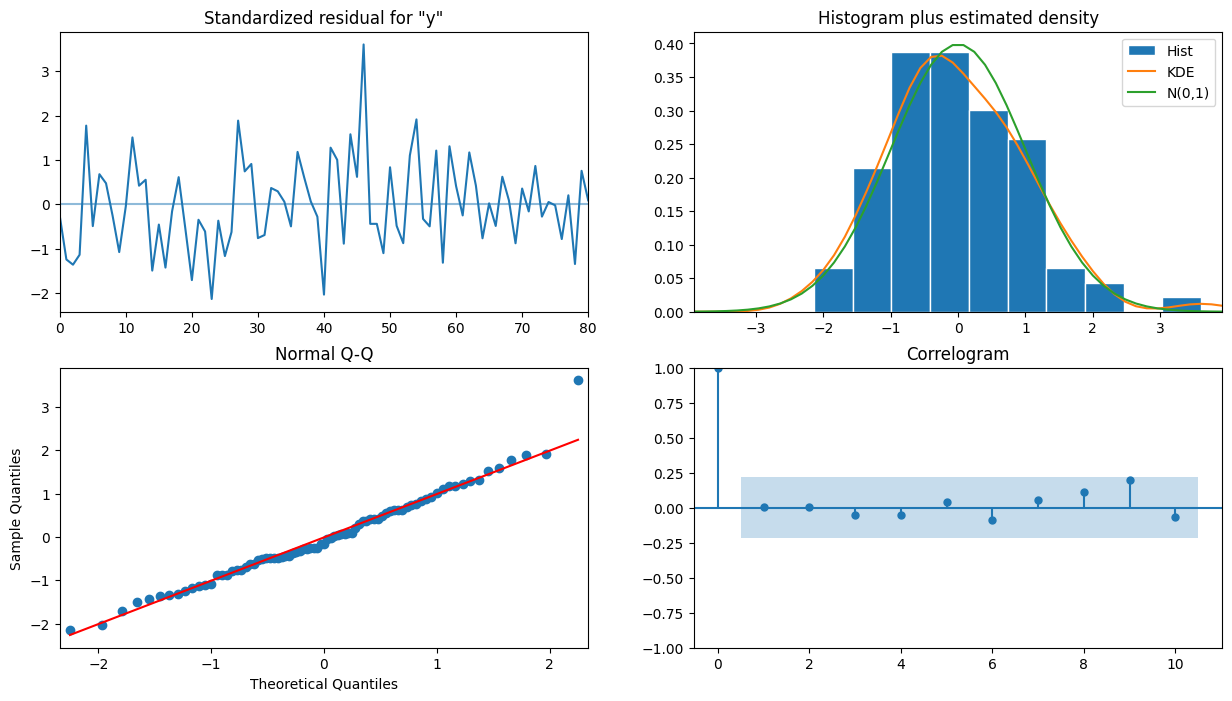

In [146]:
##
## disagnostics plot

plt.figure(figsize = (15, 8))
results_auto_sarima.plot_diagnostics(figsize = (15, 8))
plt.show()

In [147]:
##
##

predicted_auto_sarima = results_auto_sarima.get_forecast(steps = len(rose1_test['Rose']))


In [148]:
##
##

predicted_auto_sarima.summary_frame(alpha = 0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.251714  14.499363      16.833485      73.669944
1  58.173982  14.527652      29.700307      86.647656
2  69.115613  14.532691      40.632061      97.599164
3  64.476692  14.533079      35.992381      92.961003
4  68.636277  14.533108      40.151910      97.120645

In [149]:
##
##

rmse = mean_squared_error(rose1_test['Rose'], predicted_auto_sarima.predicted_mean, squared = False)
print(rmse)


16.521003800220186


In [150]:
##
## Now lets add the values to the results dataframe that we have setup

sarima_temp = pd.DataFrame({'Root Mean Square Error': [rmse],
                           'Model': 'SARIMA_with_p_1_d_1_q_1_seasonality_(0, 1, 3, 12)'})

Results = pd.concat([Results, sarima_temp])


In [151]:
##
##

Results.head(30)


## there is a difference when we use SARIMA over ARIMA, but still exponential smoothing has taken the crowm this time.


Model  Root Mean Square Error
0                                  Linear Regression               15.306000
0                Moving_Average_Trailing_by_2_points               11.611000
1                Moving_Average_Trailing_by_4_points               14.536000
2                Moving_Average_Trailing_by_6_points               14.578000
3                Moving_Average_Trailing_by_9_points               14.830000
4               Moving_Average_Trailing_by_12_points               15.375000
5               Moving_Average_Trailing_by_15_points               15.287000
0            Simple_Exponentail_Smoothing_Alpha_0.12               37.159000
0             Simple_Exponentail_Smoothing_Alpha_0.3               47.060000
0  Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13               62.514000
0    Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3              264.975000
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...               18.661000
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....               10.565000
0                                        Naive_Model               79.264000
0                             ARIMA_with_p_2_d_1_q_3               36.385862
0  SARIMA_with_p_1_d_1_q_1_seasonality_(0, 1, 3, 12)               16.521004

In [152]:
##
##


print(Results.sort_values(by = 'Root Mean Square Error', ascending = True))


                                               Model  Root Mean Square Error
0  Triple_Exponential_Smoothing_Alpha_0.3_Beta_0....               10.565000
0                Moving_Average_Trailing_by_2_points               11.611000
1                Moving_Average_Trailing_by_4_points               14.536000
2                Moving_Average_Trailing_by_6_points               14.578000
3                Moving_Average_Trailing_by_9_points               14.830000
5               Moving_Average_Trailing_by_15_points               15.287000
0                                  Linear Regression               15.306000
4               Moving_Average_Trailing_by_12_points               15.375000
0  SARIMA_with_p_1_d_1_q_1_seasonality_(0, 1, 3, 12)               16.521004
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0...               18.661000
0                             ARIMA_with_p_2_d_1_q_3               36.385862
0            Simple_Exponentail_Smoothing_Alpha_0.12               37.159000

## 7) Model summary

In [153]:
##
##

## Set the display options to overcome cell truncation
pd.set_option('display.max_colwidth', 200)  # or you can use a large number instead of None
pd.set_option('display.max_columns', None)  # To show all columns if you have more


Results.sort_values(by = 'Root Mean Square Error', ascending = True)

Model  \
0       Triple_Exponential_Smoothing_Alpha_0.3_Beta_0.3_Gamma_0.4   
0                             Moving_Average_Trailing_by_2_points   
1                             Moving_Average_Trailing_by_4_points   
2                             Moving_Average_Trailing_by_6_points   
3                             Moving_Average_Trailing_by_9_points   
5                            Moving_Average_Trailing_by_15_points   
0                                               Linear Regression   
4                            Moving_Average_Trailing_by_12_points   
0               SARIMA_with_p_1_d_1_q_1_seasonality_(0, 1, 3, 12)   
0  Triple_Exponentail_Smoothing_Alpha_0.07_Beta_0.03_Gamma_0.0008   
0                                          ARIMA_with_p_2_d_1_q_3   
0                         Simple_Exponentail_Smoothing_Alpha_0.12   
0                          Simple_Exponentail_Smoothing_Alpha_0.3   
0               Double_Exponentail_Smoothing_Alpha_0.16_Beta_0.13   
0                                                     Naive_Model   
0                 Double_Exponential_Smoothing_Alpha_0.3_Beta_0.3   

   Root Mean Square Error  
0               10.565000  
0               11.611000  
1               14.536000  
2               14.578000  
3               14.830000  
5               15.287000  
0               15.306000  
4               15.375000  
0               16.521004  
0               18.661000  
0               36.385862  
0               37.159000  
0               47.060000  
0               62.514000  
0               79.264000  
0              264.975000

## 8) Forecating 17 months into the future on the highest rated model

In [154]:
##
## The best rated model for us was Triple exponential smoothing with alpha, beta as 0.3 and gamma all as 0.4

## Instantiate and Fit the model
model = ExponentialSmoothing(rose1['Rose'],
                                 trend = 'additive',
                                 seasonal = 'multiplicative',
                                 freq = 'MS',
                                 seasonal_periods = 12).fit(smoothing_level = 0.3,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.4)

## Forecast 17 months ahead
forecast = model.forecast(steps = 17)




In [155]:
##
##

forecast


1995-08-01    40.030694
1995-09-01    33.145124
1995-10-01    34.047982
1995-11-01    37.460661
1995-12-01    51.361596
1996-01-01    18.432425
1996-02-01    22.564832
1996-03-01    25.750819
1996-04-01    27.111555
1996-05-01    19.442455
1996-06-01    23.153951
1996-07-01    26.580424
1996-08-01    19.860978
1996-09-01    15.712797
1996-10-01    15.319990
1996-11-01    15.865680
1996-12-01    20.258985
Freq: MS, dtype: float64

In [156]:
##
## Calculate the standard deviation of the residuals

residuals_std = model.resid.std()
residuals_std

21.041066039964036

In [157]:
##
## Define the confidence level

from scipy.stats import norm


confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)

print(z_score)

1.959963984540054


In [158]:
##
## Calculate the confidence intervals


interval_size = z_score * residuals_std
lower_bounds = forecast - interval_size
upper_bounds = forecast + interval_size



In [159]:
##
##

interval_size

41.23973163465833

In [160]:
##
##

lower_bounds

1995-08-01    -1.209038
1995-09-01    -8.094607
1995-10-01    -7.191750
1995-11-01    -3.779071
1995-12-01    10.121865
1996-01-01   -22.807307
1996-02-01   -18.674900
1996-03-01   -15.488912
1996-04-01   -14.128177
1996-05-01   -21.797277
1996-06-01   -18.085781
1996-07-01   -14.659308
1996-08-01   -21.378754
1996-09-01   -25.526935
1996-10-01   -25.919742
1996-11-01   -25.374052
1996-12-01   -20.980746
Freq: MS, dtype: float64

In [161]:
##
##

upper_bounds

1995-08-01    81.270426
1995-09-01    74.384856
1995-10-01    75.287713
1995-11-01    78.700392
1995-12-01    92.601328
1996-01-01    59.672157
1996-02-01    63.804563
1996-03-01    66.990551
1996-04-01    68.351286
1996-05-01    60.682187
1996-06-01    64.393683
1996-07-01    67.820155
1996-08-01    61.100709
1996-09-01    56.952528
1996-10-01    56.559721
1996-11-01    57.105412
1996-12-01    61.498717
Freq: MS, dtype: float64

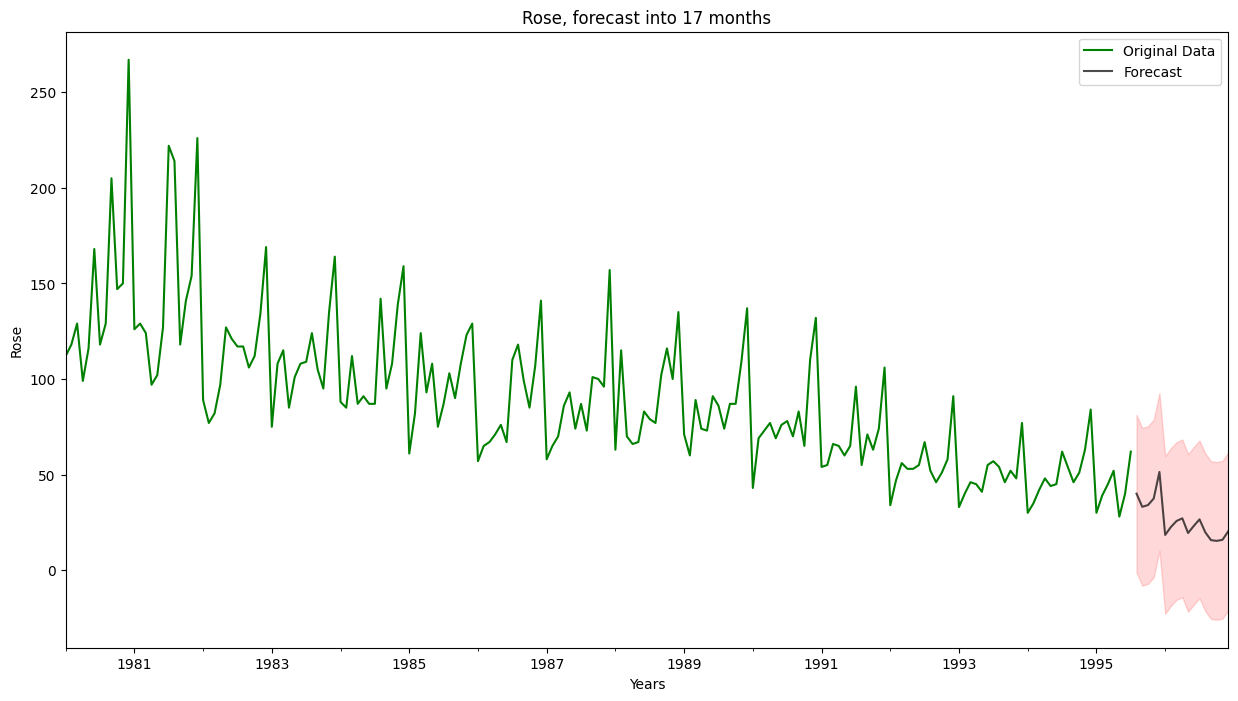

In [162]:
##
## plot the forecast along with the confidence band

plt.figure(figsize = (15, 8))
ax = rose1['Rose'].plot(label = 'Original Data', color = 'green', title = 'Rose, forecast into 17 months')
forecast.plot(ax = ax, label = 'Forecast', alpha = 0.7, color = 'black')
ax.fill_between(forecast.index,
                  lower_bounds,
                  upper_bounds,
                  color = 'red',
                  alpha = 0.15)


ax.set_xlabel('Years')
ax.set_ylabel('Rose')
plt.legend(loc = 'best')
plt.show()